# init

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True' # for XGBoost
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt 

from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from lightgbm                import LGBMClassifier
from catboost                import CatBoostClassifier
from sklearn.linear_model    import LogisticRegression

from sklearn                 import datasets
from sklearn.model_selection import train_test_split
from copy                    import copy
from umap                    import UMAP


In [3]:
# import domestic lib
import ppap.tabular_utility        as ppap_tab_utl
import ppap.tabular_classification as ppap_tab_cls

import importlib
importlib.reload(ppap_tab_utl)
importlib.reload(ppap_tab_cls)


<module 'ppap.tabular_classification' from '/Users/mucunwuxian/MICIN/20190709_houken_x_PPAP/PPAP/ppap/tabular_classification.py'>

# Pre-Process

In [4]:
# load sample data from sklearn
breast_cancer_data = datasets.load_breast_cancer()
column_name        = breast_cancer_data.feature_names

# prepare X and y
X = breast_cancer_data.data
y = breast_cancer_data.target

# print size of X and y
print('np.shape(X) = (%d, %d)' % np.shape(X))
print('np.shape(y) = (%d)'     % np.shape(y))


np.shape(X) = (569, 30)
np.shape(y) = (569)


In [5]:
# [STEP 1]
# check nan ratio (vertical)
print('check for X')
ppap_tab_utl.check_nan_ratio_vert(X           = X, 
                                  column_name = column_name)
print('')

print('check for y')
ppap_tab_utl.check_nan_ratio_vert(X           = y, 
                                  column_name = 'target')


check for X

include nan column is ...

------------------------------------------------------------
nan is not exist. check OK!

check for y

include nan column is ...

------------------------------------------------------------
nan is not exist. check OK!


array([0.])

In [6]:
# [STEP 2]
# check nan ratio (horizontal)
print('check for X')
ppap_tab_utl.check_nan_ratio_horz(X = X)
print('')


check for X
nan is not exist. check OK!



In [7]:
# [STEP 3-1]
# value state check (of X)
ppap_tab_utl.check_value_count(X           = X, 
                               column_name = column_name)



numeric ratio is ...

------------------------------------------------------------
  - mean radius -> 1.00000
  - mean texture -> 1.00000
  - mean perimeter -> 1.00000
  - mean area -> 1.00000
  - mean smoothness -> 1.00000
  - mean compactness -> 1.00000
  - mean concavity -> 1.00000
  - mean concave points -> 1.00000
  - mean symmetry -> 1.00000
  - mean fractal dimension -> 1.00000
  - radius error -> 1.00000
  - texture error -> 1.00000
  - perimeter error -> 1.00000
  - area error -> 1.00000
  - smoothness error -> 1.00000
  - compactness error -> 1.00000
  - concavity error -> 1.00000
  - concave points error -> 1.00000
  - symmetry error -> 1.00000
  - fractal dimension error -> 1.00000
  - worst radius -> 1.00000
  - worst texture -> 1.00000
  - worst perimeter -> 1.00000
  - worst area -> 1.00000
  - worst smoothness -> 1.00000
  - worst compactness -> 1.00000
  - worst concavity -> 1.00000
  - worst concave points -> 1.00000
  - worst symmetry -> 1.00000
  - worst fractal di

16.640     3
17.670     3
18.540     3
16.970     3
18.150     2
14.910     2
20.200     2
23.920     2
14.340     2
20.950     2
19.870     2
20.740     2
34.370     2
11.280     2
17.740     2
22.220     2
11.360     2
20.560     2
20.670     2
33.010     2
12.670     2
23.120     2
23.130     2
19.530     2
22.790     2
16.390     2
44.410     2
17.850     2
18.240     2
27.190     2
          ..
224.100    1
59.460     1
21.790     1
68.170     1
30.570     1
9.549      1
47.140     1
25.060     1
542.200    1
45.190     1
19.080     1
35.240     1
89.740     1
16.350     1
29.340     1
20.530     1
45.810     1
21.030     1
24.530     1
25.780     1
18.190     1
45.400     1
153.400    1
15.090     1
96.050     1
25.130     1
18.490     1
164.100    1
103.900    1
43.500     1
Length: 528, dtype: int64

------------------------------------------------------------
[smoothness error]
0.010000    2
0.010380    2
0.005251    2
0.005080    2
0.007514    2
0.005884    2
0.006494    2
0.

In [8]:
# [STEP 3-2]
# value state check (of y)
ppap_tab_utl.check_value_count(X           = y, 
                               column_name = 'target_name')



numeric ratio is ...

------------------------------------------------------------
  - target_name -> 1.00000



value pattern is ...

------------------------------------------------------------
[target_name]
1    357
0    212
dtype: int64


In [9]:
# [STEP 4]
# organize data

# before
print('\nbefore organize shape is (%d, %d)' % np.shape(X))

# exec
X = ppap_tab_utl.organize_data(X           = X, 
                               column_name = column_name)

# after
print('\nafter organize shape is (%d, %d)' % np.shape(X))

# for visualize
df_X_tmp = pd.DataFrame(X, columns=column_name)
df_X_tmp.head(10)



before organize shape is (569, 30)

delete one-pattern column...
  - none ...

delete overlap column...
  - none ...

after organize shape is (569, 30)


mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710         0.2419   
1           0.07864         0.08690              0.07017         0.1812   
2           0.15990         0.19740              0.12790         0.2069   
3           0.28390         0.24140              0.10520         0.2597   
4           0.13280         0.19800              0.10430         0.1809   
5           0.17000         0.15780              0.08089         0.2087   
6           0.10900         0.11270              0.07400         0.1794   
7           0.16450         0.09366              0.05985         0.2196   
8           0.19320         0.18590              0.09353         0.2350   
9           0.23960         0.22730              0.08543         0.2030   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   
5                 0.07613  ...         15.47          23.75           103.40   
6                 0.05742  ...         22.88          27.66           153.20   
7                 0.07451  ...         17.06          28.14           110.60   
8                 0.07389  ...         15.49          30.73           106.20   
9                 0.08243  ...         15.09          40.68            97.65   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   
5       741.6            0.1791             0.5249           0.5355   
6      1606.0            0.1442             0.2576           0.3784   
7       897.0            0.1654             0.3682           0.2678   
8       739.3            0.1703             0.5401           0.5390   
9       711.4            0.1853             1.0580           1.1050   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  
5                0.1741          0.3985                  0.12440  
6                0.1932          0.3063                  0.08368  
7                0.1556          0.3196                  0.11510  
8                0.2060          0.4378                  0.10720  
9      

Total data num    :    569件
Positive data num :    357件 (62.74%)
Negative data num :    212件 (37.26%)


leakage check


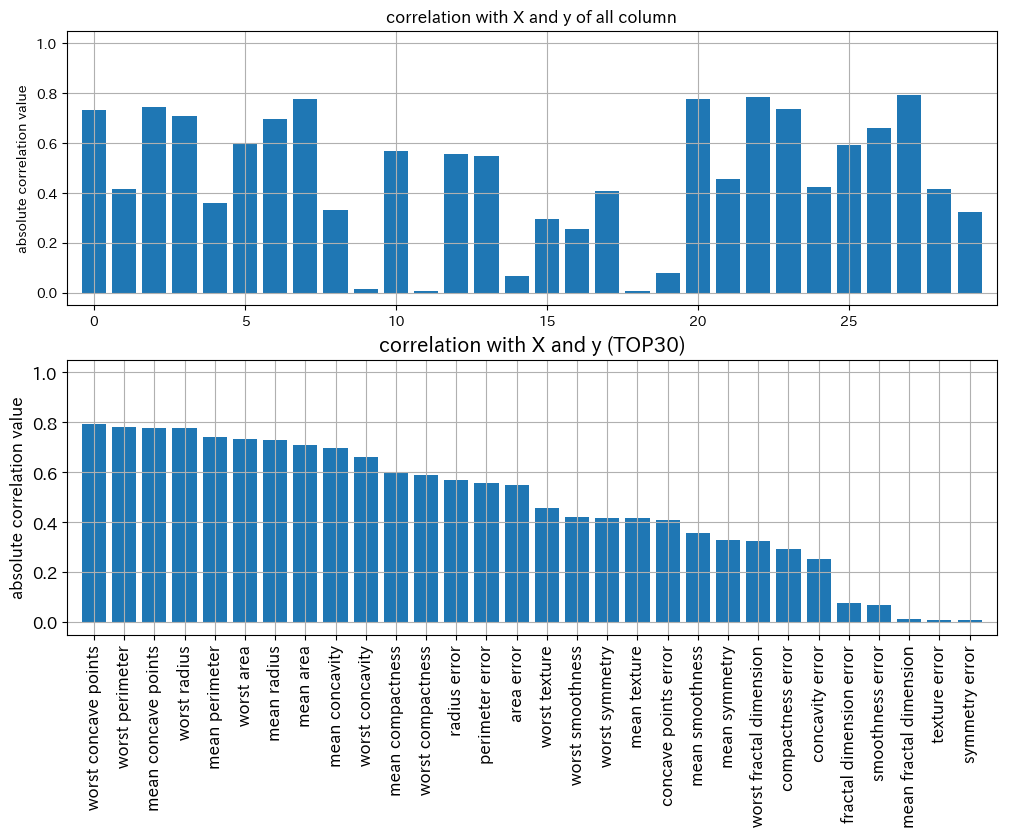



cross plot
(high corr TOP10)
---------------------------------------------
[27]


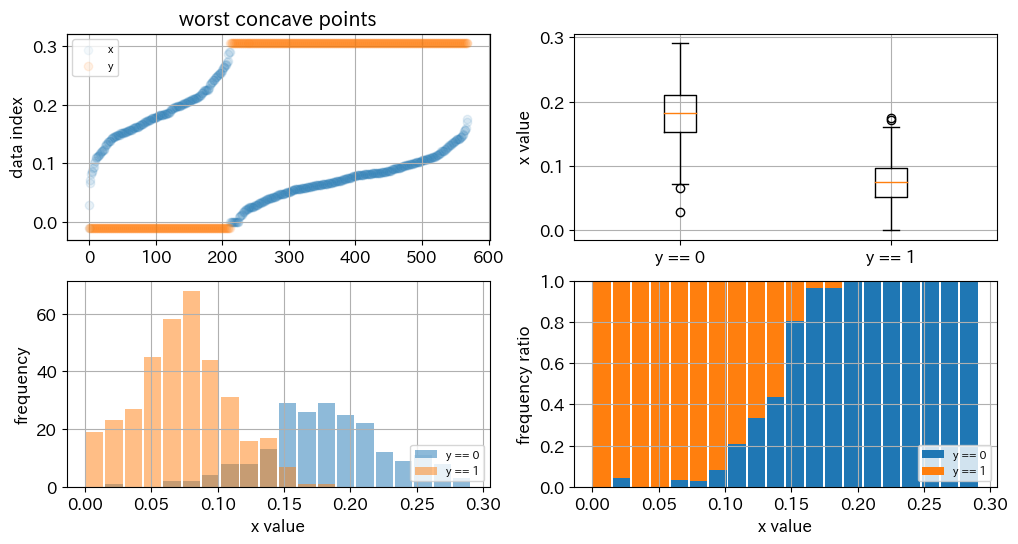



---------------------------------------------
[22]


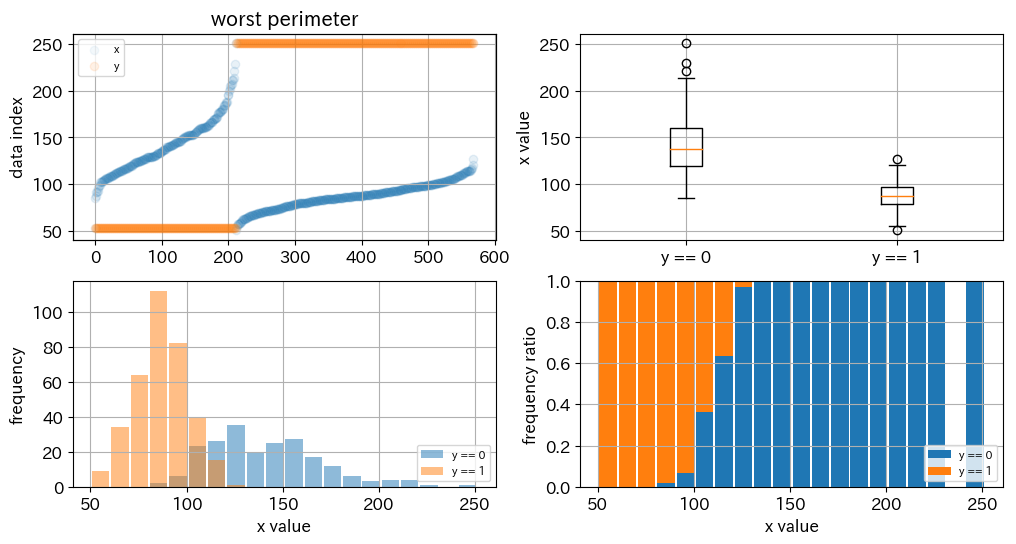



---------------------------------------------
[7]


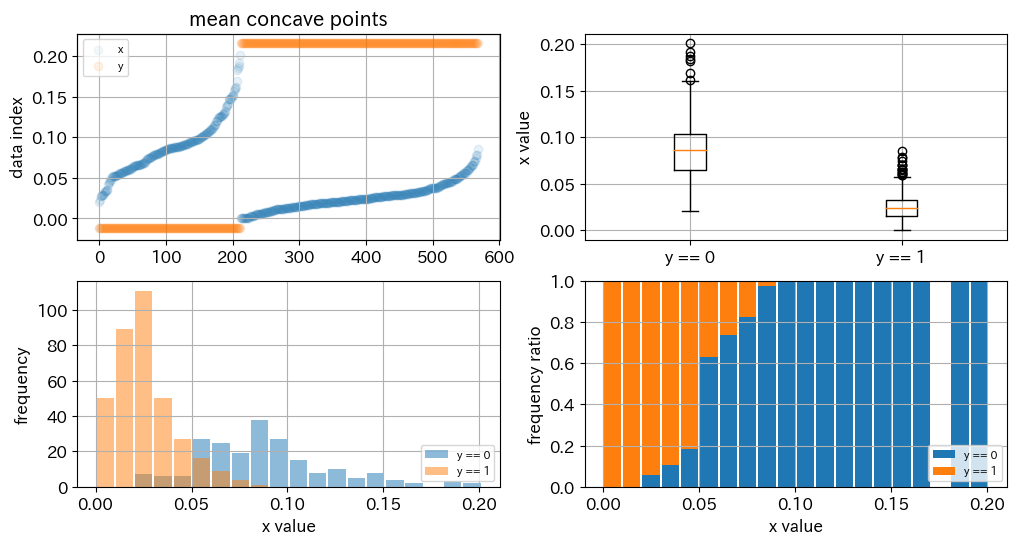



---------------------------------------------
[20]


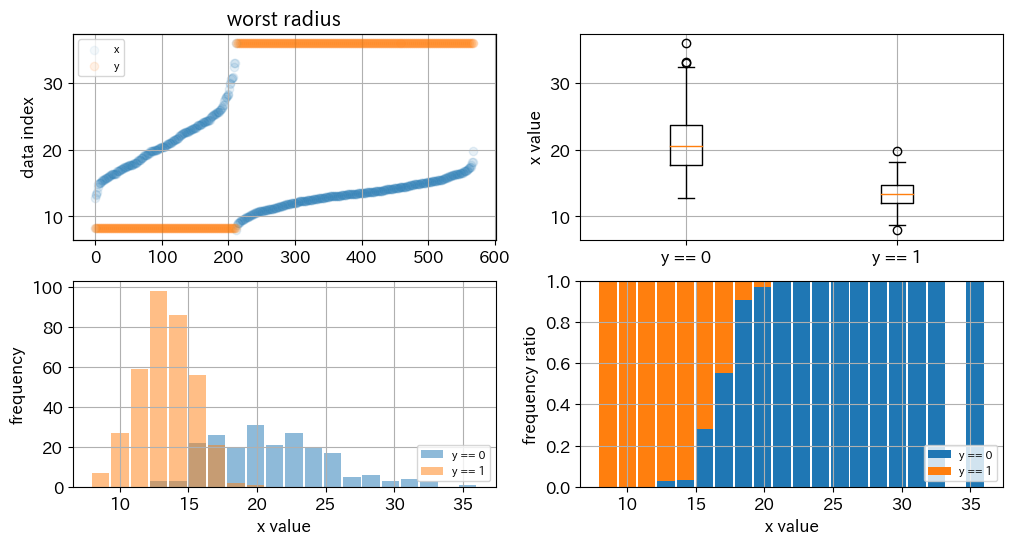



---------------------------------------------
[2]


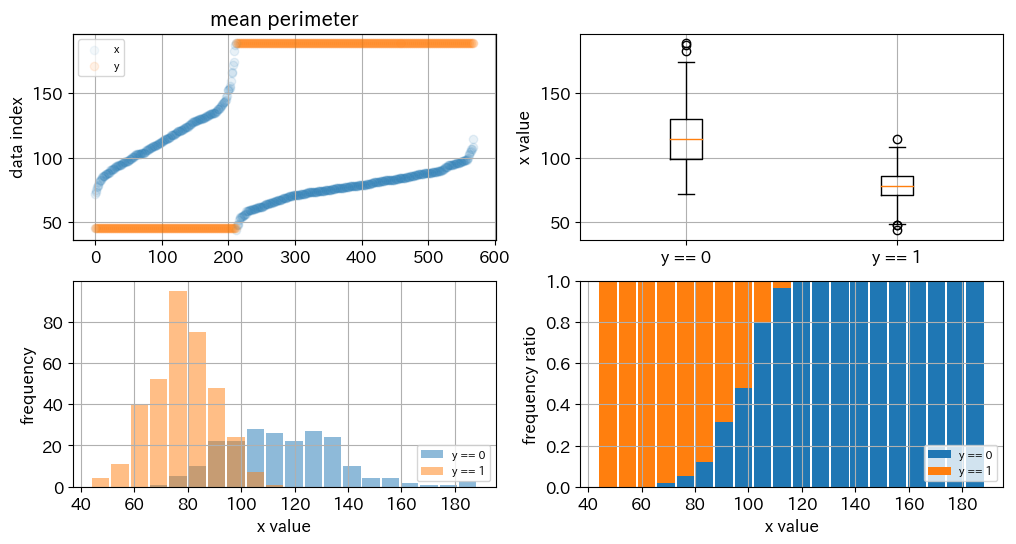



---------------------------------------------
[23]


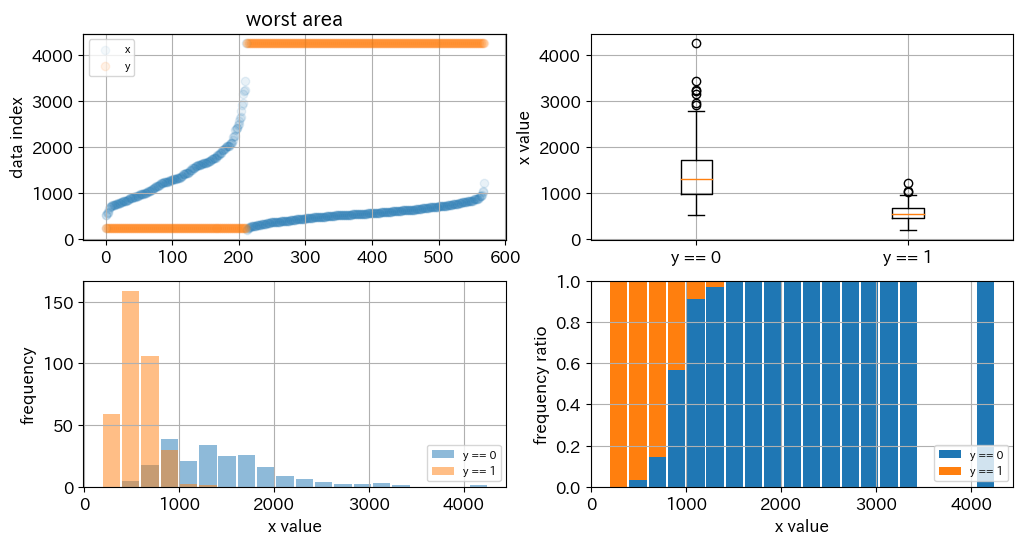



---------------------------------------------
[0]


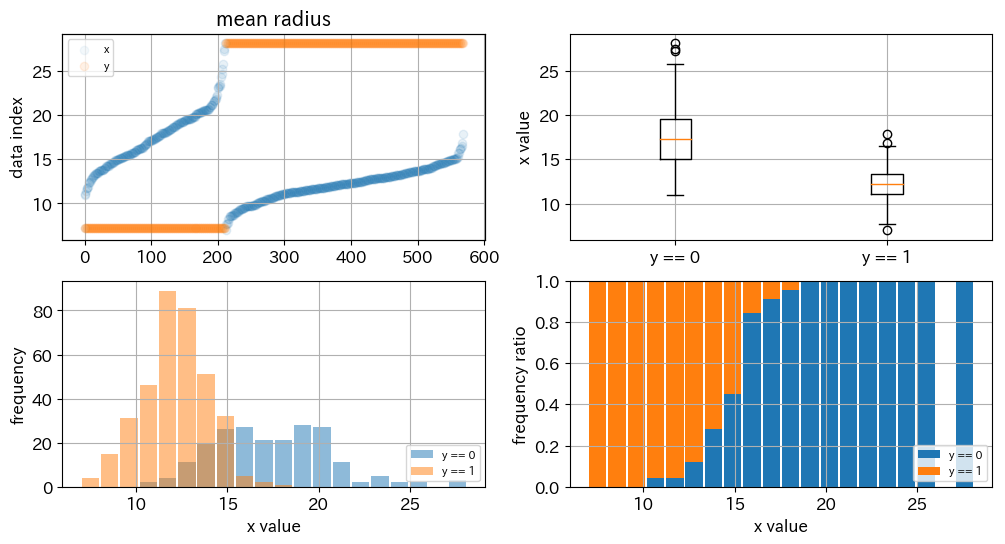



---------------------------------------------
[3]


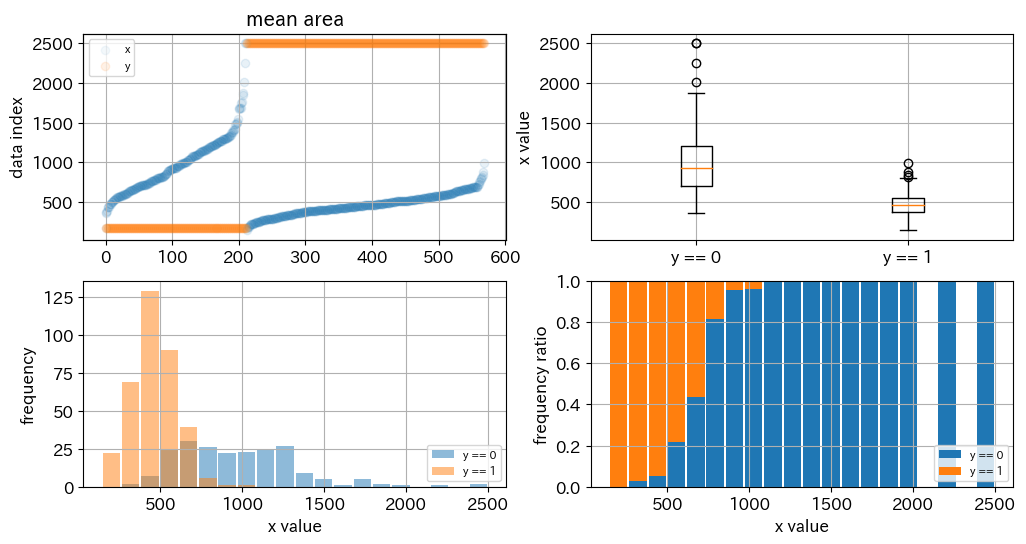



---------------------------------------------
[6]


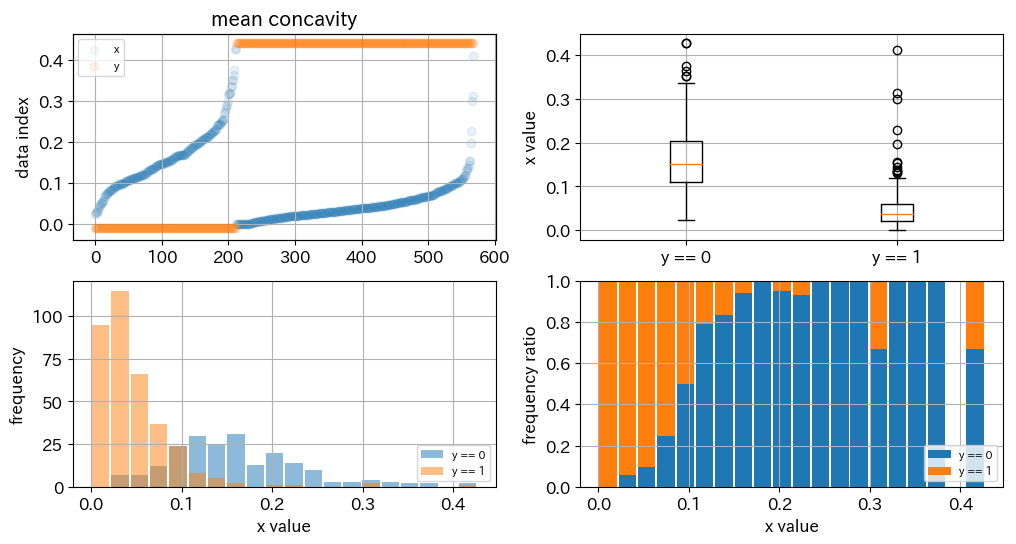



---------------------------------------------
[26]


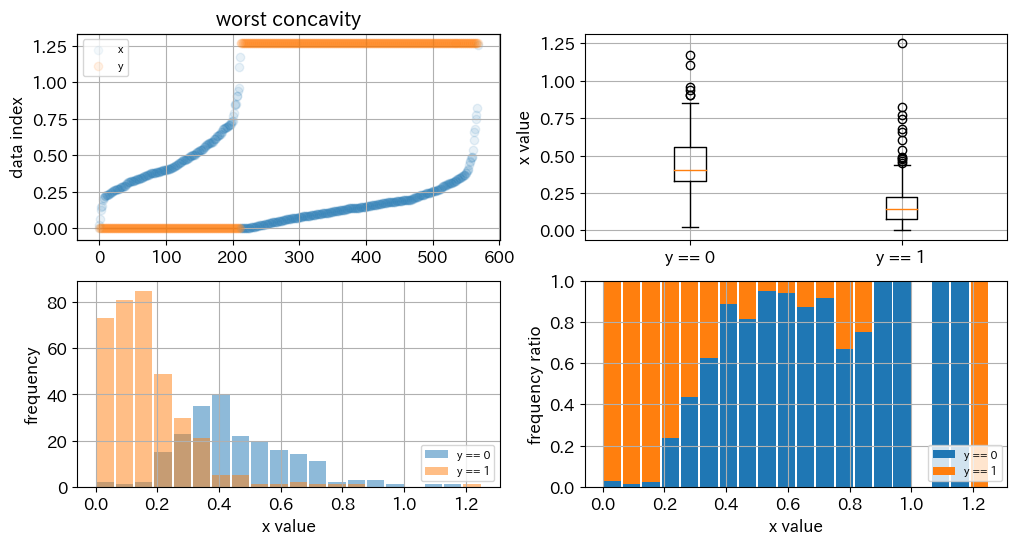

array([0.73002851, 0.4151853 , 0.74263553, 0.70898384, 0.35855997,
       0.59653368, 0.69635971, 0.77661384, 0.33049855, 0.0128376 ,
       0.56713382, 0.00830333, 0.5561407 , 0.54823594, 0.06701601,
       0.29299924, 0.25372977, 0.40804233, 0.00652176, 0.07797242,
       0.77645378, 0.45690282, 0.78291414, 0.73382503, 0.42146486,
       0.59099824, 0.65961021, 0.79356602, 0.41629431, 0.32387219])

In [10]:
# [STEP 5]
# check leakage and predictability
ppap_tab_utl.check_X_and_y_status(X           = X, 
                                  y           = y, 
                                  column_name = column_name)


2dim visualization


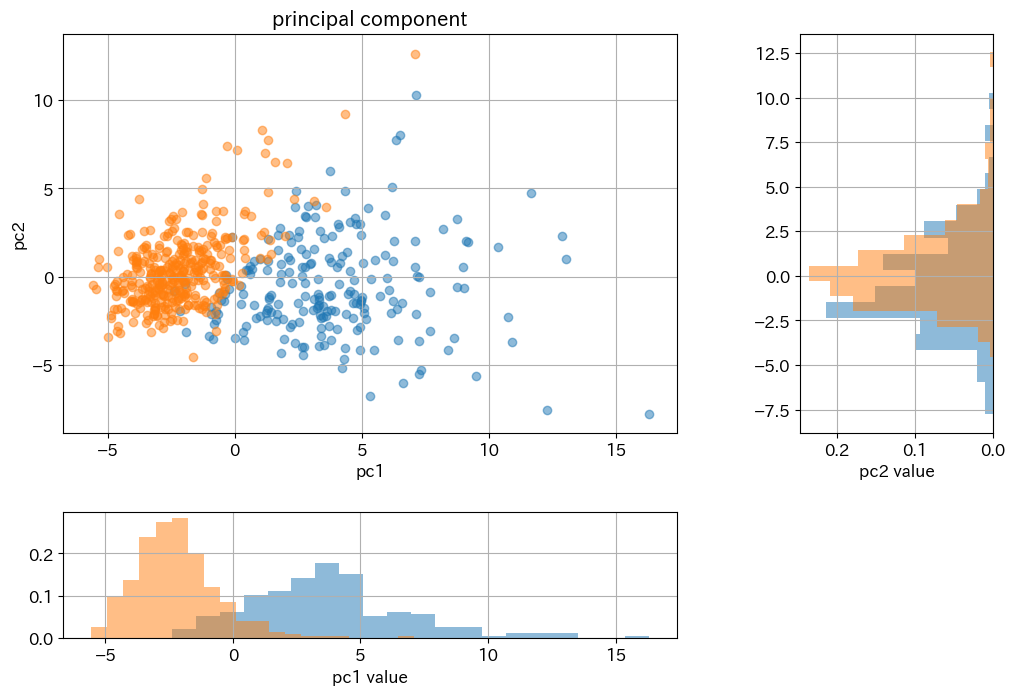

2dim visualization


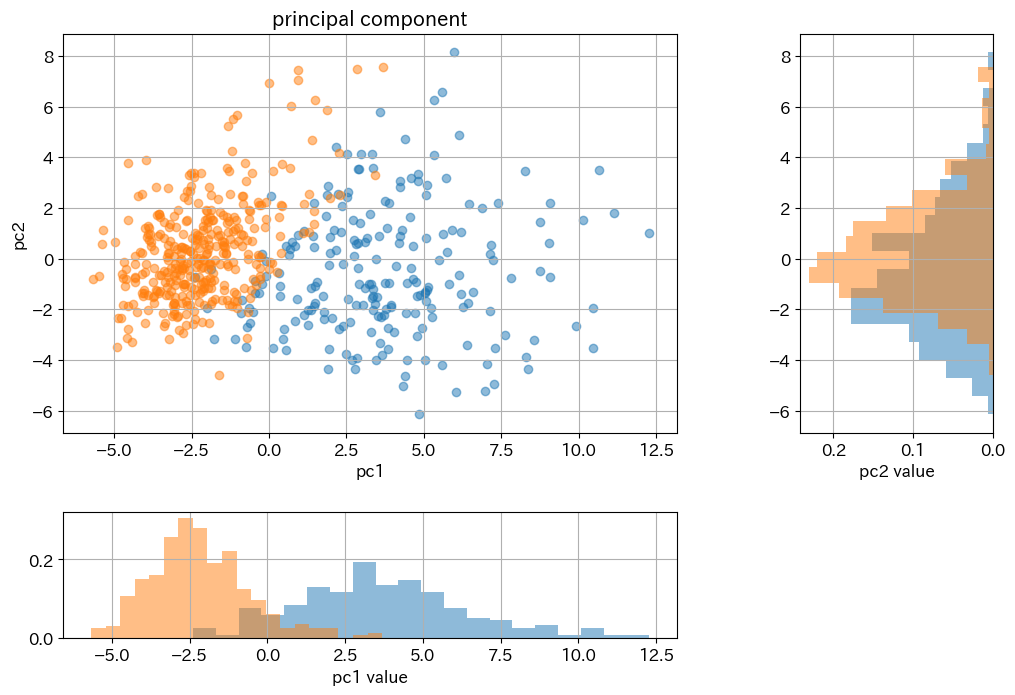

In [11]:
# [STEP 6-1]
# visualize on PCA
_, _, _ = ppap_tab_utl.understandable_visualize(X = X, 
                                                y = y)

# visualize on PCA (suppress outlier)
_, _, _ = ppap_tab_utl.understandable_visualize(X              = X, 
                                                y              = y, 
                                                X_outlier_care = True)


2dim visualization


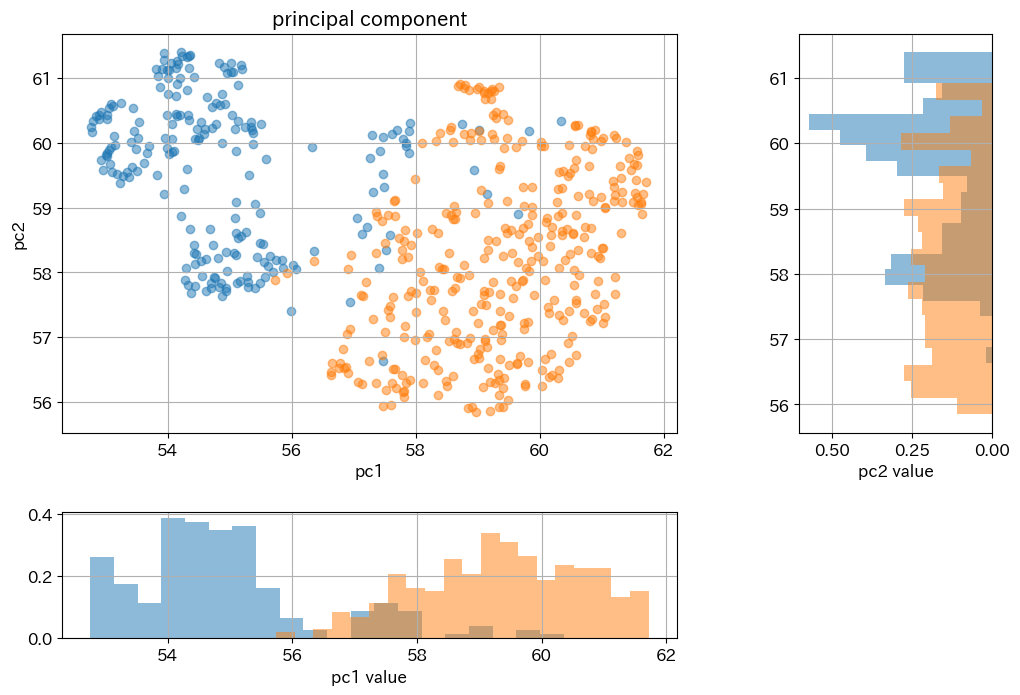

2dim visualization


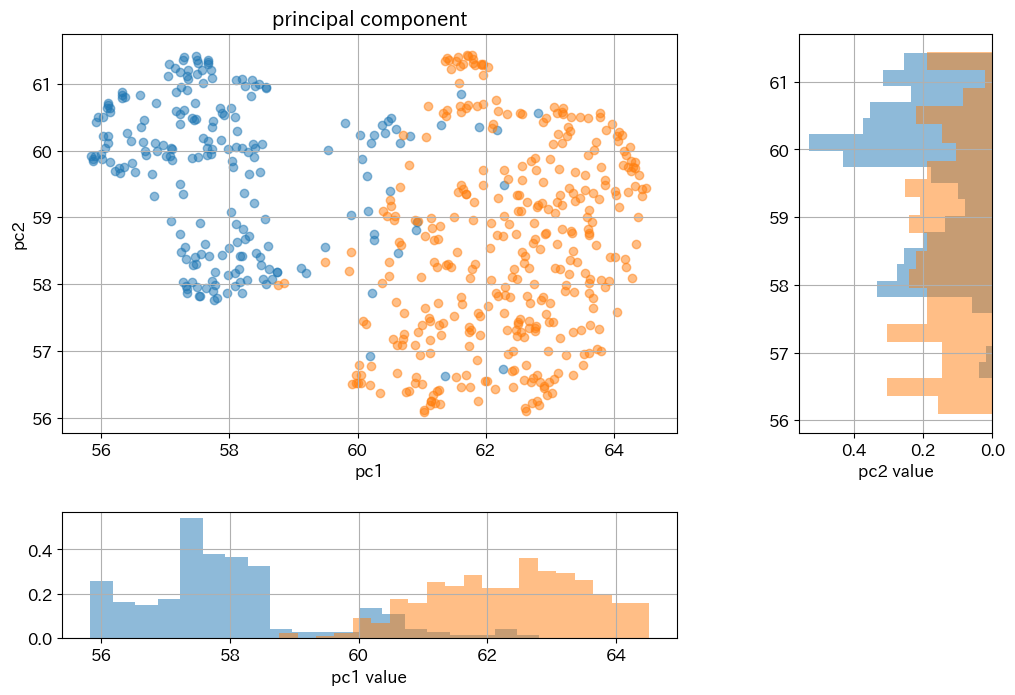

In [12]:
# [STEP 6-2]
# visualize on UMAP
_, _, _ = ppap_tab_utl.understandable_visualize(X     = X, 
                                                y     = y, 
                                                model = UMAP(random_state=0))

# visualize on UMAP (suppress outlier)
_, _, _ = ppap_tab_utl.understandable_visualize(X              = X, 
                                                y              = y,
                                                model          = UMAP(random_state=0),
                                                X_outlier_care = True)


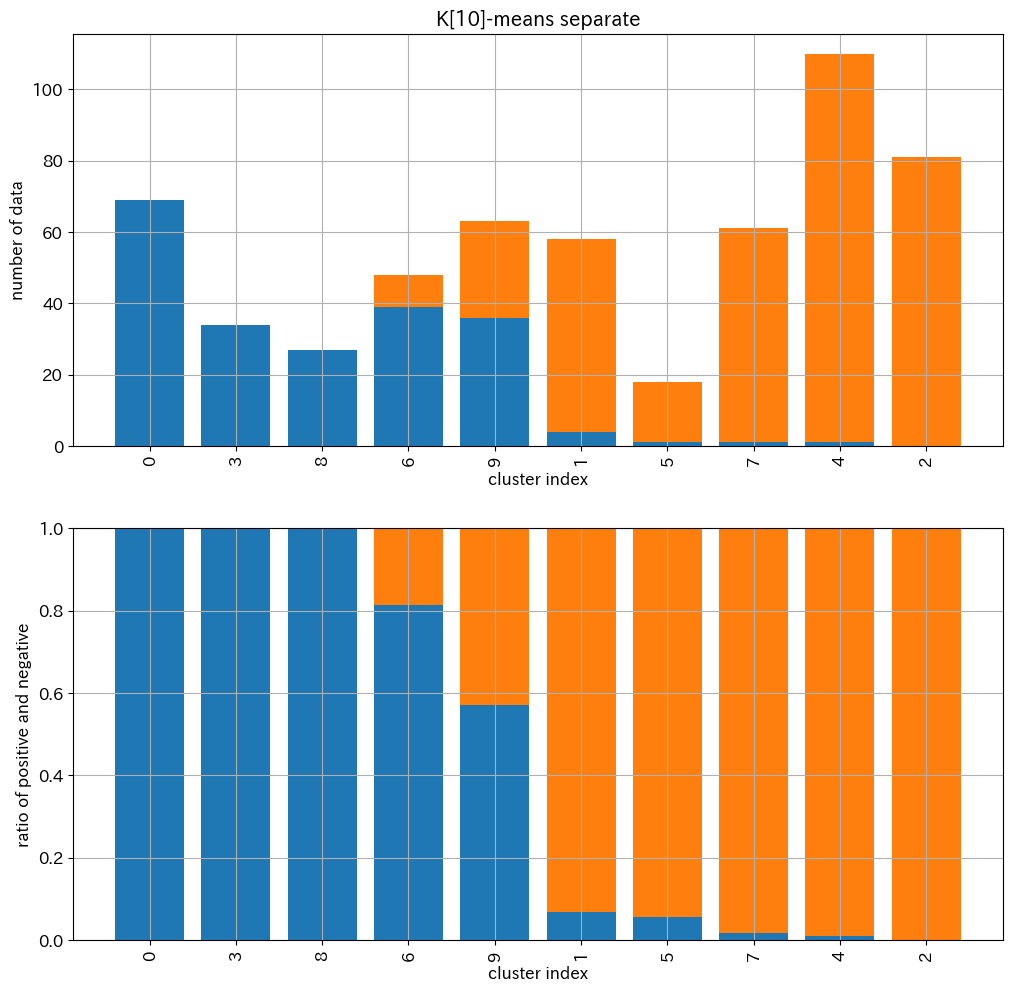

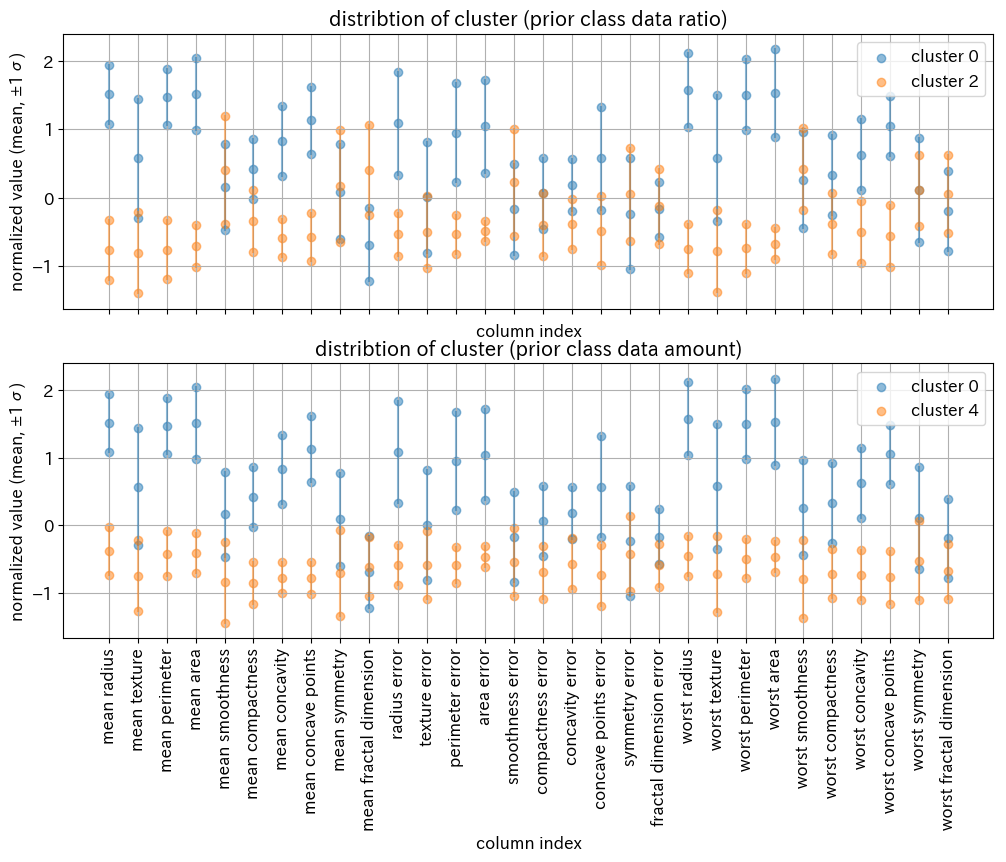

In [13]:
# [STEP 7] 
# judge predictable or not by kmeans
(kmeans_result, 
 _, 
 idx_sort_k) = ppap_tab_utl.kmeans_classification(X              = X, 
                                                  y              = y, 
                                                  column_name    = column_name, 
                                                  X_outlier_care = True)


k-nn searching on positive data [start time is 2019-07-10 13:33:11.808253]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                                [end time is 2019-07-10 13:33:12.995437]



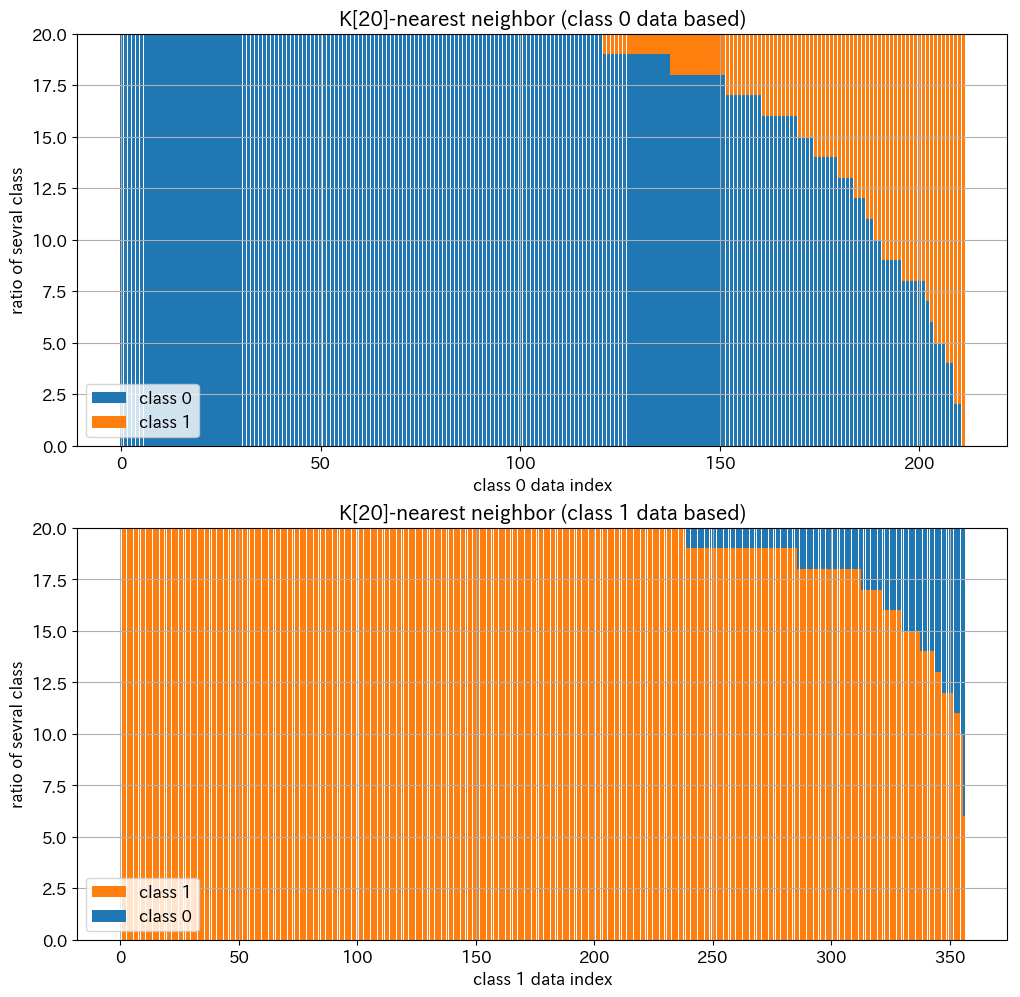

In [14]:
# [STEP 8] 
# judge predictable or not by kmeans
_ = ppap_tab_utl.knn_classification(X              = X, 
                                    y              = y, 
                                    X_outlier_care = False)


k-nn searching on positive data [start time is 2019-07-10 13:33:14.903216]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                                [end time is 2019-07-10 13:33:15.172637]



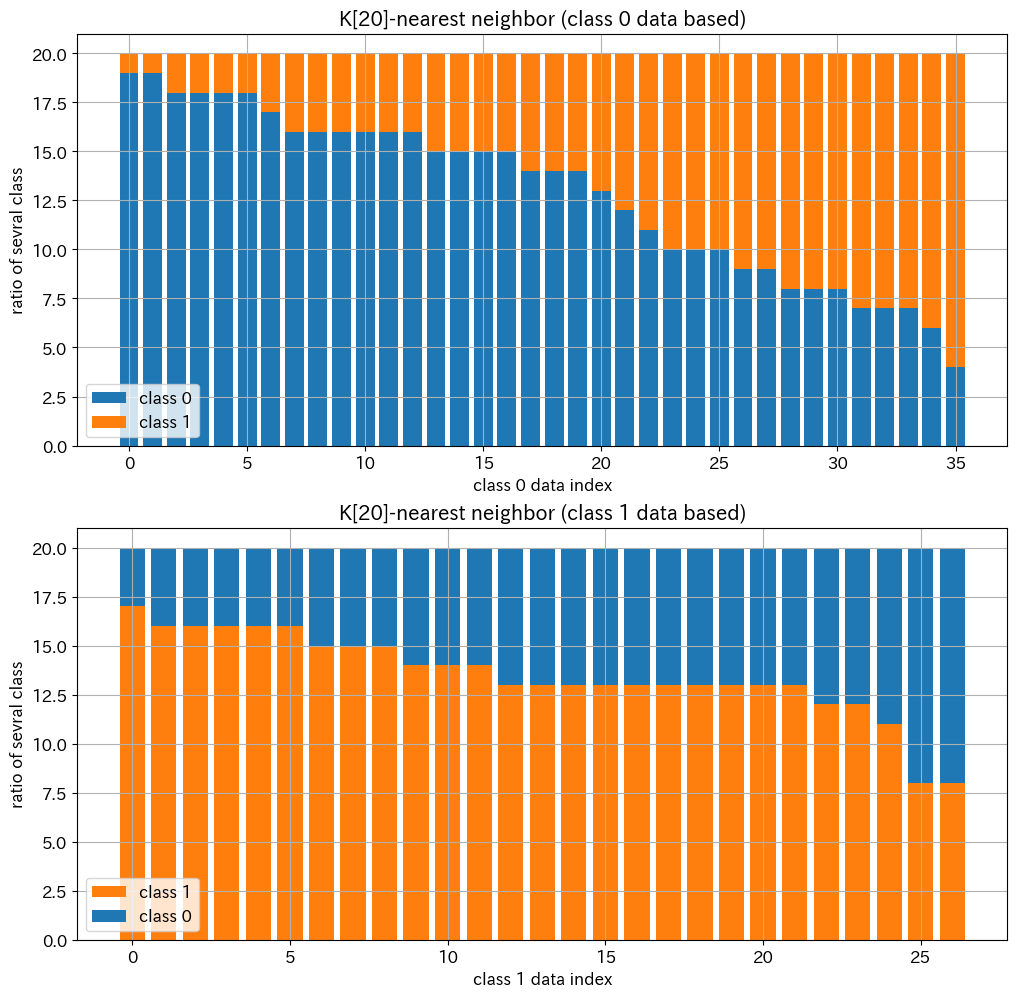

In [15]:
# [STEP 12-2] 
# judge predictable or not by knn
_ = ppap_tab_utl.knn_classification(X              = X[kmeans_result.labels_ == idx_sort_k[4], :], 
                                    y              = y[kmeans_result.labels_ == idx_sort_k[4]], 
                                    X_outlier_care = True)


# Prediction

In [16]:
# separate train data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

print('np.shape(X_train) = (%d, %d)' % np.shape(X_train))
print('np.shape(y_train) = (%d)'     % np.shape(y_train))
print('np.shape(X_test)  = (%d, %d)' % np.shape(X_test))
print('np.shape(y_test)  = (%d)'     % np.shape(y_test))


np.shape(X_train) = (284, 30)
np.shape(y_train) = (284)
np.shape(X_test)  = (285, 30)
np.shape(y_test)  = (285)


In [17]:
# [STEP 1-1]
# train and predict by one model 
model = LGBMClassifier(objective     = 'binary',  
                       learning_rate = 0.1, 
                       n_estimators  = 100, 
                       random_state  = 0, 
                       n_jobs        = 4) 
# exec
(model, 
 y_train_hat, 
 y_test_hat, 
 _, 
 _) = ppap_tab_cls.train_and_predict(X_train        = X_train,
                                     y_train        = y_train,
                                     X_test         = X_test,
                                     y_test         = y_test, 
                                     model          = model)
#
print(np.shape(y_train_hat))
print(np.shape(y_test_hat))


(284, 2)
(285, 2)


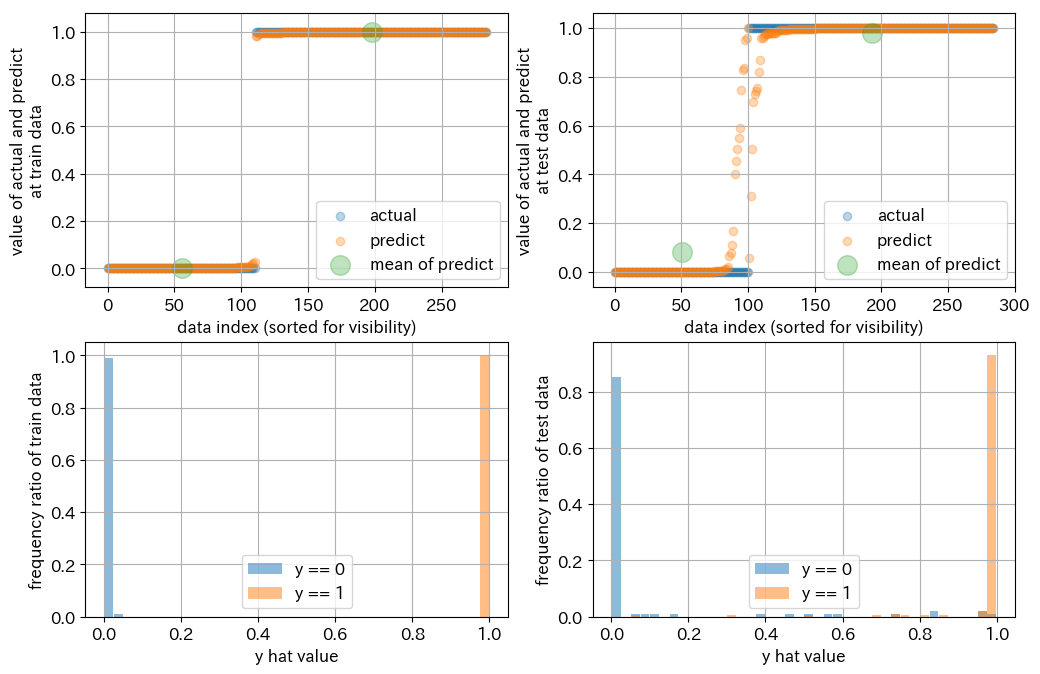

In [18]:
# [STEP 1-2]
# plot
fig = plt.figure(figsize=(12,8),dpi=100)

ax = plt.subplot(2, 2, 1)
ppap_tab_cls.draw_prediction_scat(y_hat     = y_train_hat, 
                                  y         = y_train, 
                                  data_type = 'train', 
                                  alpha     = 0.3)
ax = plt.subplot(2, 2, 2)
ppap_tab_cls.draw_prediction_scat(y_hat     = y_test_hat, 
                                  y         = y_test, 
                                  data_type = 'test', 
                                  alpha     = 0.3)
ax = plt.subplot(2, 2, 3)
ppap_tab_cls.draw_prediction_dist(y_hat     = y_train_hat, 
                                  y         = y_train, 
                                  data_type = 'train')
ax = plt.subplot(2, 2, 4)
ppap_tab_cls.draw_prediction_dist(y_hat     = y_test_hat, 
                                  y         = y_test, 
                                  data_type = 'test')


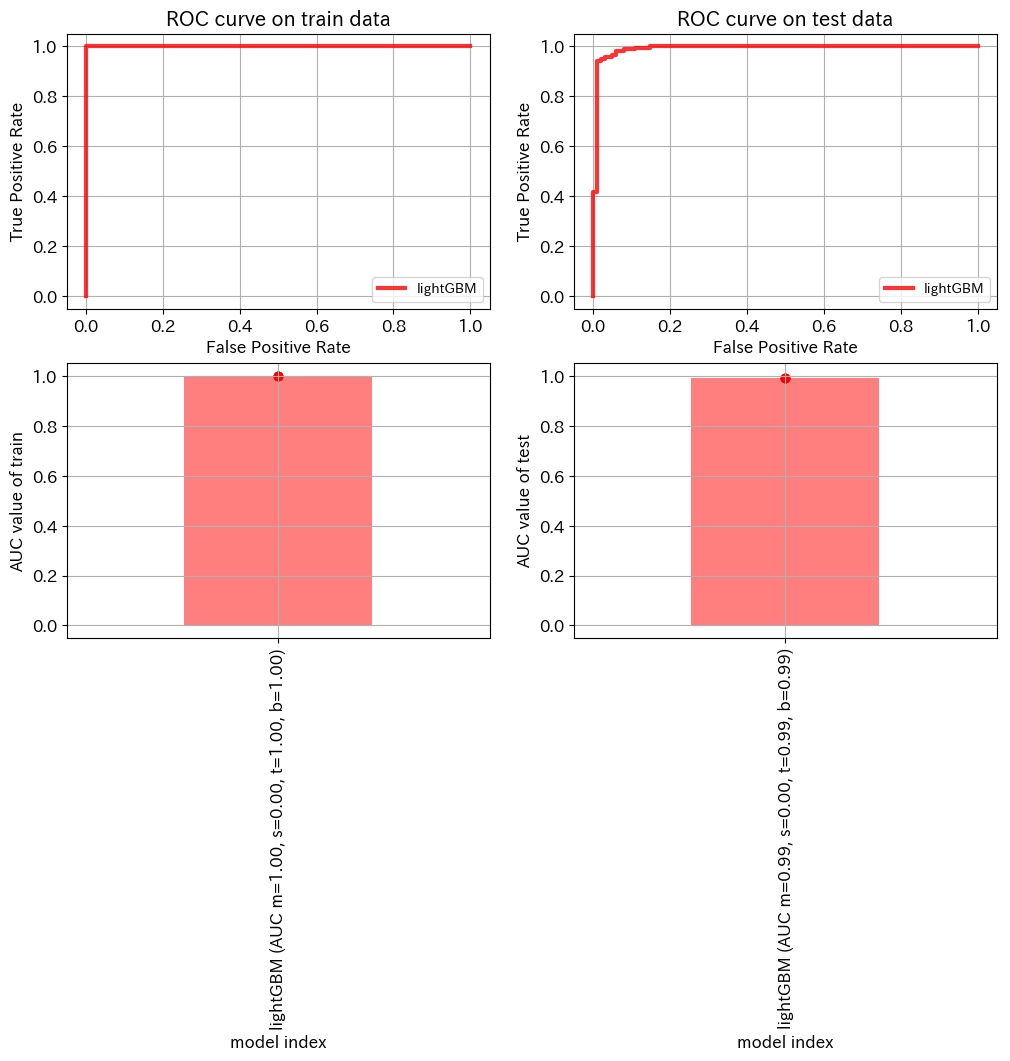

In [19]:
# [STEP 1-3]
# plot
fig = plt.figure(figsize=(12,8),dpi=100)

ax = plt.subplot(2, 2, 1)
auc_train = ppap_tab_cls.draw_roc(y_hat      = y_train_hat, 
                                  y          = y_train, 
                                  model_name = 'lightGBM', 
                                  data_type  = 'train')
ax = plt.subplot(2, 2, 2)
auc_test = ppap_tab_cls.draw_roc(y_hat      = y_test_hat, 
                                 y          = y_test, 
                                 model_name = 'lightGBM', 
                                 data_type  = 'test')
ax = plt.subplot(2, 2, 3)
ppap_tab_cls.draw_auc(auc        = auc_train, 
                      model_name = 'lightGBM', 
                      data_type  = 'train')
ax = plt.subplot(2, 2, 4)
ppap_tab_cls.draw_auc(auc        = auc_test, 
                      model_name = 'lightGBM', 
                      data_type  = 'test')
# 
plt.show()


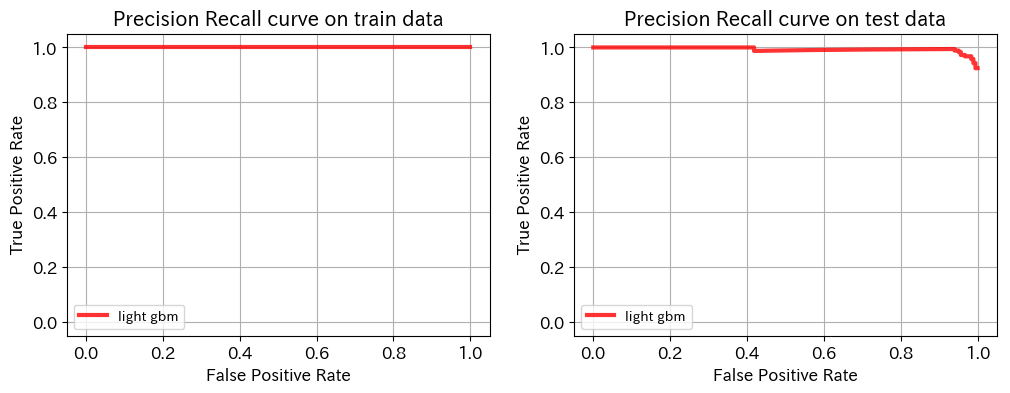

In [20]:
# [STEP 1-4]
# plot
fig = plt.figure(figsize=(12,4),dpi=100)

ax = plt.subplot(1, 2, 1)
auc_train = ppap_tab_cls.draw_pr(y_hat      = y_train_hat, 
                                 y          = y_train, 
                                 model_name = 'light gbm', 
                                 data_type  = 'train')
ax = plt.subplot(1, 2, 2)
auc_test = ppap_tab_cls.draw_pr(y_hat      = y_test_hat, 
                                y          = y_test, 
                                model_name = 'light gbm', 
                                data_type  = 'test')
# 
plt.show()


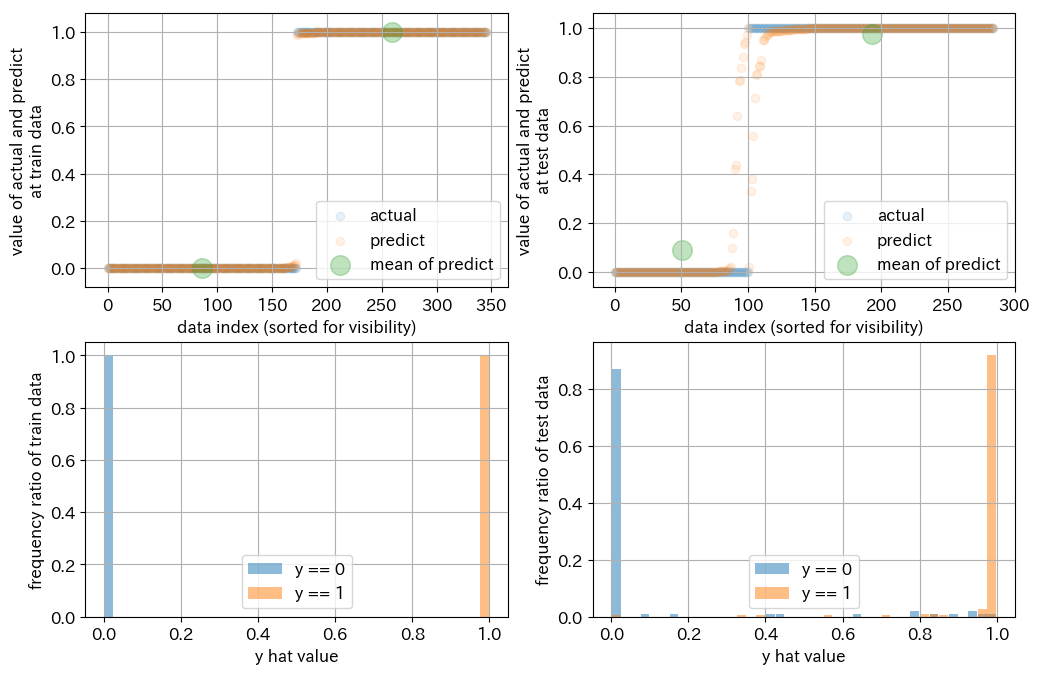

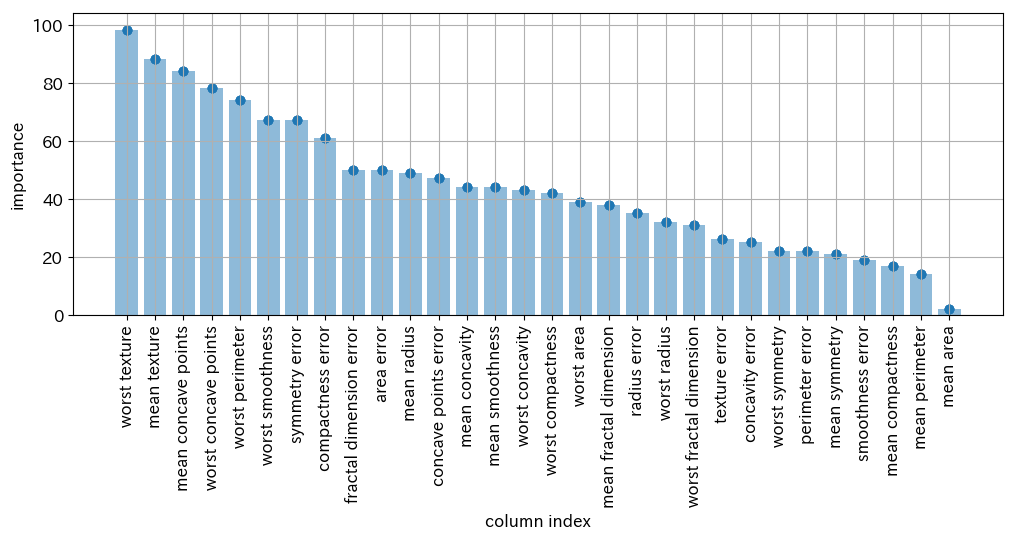

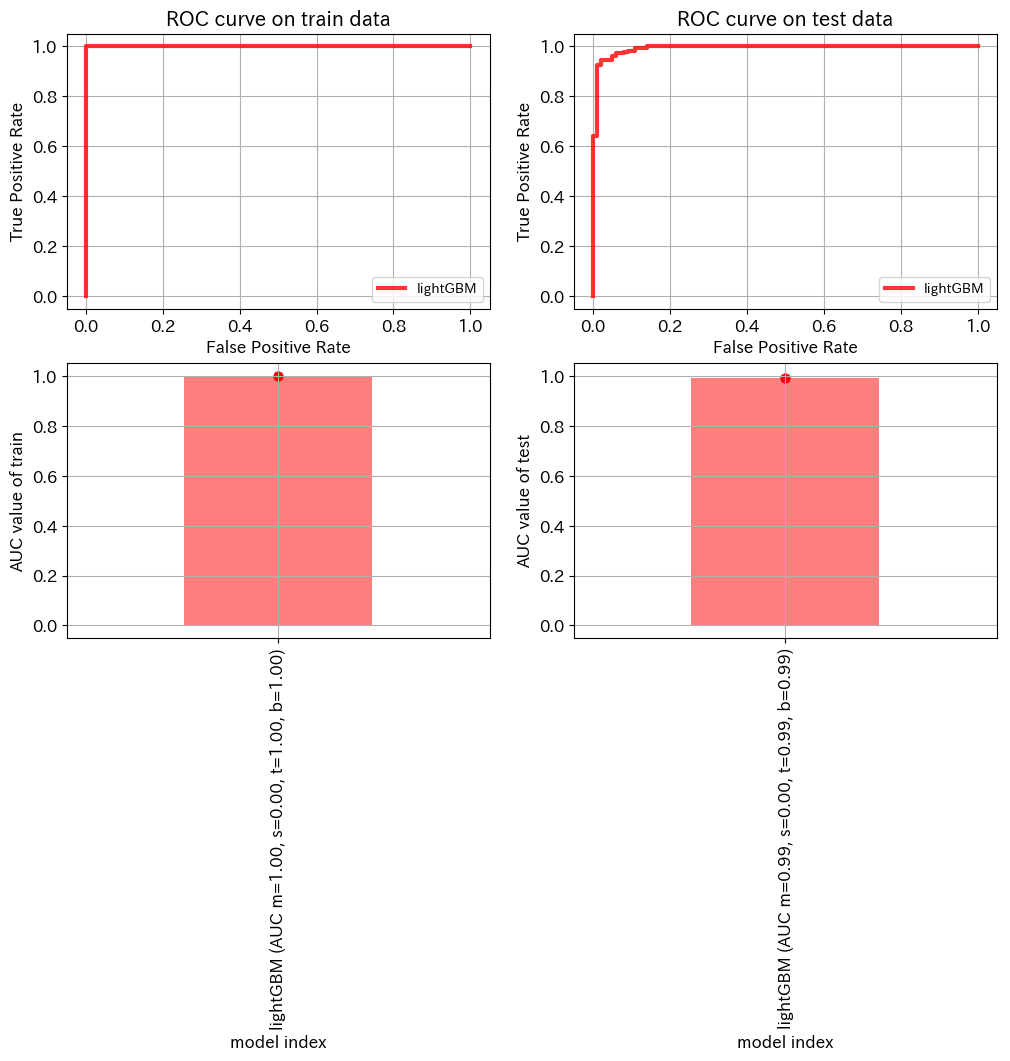

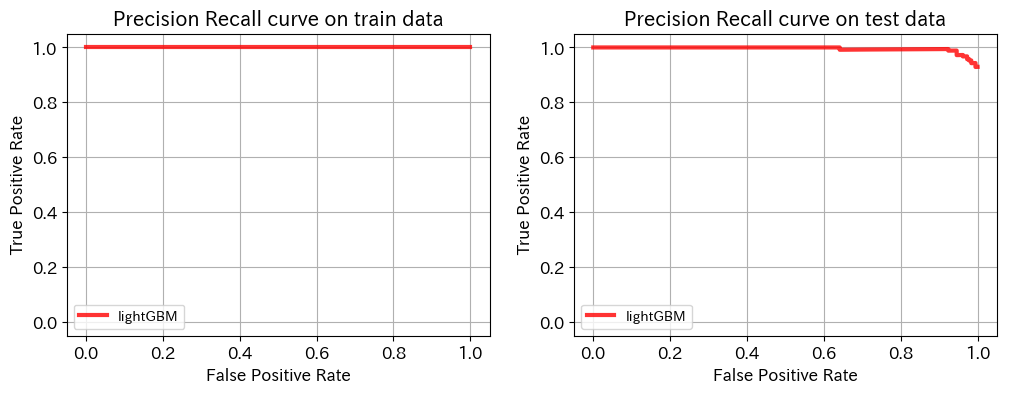

In [21]:
# [STEP 2]
# train and predict by one model (with upsampling)
model = LGBMClassifier(objective     = 'binary',  
                       learning_rate = 0.1, 
                       n_estimators  = 100, 
                       random_state  = 0, 
                       n_jobs        = 4) 

# exec
(model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_cls.train_predict_and_measure(X_train        = X_train,
                                                      y_train        = y_train,
                                                      X_test         = X_test,
                                                      y_test         = y_test, 
                                                      model          = model, 
                                                      column_name    = column_name, 
                                                      sample_balance = True)


train on cv (model:lightGBM, feature dim:30) [start time is 2019-07-10 13:33:20.367387]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:22.036201]




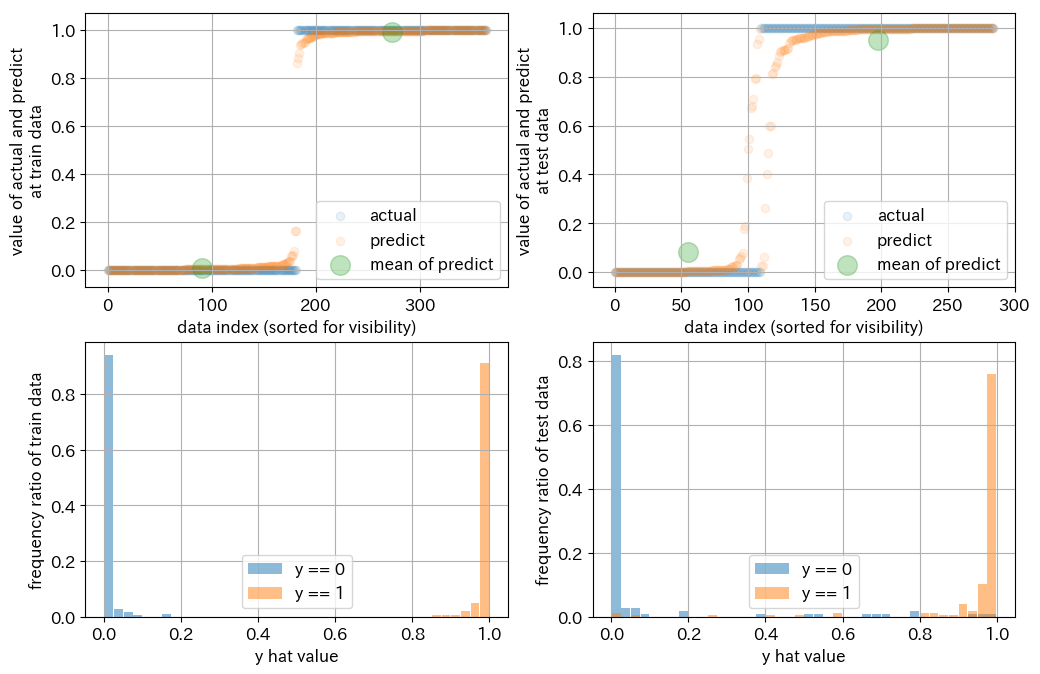

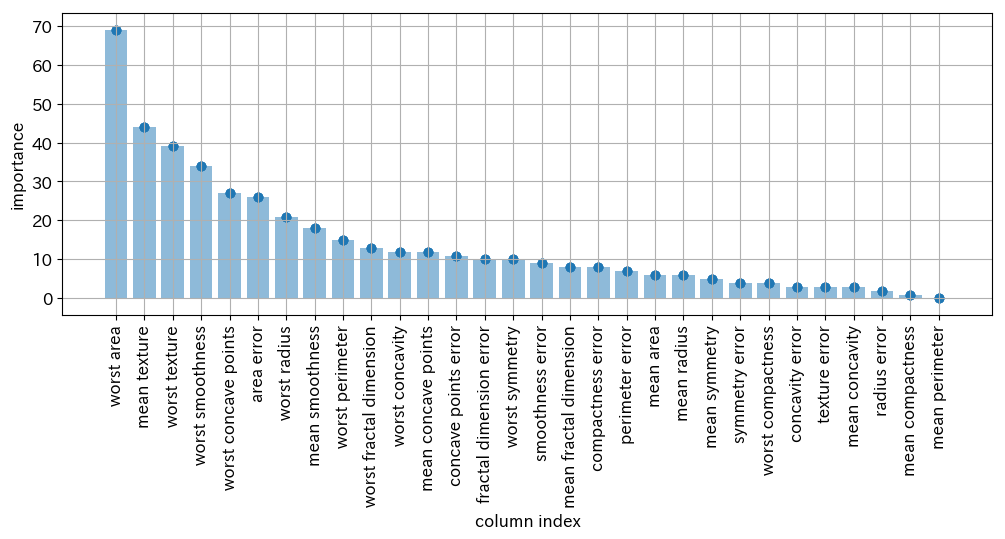

train on cv (model:XGBoost, feature dim:30) [start time is 2019-07-10 13:33:23.213637]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:24.662414]




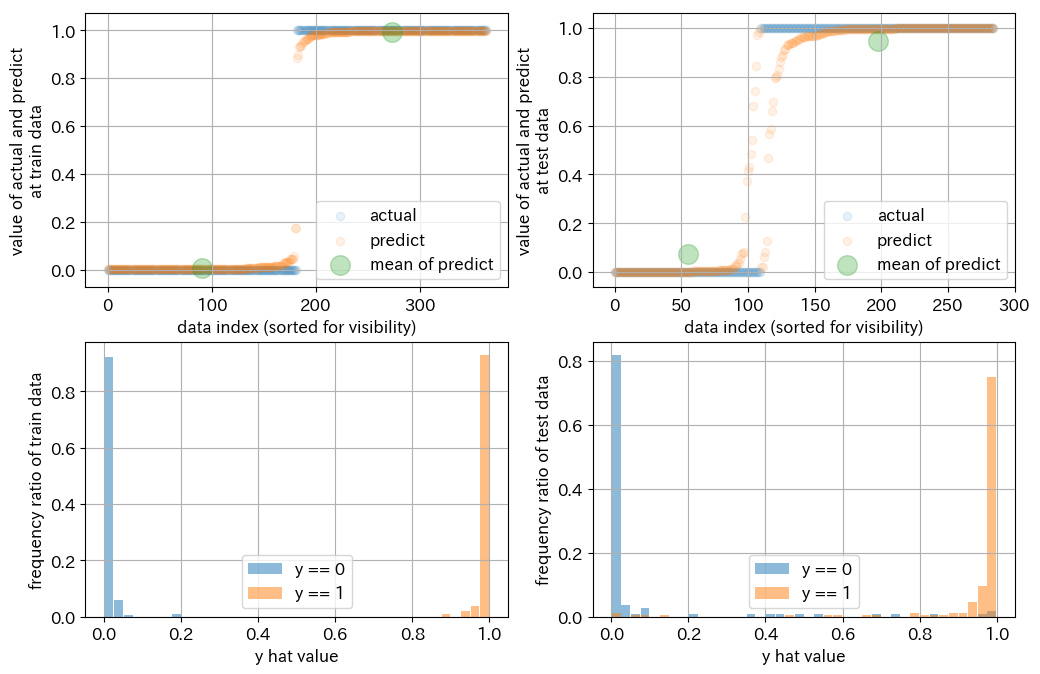

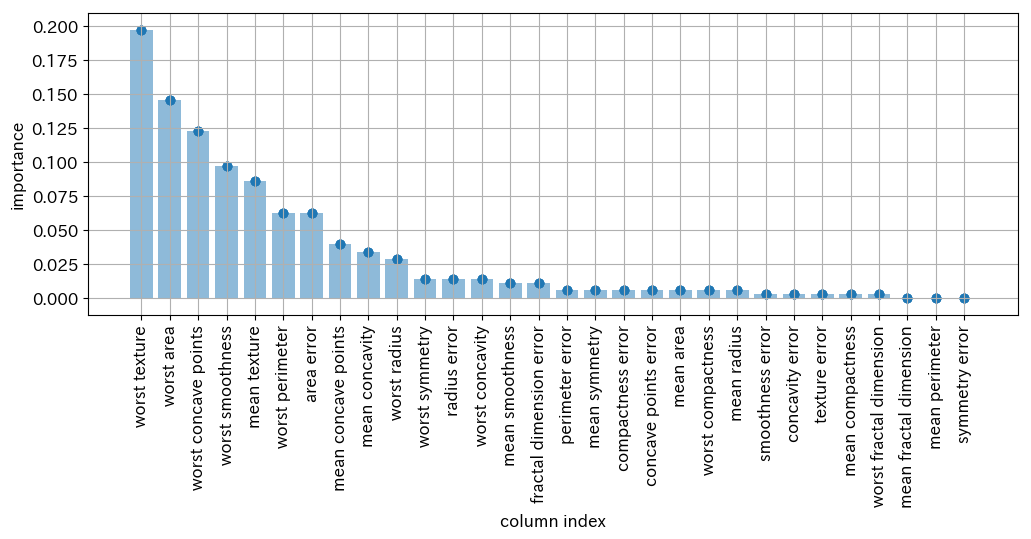

train on cv (model:LogReg, feature dim:30) [start time is 2019-07-10 13:33:26.202431]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.96, test = 0.94 [end time is 2019-07-10 13:33:27.726738]




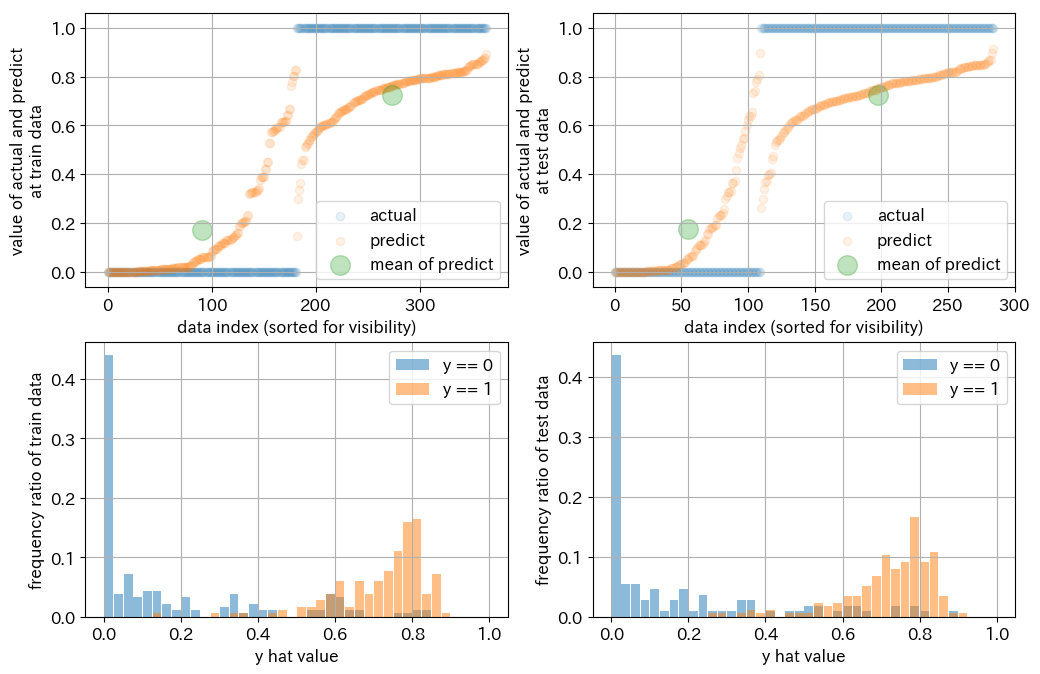

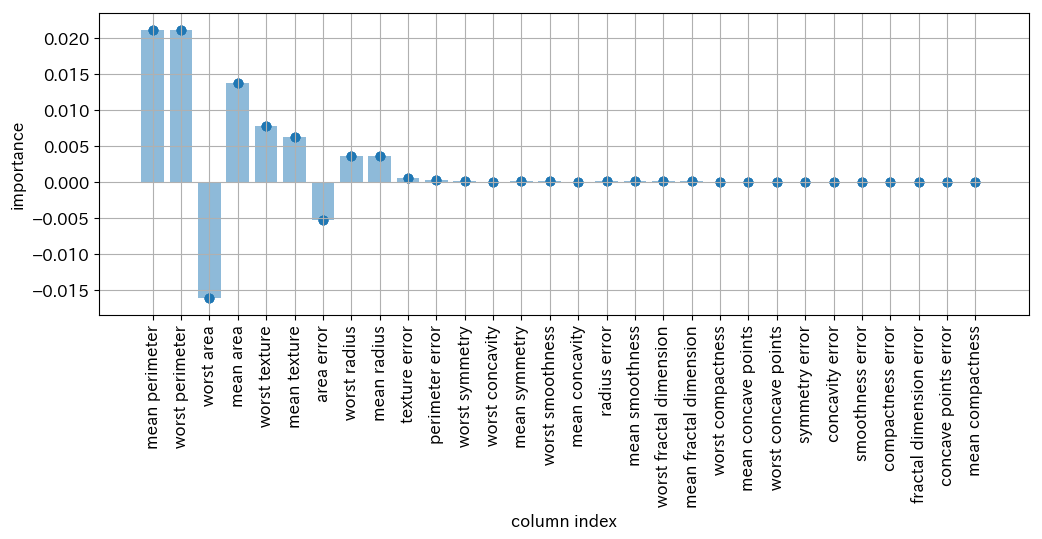



summary result


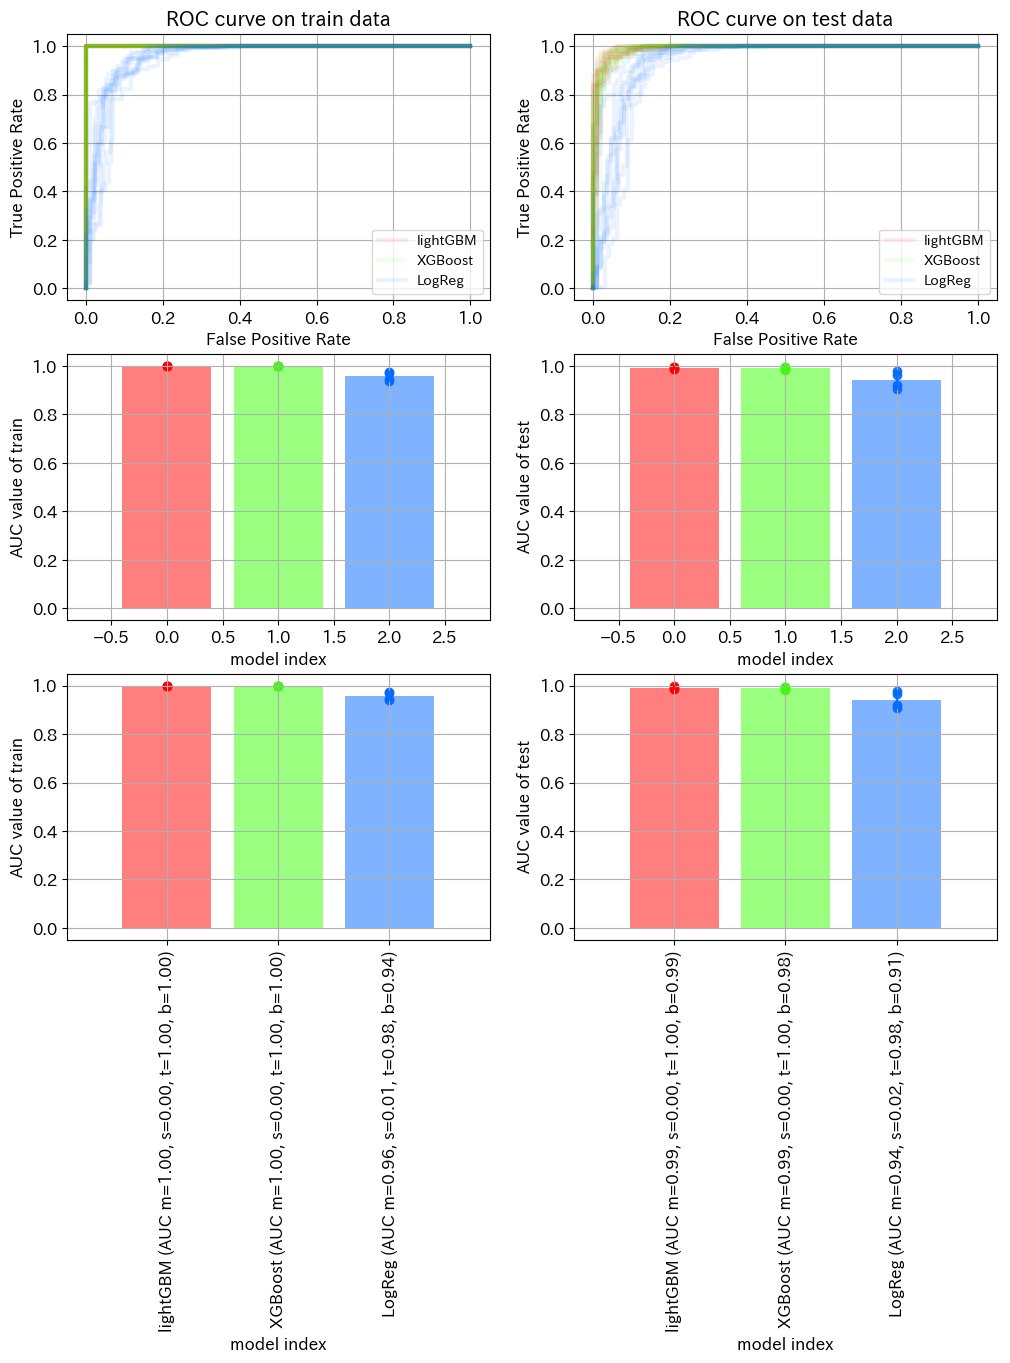

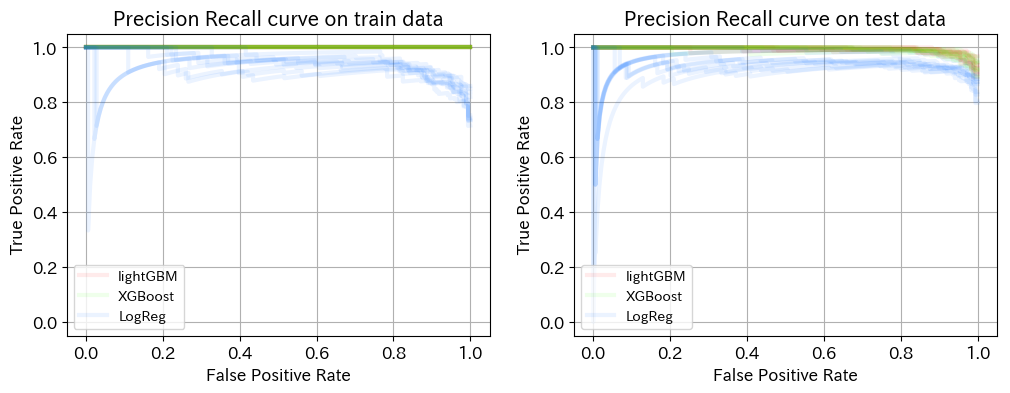

In [22]:
# [STEP 3]
# cross validation by multi model (with updampling)
model      = []
model_name = []

# 1. lightGBM
model_tmp = LGBMClassifier(objective        = 'binary',  
                           learning_rate    = 0.1, 
                           n_estimators     = 100, 
                           min_child_weight = 0.1,
                           num_leaves       = 20,
                           colsample_bytree = 0.5,
                           reg_lambda       = 2.0, 
                           random_state     = 0,
                           n_jobs           = 4) 
model.append(model_tmp)
model_name.append('lightGBM')

# 2. XGBoost
model_tmp = XGBClassifier(learning_rate = 0.1, 
                          n_estimators  = 100, 
                          max_depth     = 5, 
                          subsample     = 1.0, 
                          random_state  = 0, 
                          n_jobs        = 4) 
model.append(model_tmp)
model_name.append('XGBoost')

# 3. LogisticRegression
model_tmp = LogisticRegression(C      = 0.1, 
                               solver = 'sag', 
                               n_jobs = 4)
model.append(model_tmp)
model_name.append('LogReg')

# exec
(y_train_hat_stock_tmp, 
 y_train_stock_tmp, 
 y_test_hat_stock_tmp, 
 y_test_stock_tmp, 
 importance_stock_tmp) = ppap_tab_cls.cv_random(X              = X, 
                                                y              = y, 
                                                model          = model, 
                                                model_name     = model_name,
                                                column_name    = column_name,  
                                                sample_balance = True)

plt.show()


train on cv (model:[m:0,r:0] lightGBM_param0_RFE30, feature dim:30) [start time is 2019-07-10 13:33:30.384188]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:32.059877]




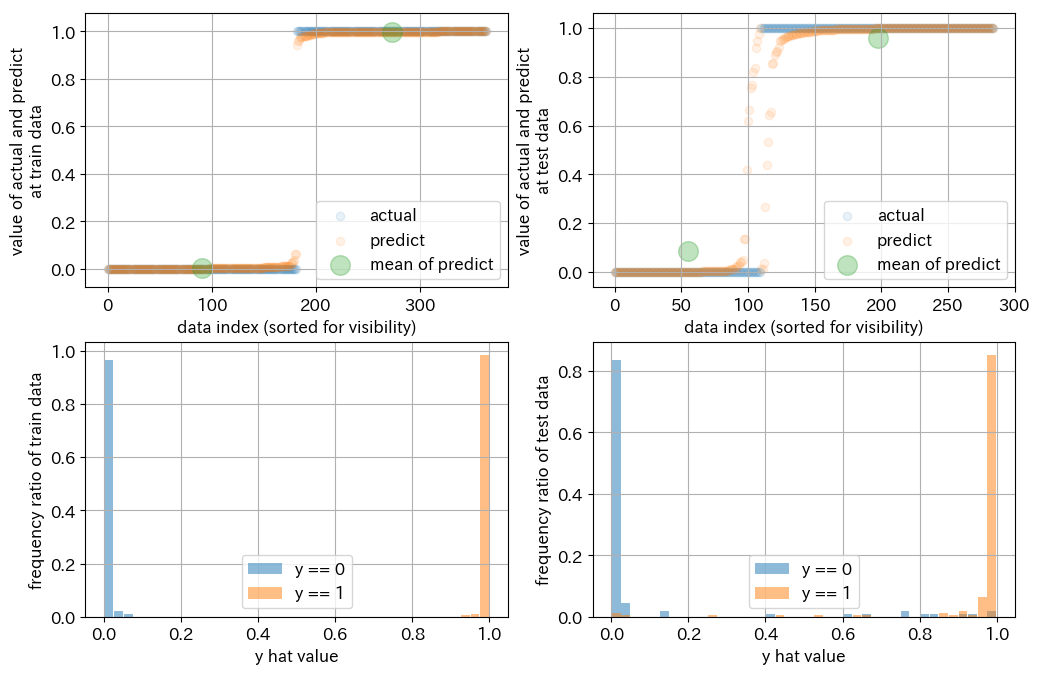

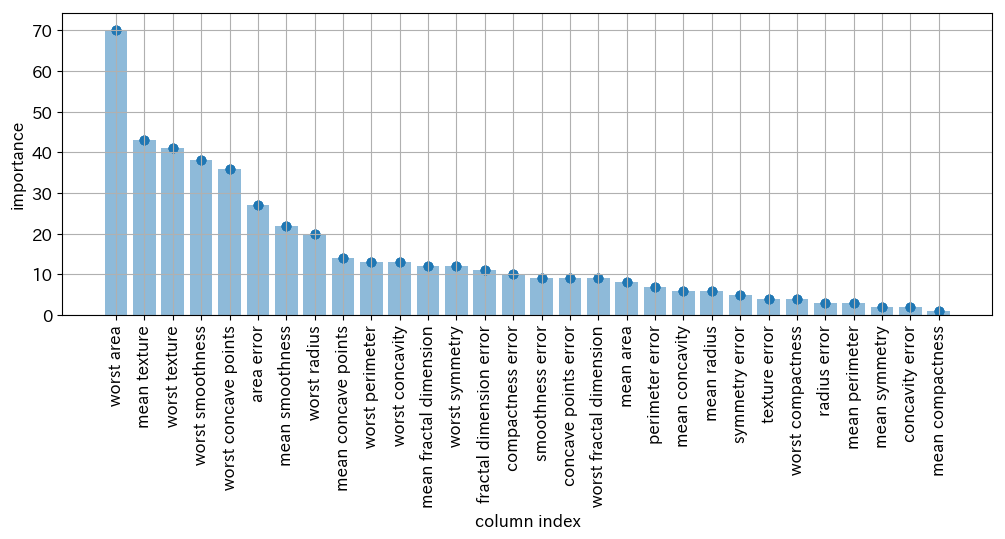

train on cv (model:[m:0,r:1] lightGBM_param0_RFE20, feature dim:20) [start time is 2019-07-10 13:33:33.435788]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:35.028551]




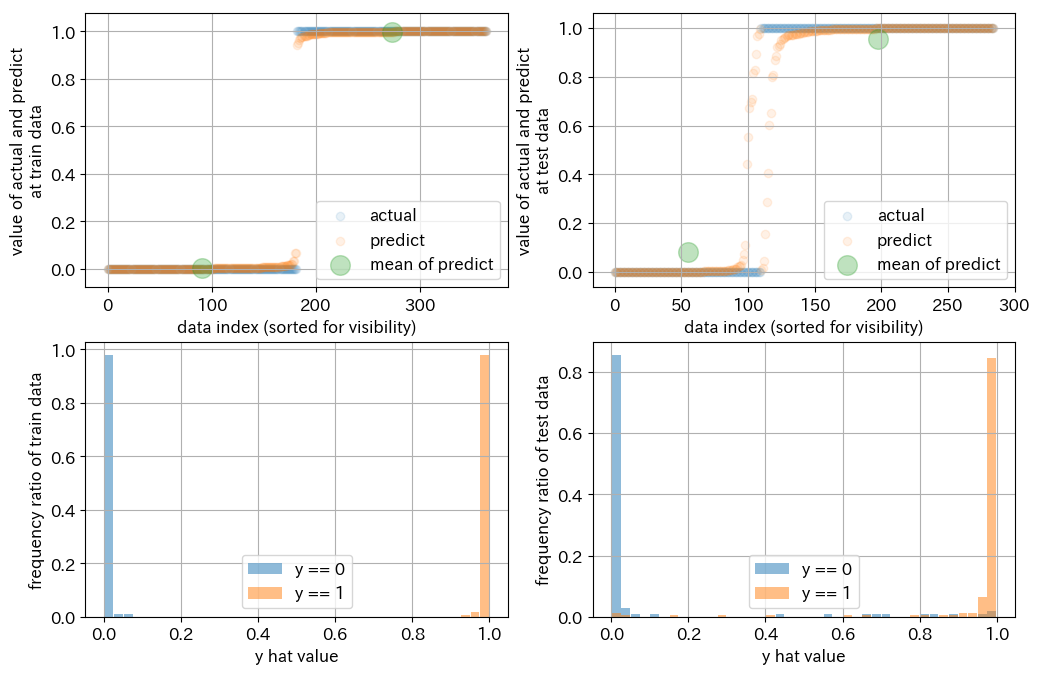

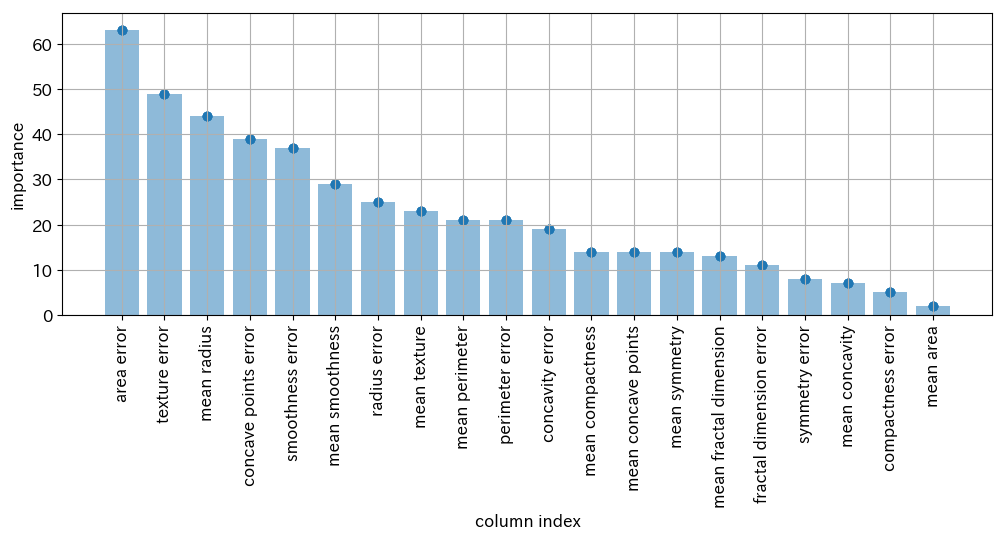

train on cv (model:[m:0,r:2] lightGBM_param0_RFE15, feature dim:15) [start time is 2019-07-10 13:33:36.204979]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:38.014284]




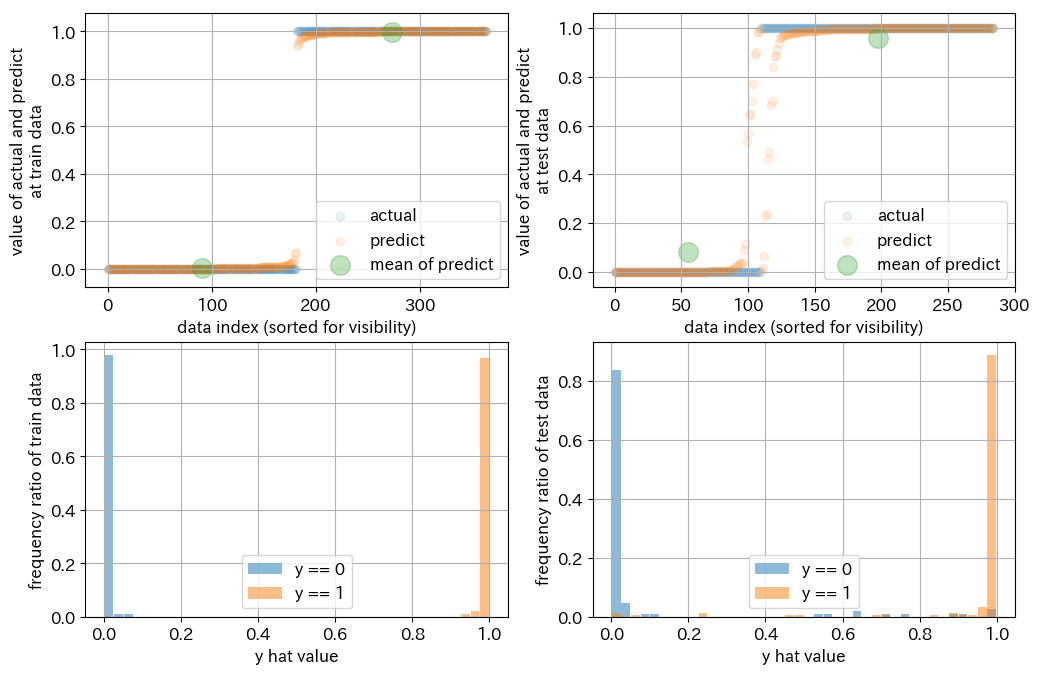

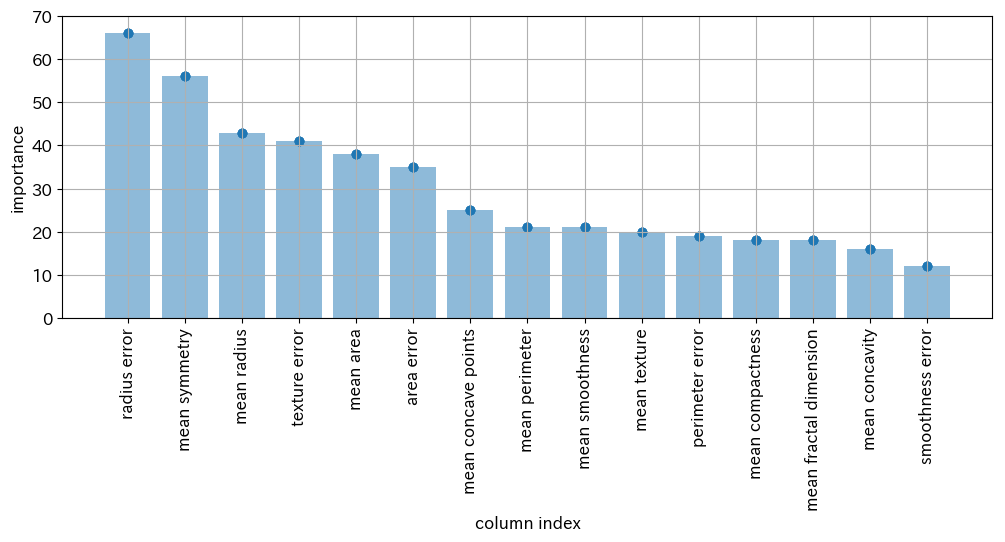

train on cv (model:[m:0,r:3] lightGBM_param0_RFE10, feature dim:10) [start time is 2019-07-10 13:33:39.241096]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:40.906046]




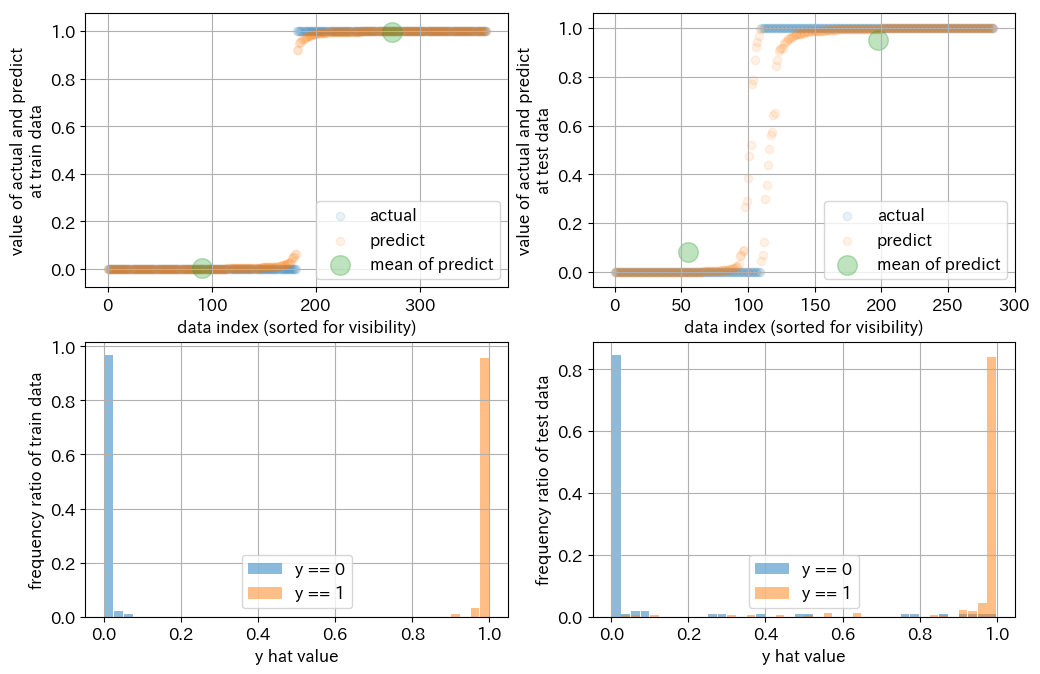

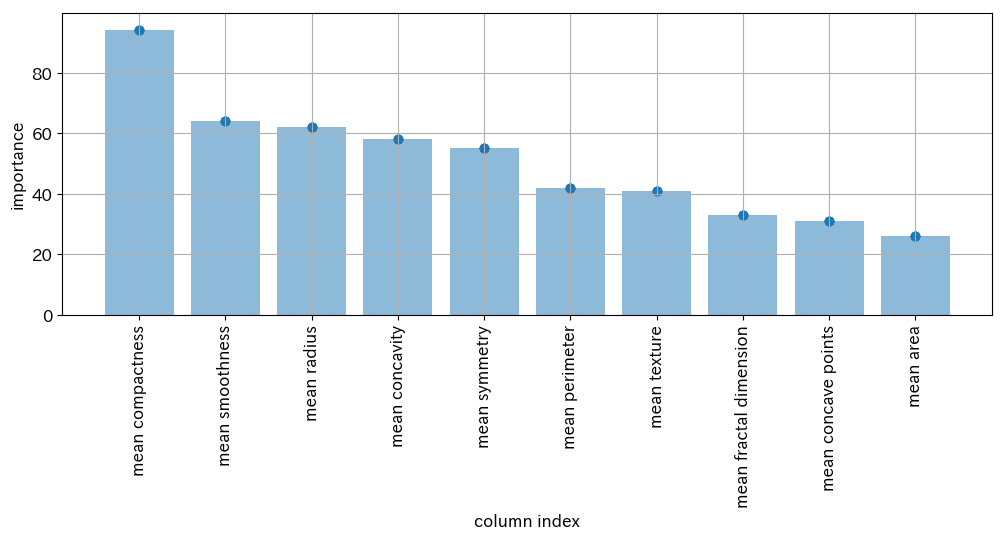

train on cv (model:[m:0,r:4] lightGBM_param0_RFE7, feature dim:7) [start time is 2019-07-10 13:33:42.076727]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:43.741290]




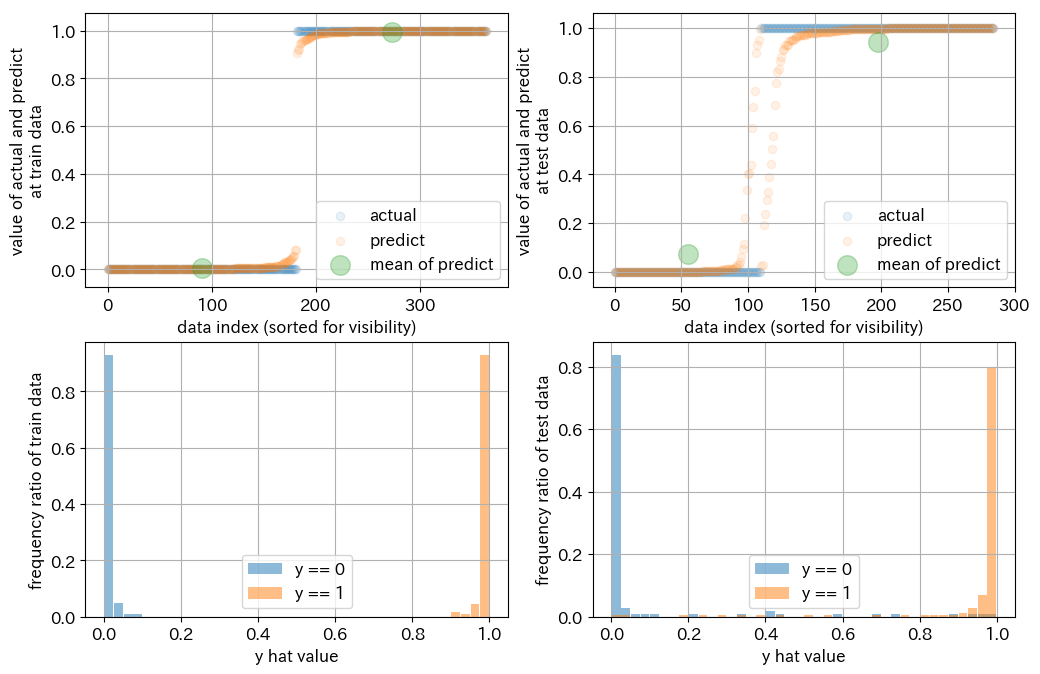

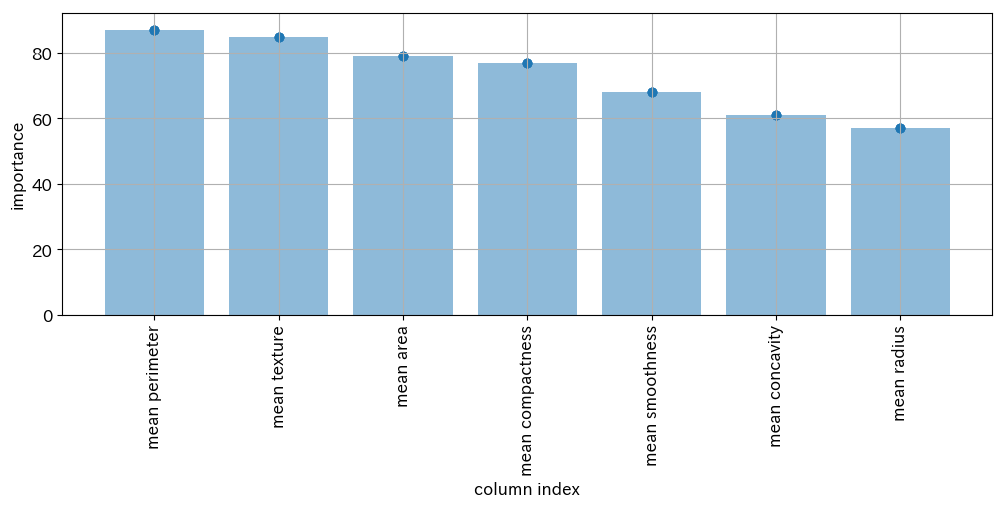

train on cv (model:[m:0,r:5] lightGBM_param0_RFE5, feature dim:5) [start time is 2019-07-10 13:33:44.766142]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:46.201942]




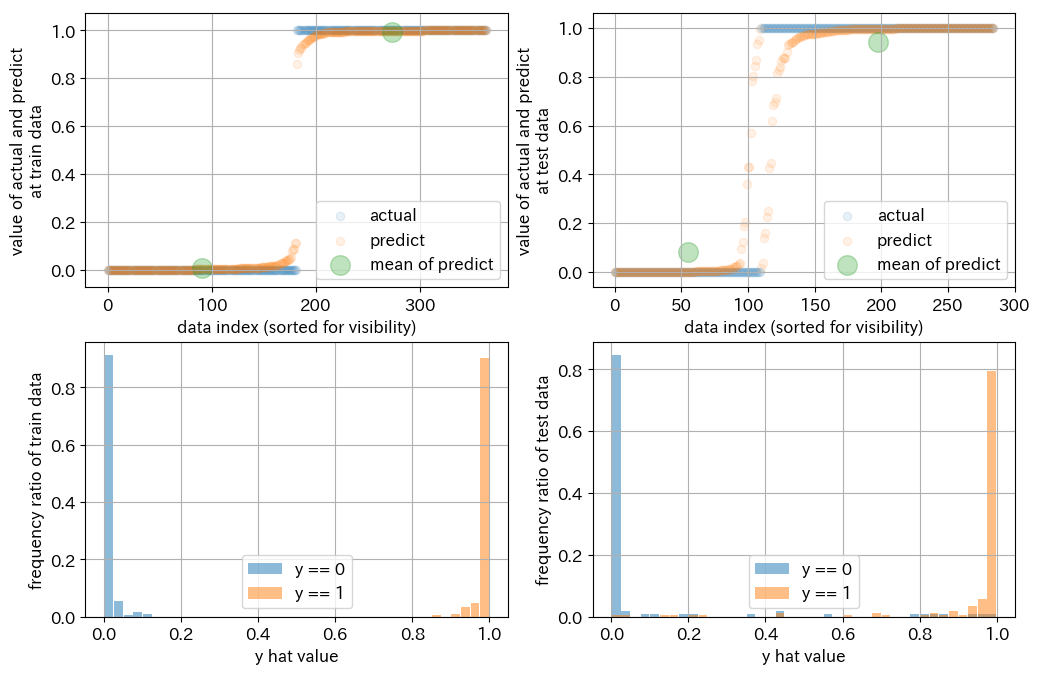

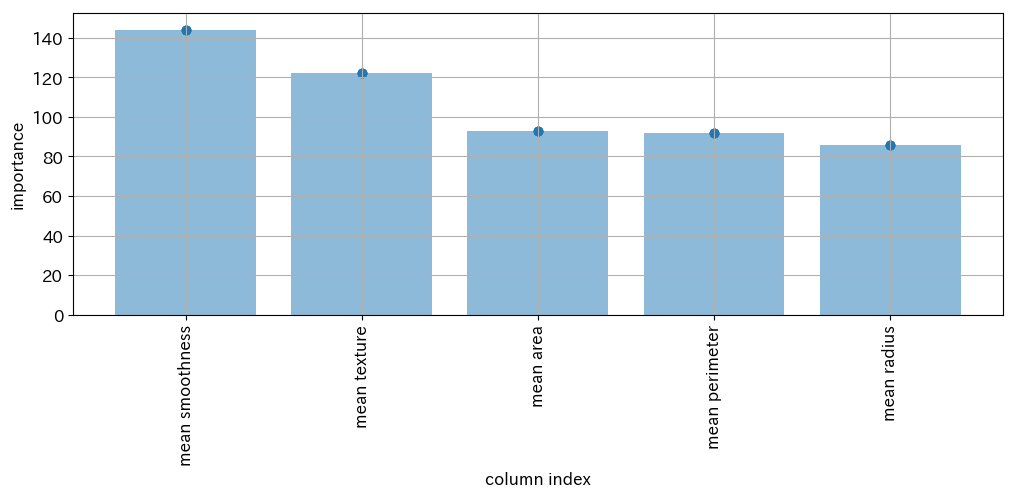

train on cv (model:[m:0,r:6] lightGBM_param0_RFE3, feature dim:3) [start time is 2019-07-10 13:33:47.128714]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.95 [end time is 2019-07-10 13:33:48.785481]




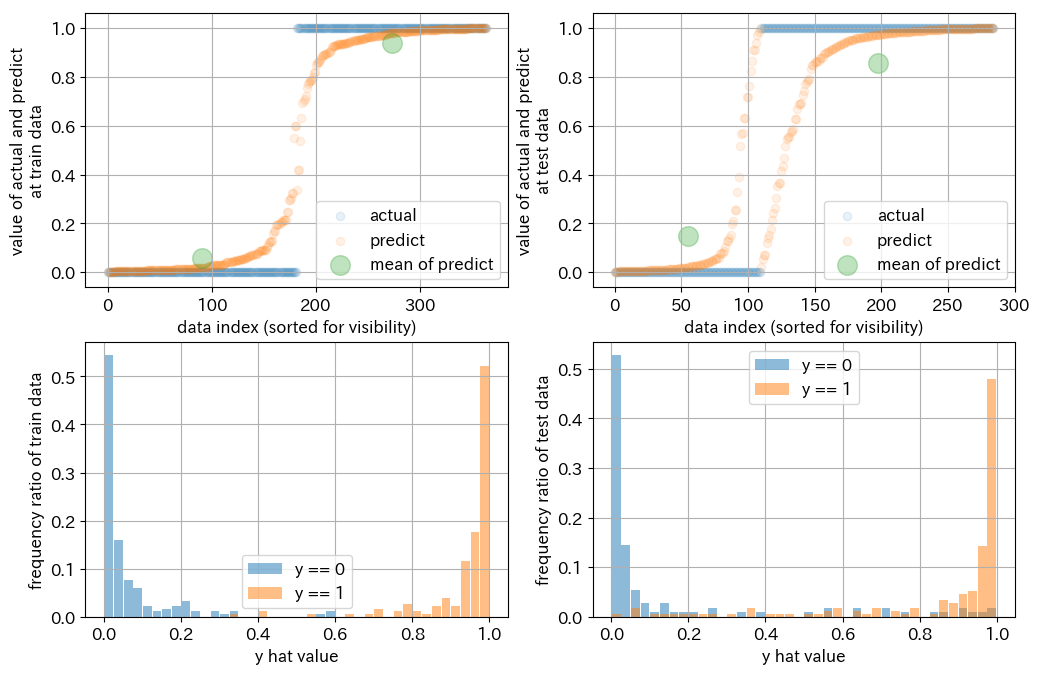

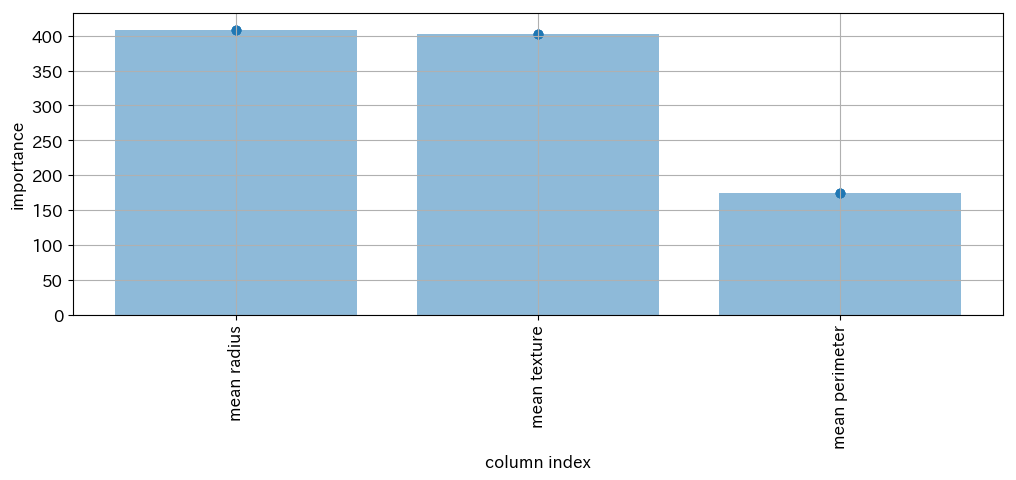

train on cv (model:[m:1,r:0] XGBoost_param0_RFE30, feature dim:30) [start time is 2019-07-10 13:33:49.786507]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:50.895288]




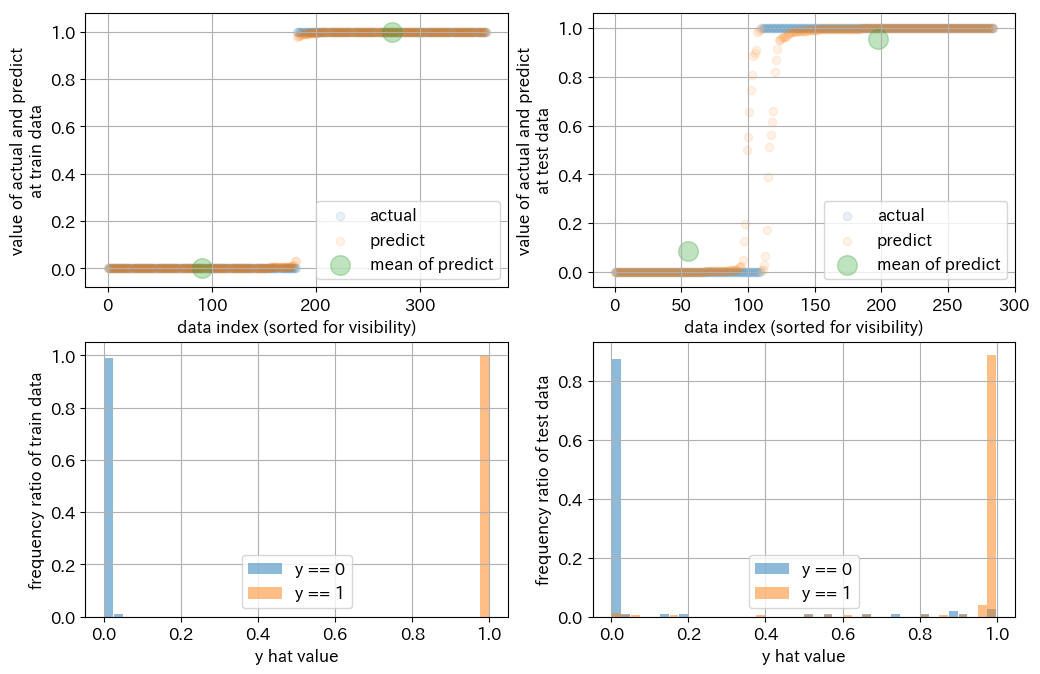

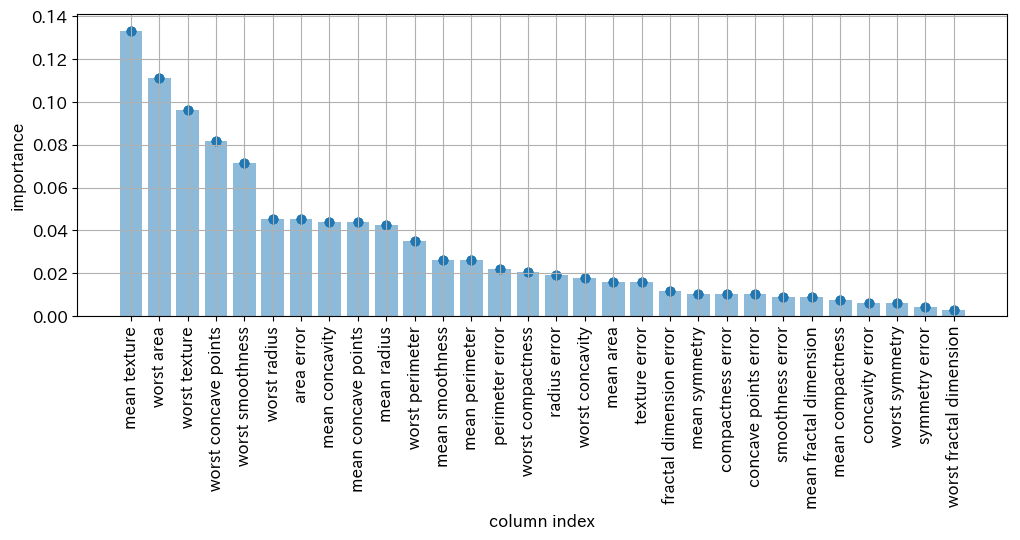

train on cv (model:[m:1,r:1] XGBoost_param0_RFE20, feature dim:20) [start time is 2019-07-10 13:33:52.178760]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:53.125246]




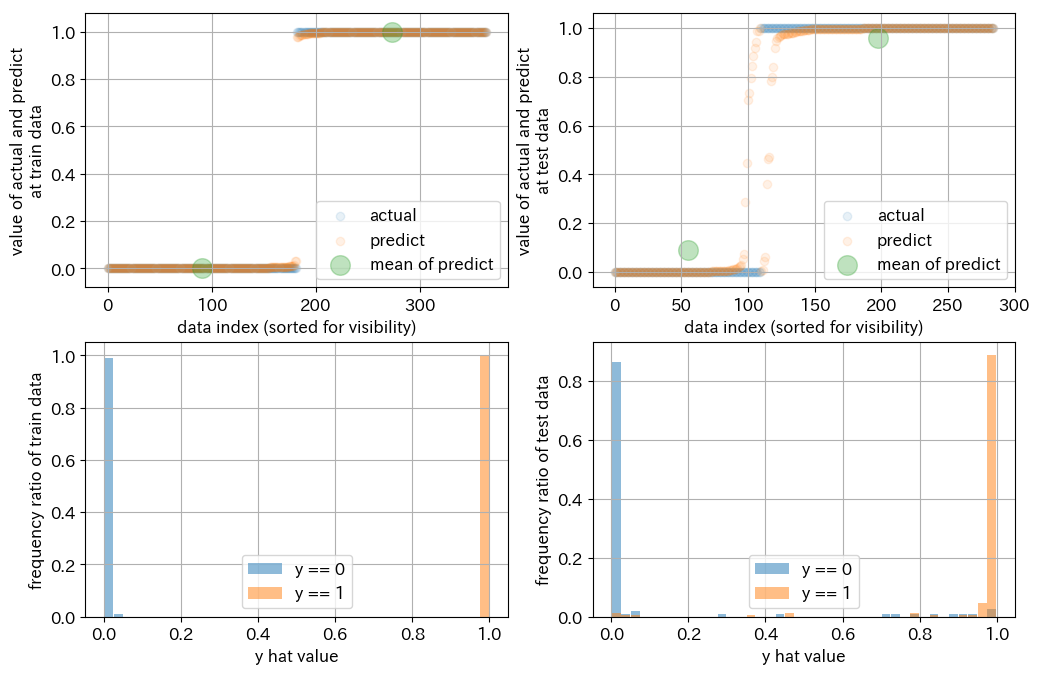

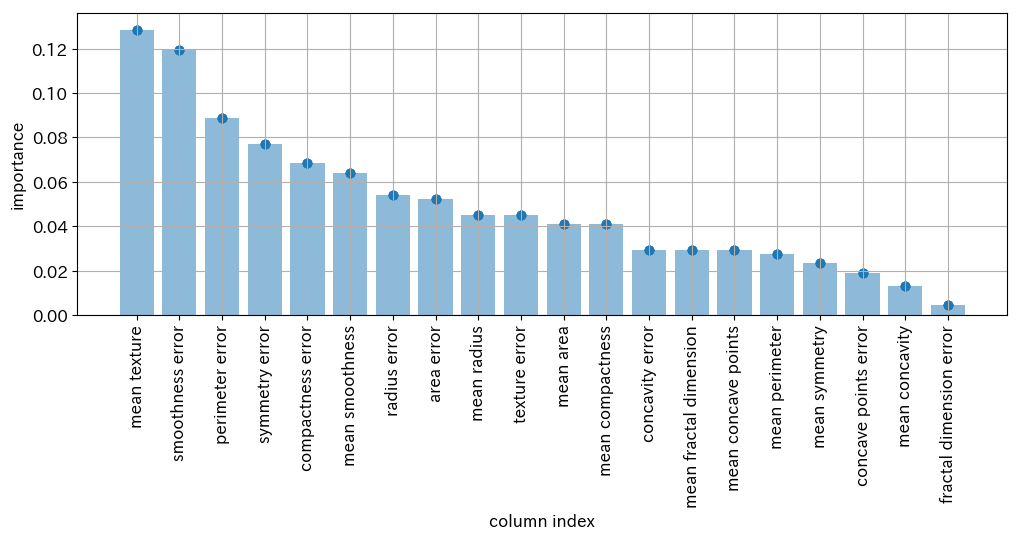

train on cv (model:[m:1,r:2] XGBoost_param0_RFE15, feature dim:15) [start time is 2019-07-10 13:33:54.315720]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:55.242848]




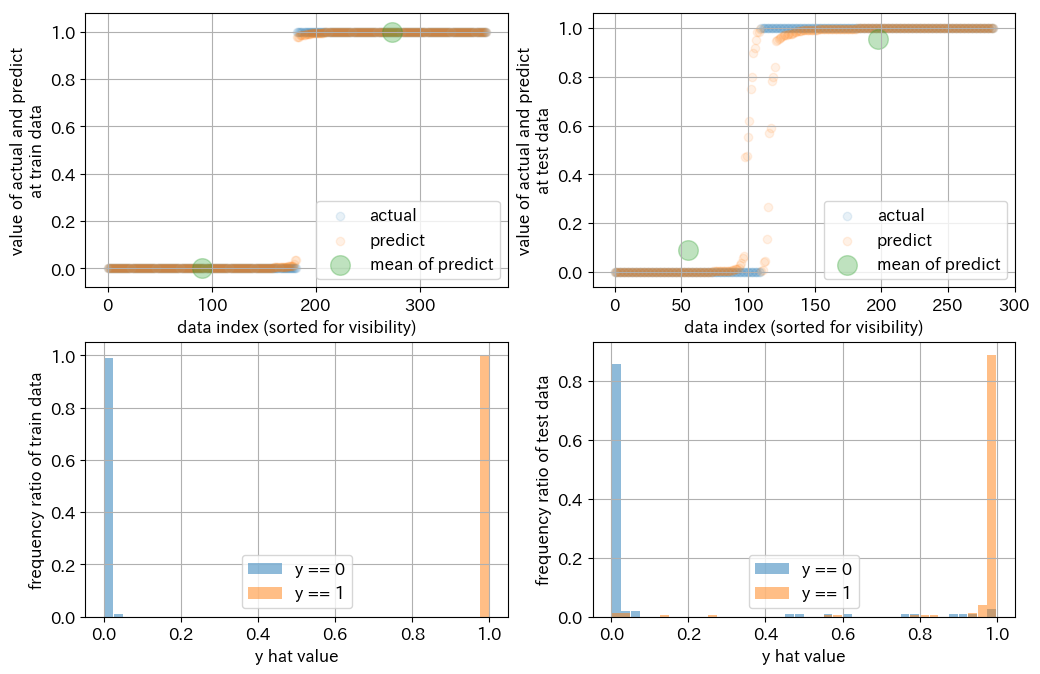

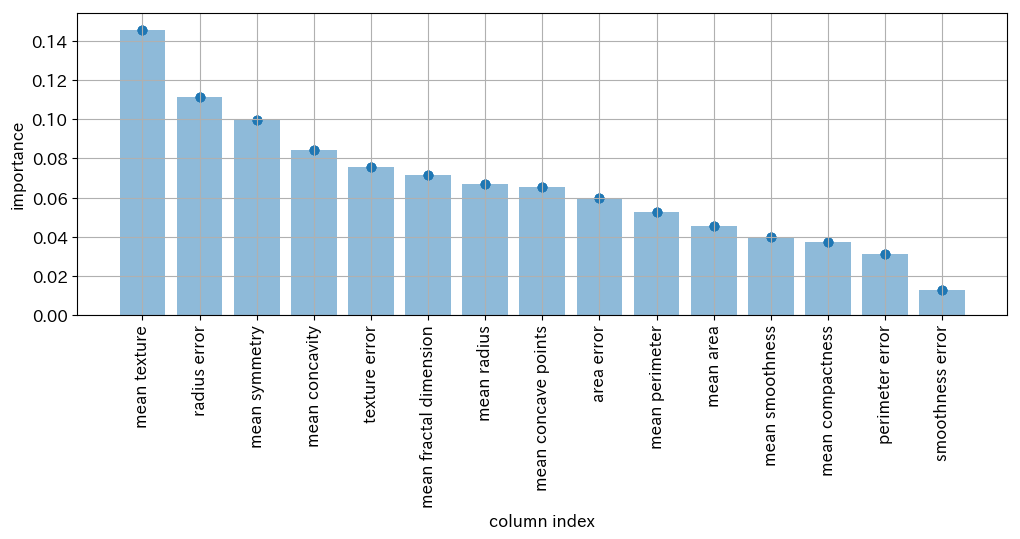

train on cv (model:[m:1,r:3] XGBoost_param0_RFE10, feature dim:10) [start time is 2019-07-10 13:33:56.399432]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:57.363846]




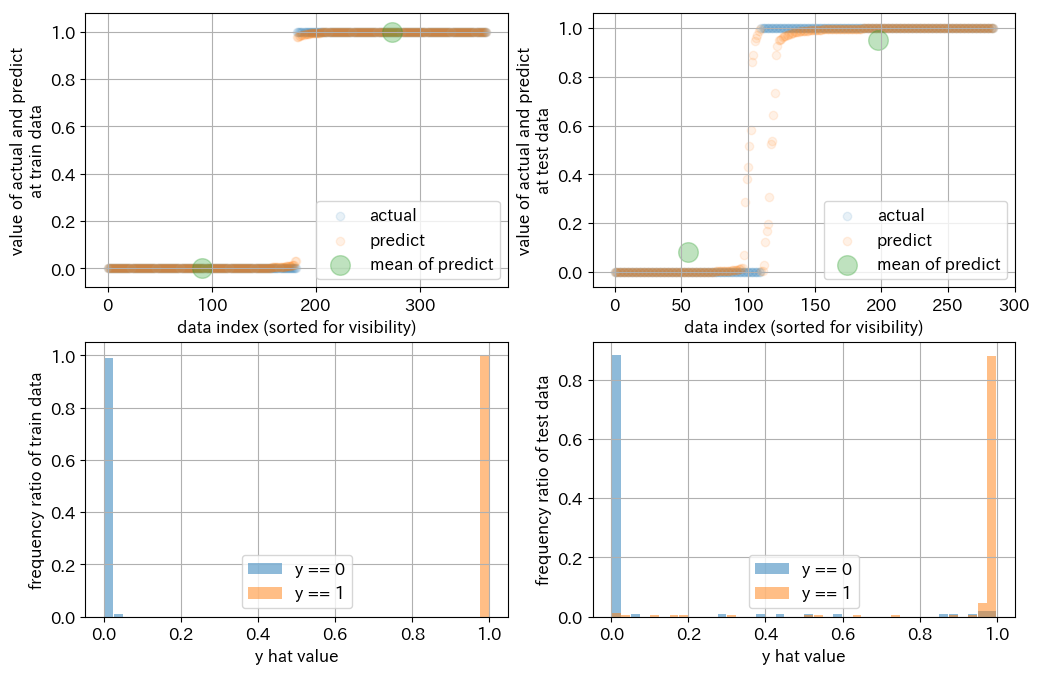

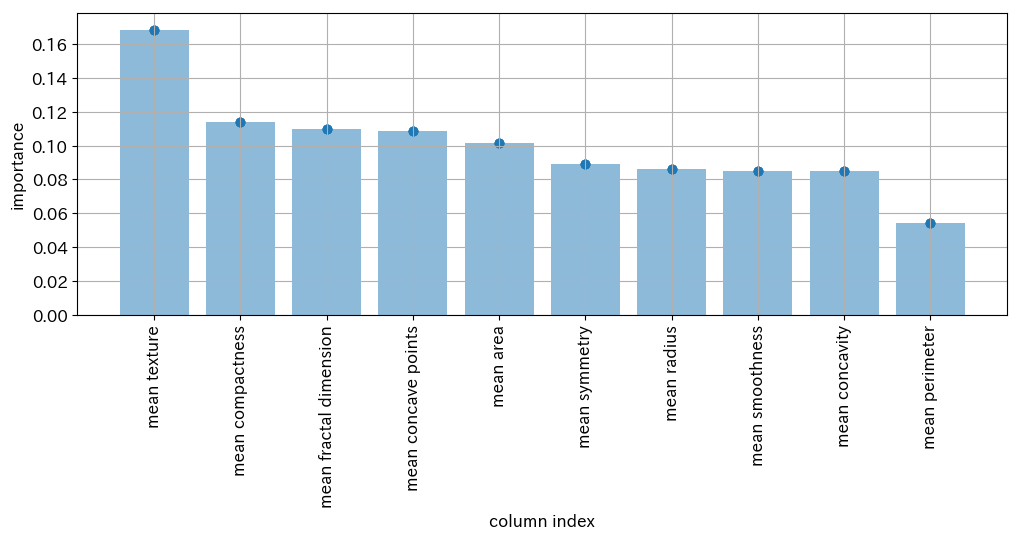

train on cv (model:[m:1,r:4] XGBoost_param0_RFE7, feature dim:7) [start time is 2019-07-10 13:33:58.559648]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:33:59.505664]




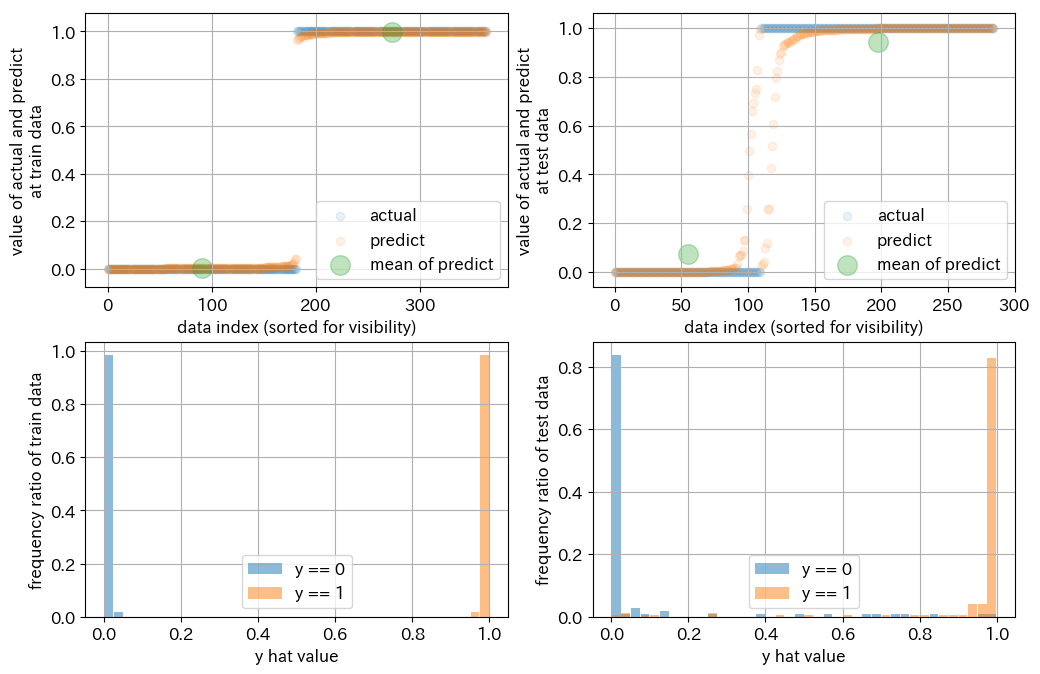

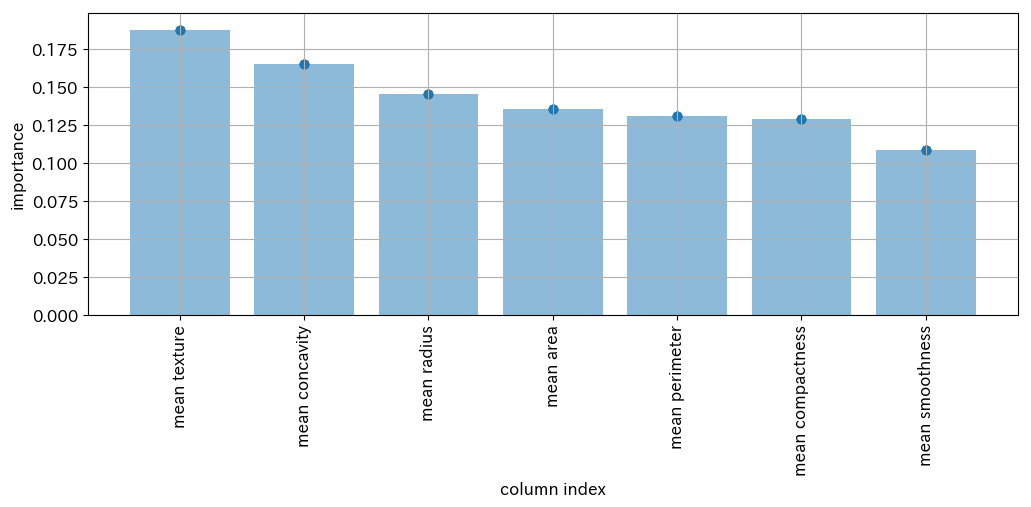

train on cv (model:[m:1,r:5] XGBoost_param0_RFE5, feature dim:5) [start time is 2019-07-10 13:34:00.568306]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:34:01.418329]




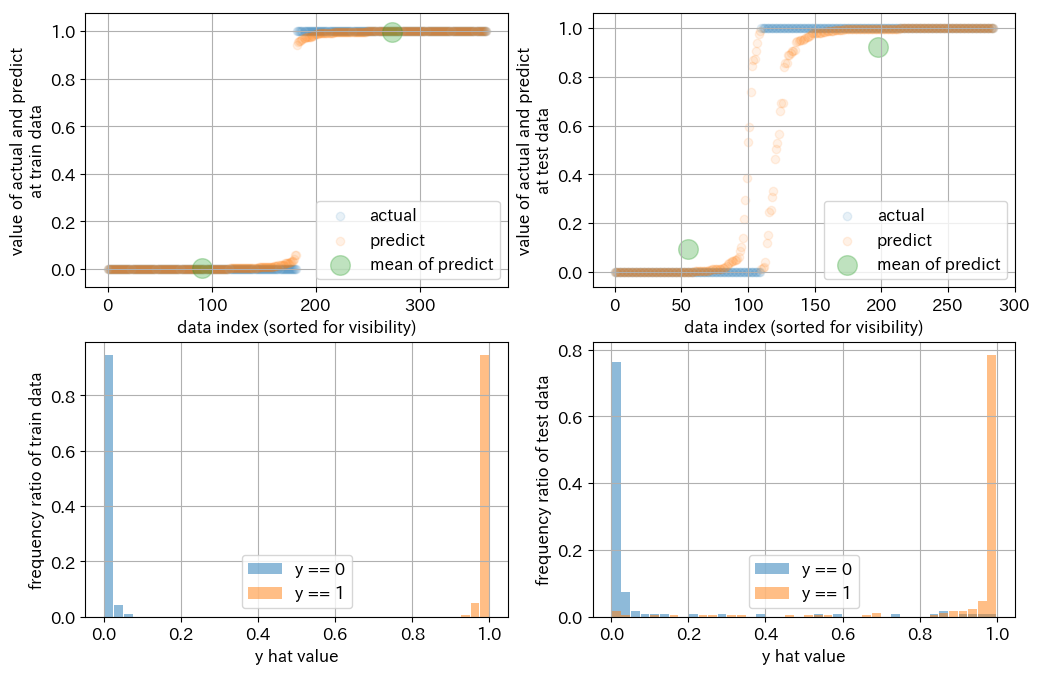

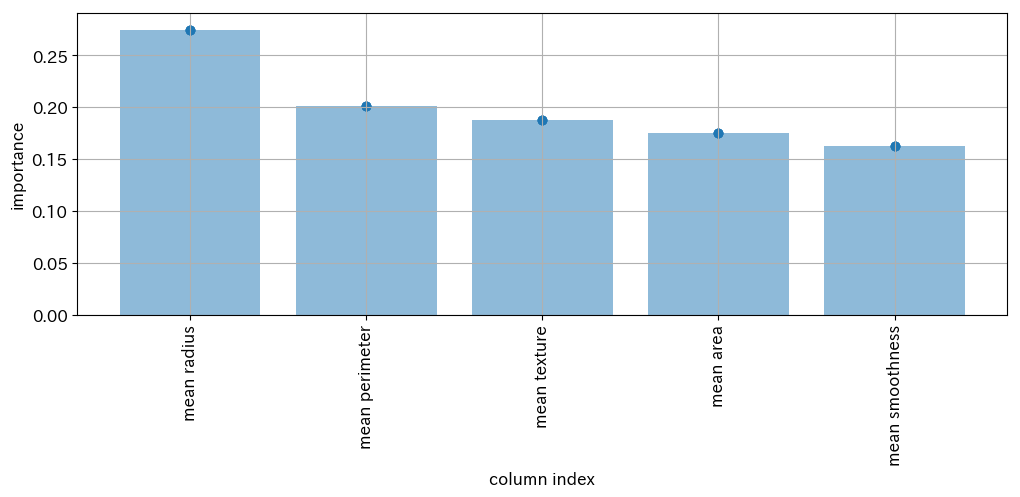

train on cv (model:[m:1,r:6] XGBoost_param0_RFE3, feature dim:3) [start time is 2019-07-10 13:34:02.548206]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.94 [end time is 2019-07-10 13:34:03.574687]




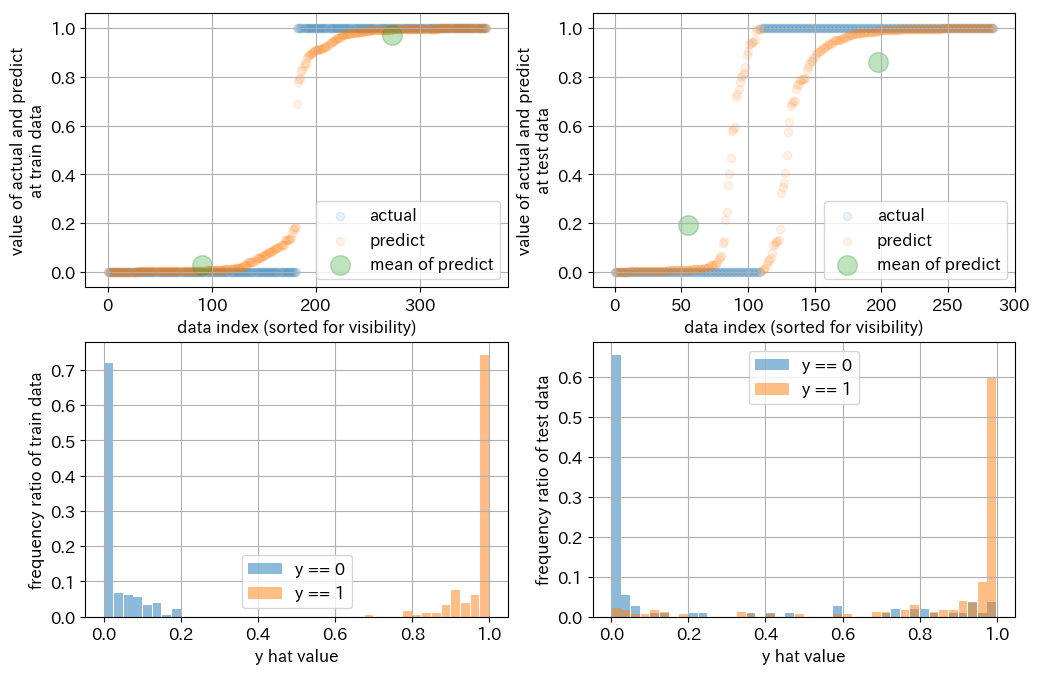

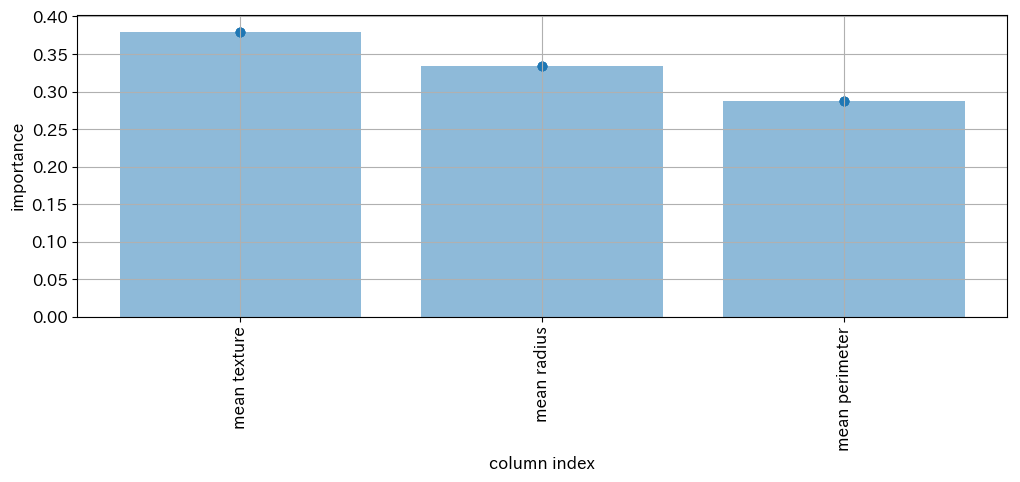

train on cv (model:[m:2,r:0] LogReg_param0_RFE30, feature dim:30) [start time is 2019-07-10 13:34:04.604074]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.96, test = 0.94 [end time is 2019-07-10 13:34:06.141035]




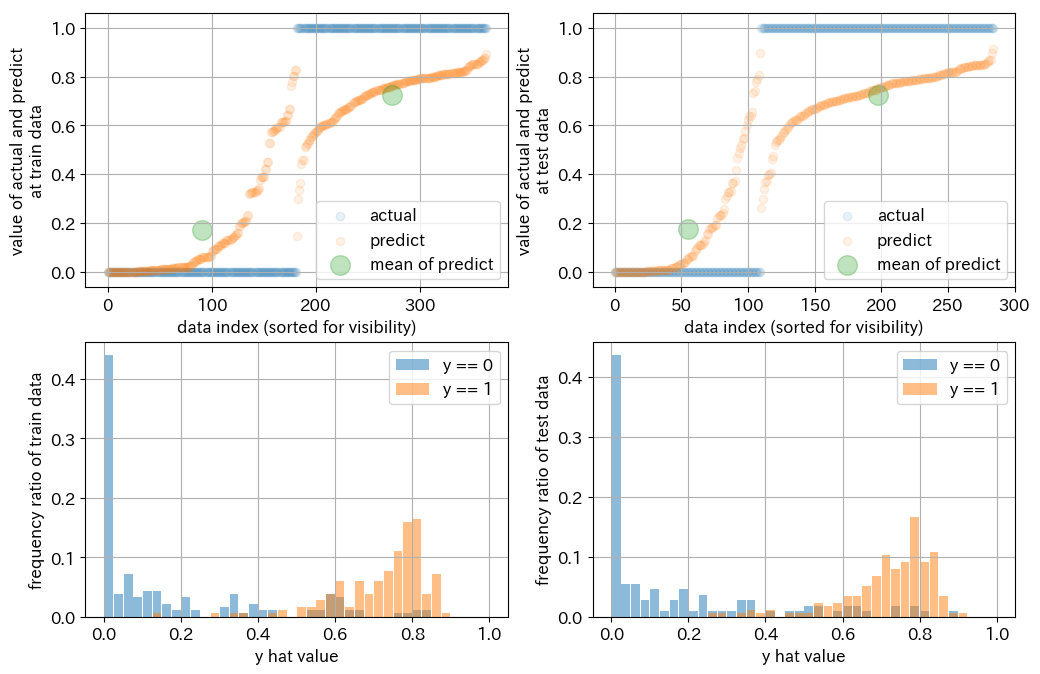

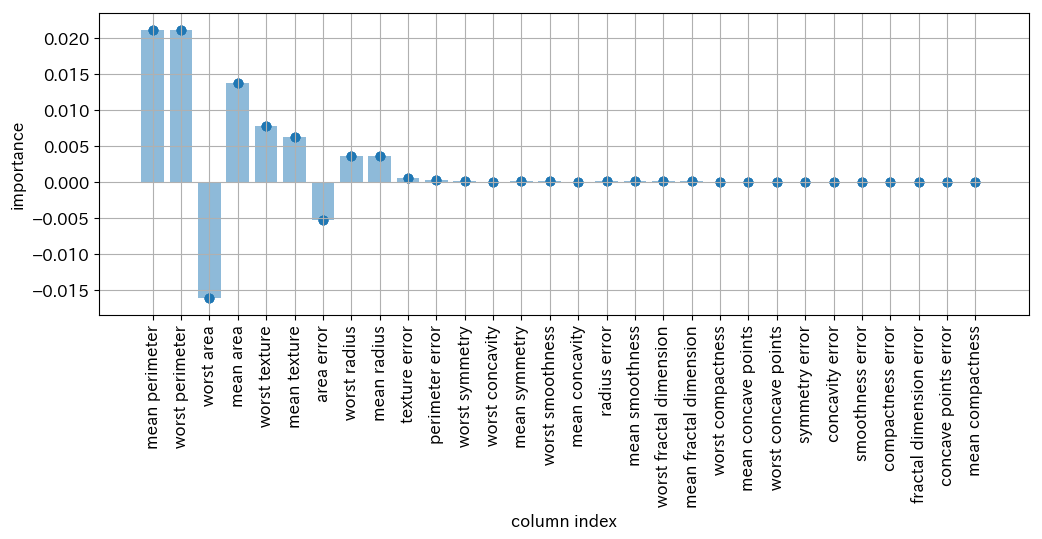

train on cv (model:[m:2,r:1] LogReg_param0_RFE20, feature dim:20) [start time is 2019-07-10 13:34:07.314886]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.89, test = 0.89 [end time is 2019-07-10 13:34:09.089143]




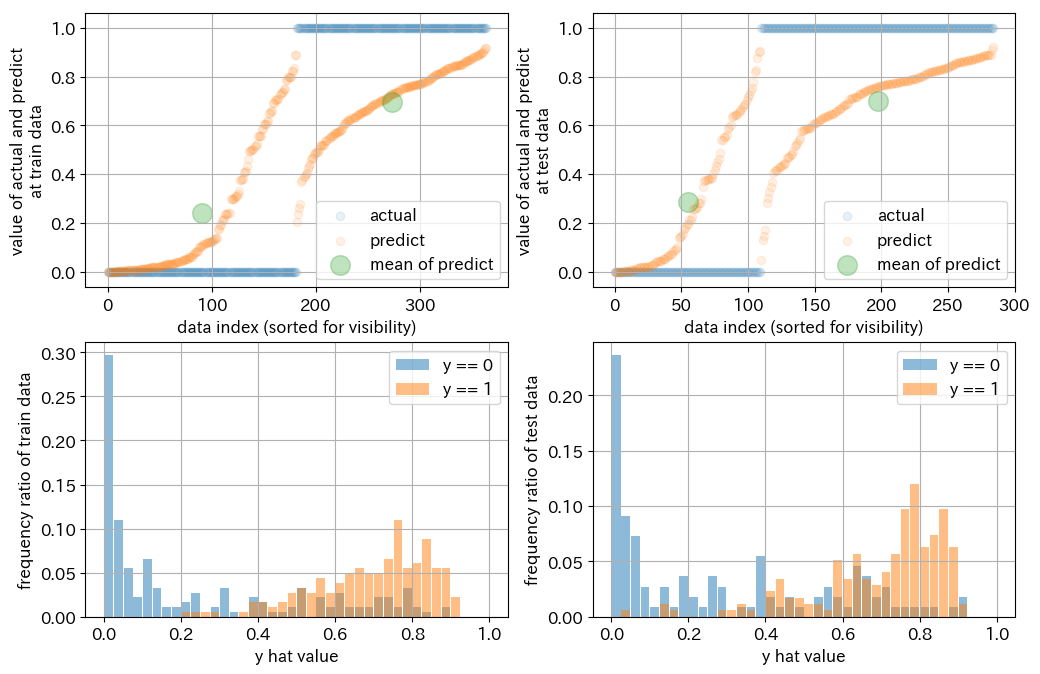

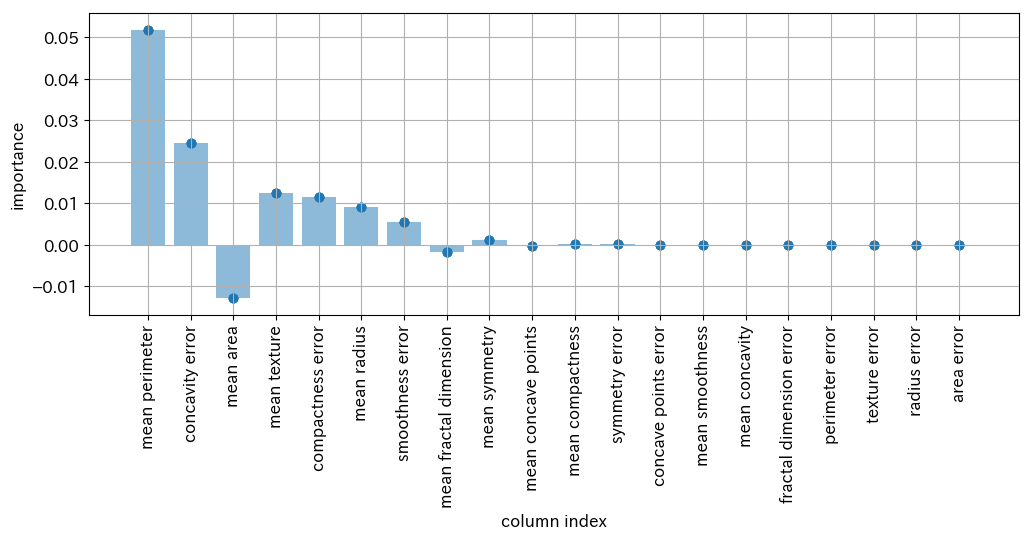

train on cv (model:[m:2,r:2] LogReg_param0_RFE15, feature dim:15) [start time is 2019-07-10 13:34:10.208087]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.91, test = 0.89 [end time is 2019-07-10 13:34:11.725582]




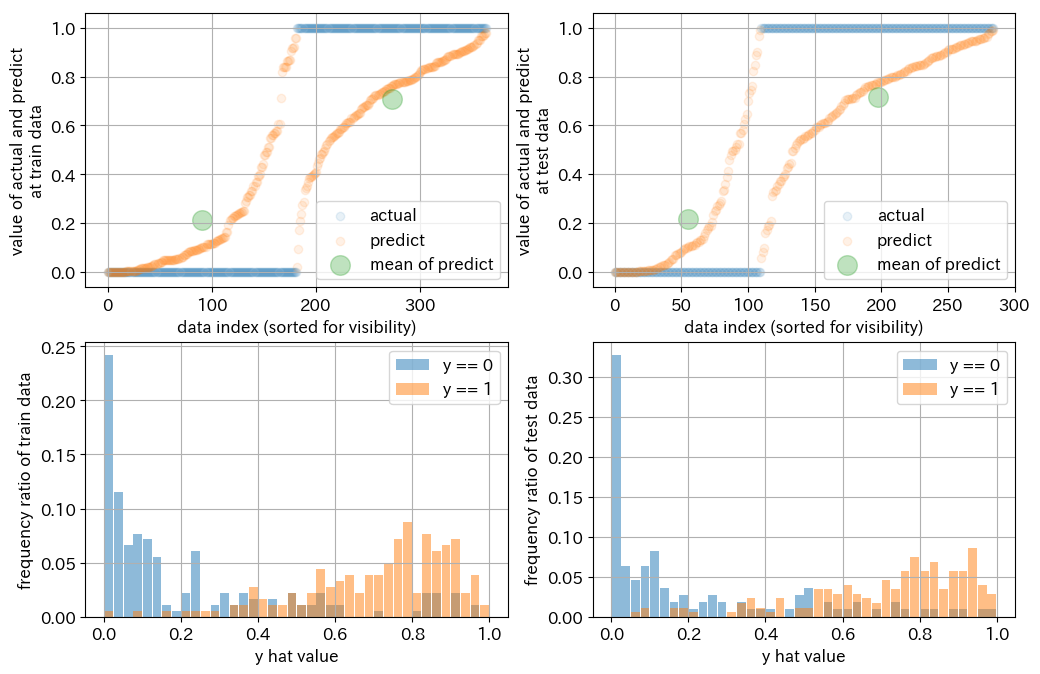

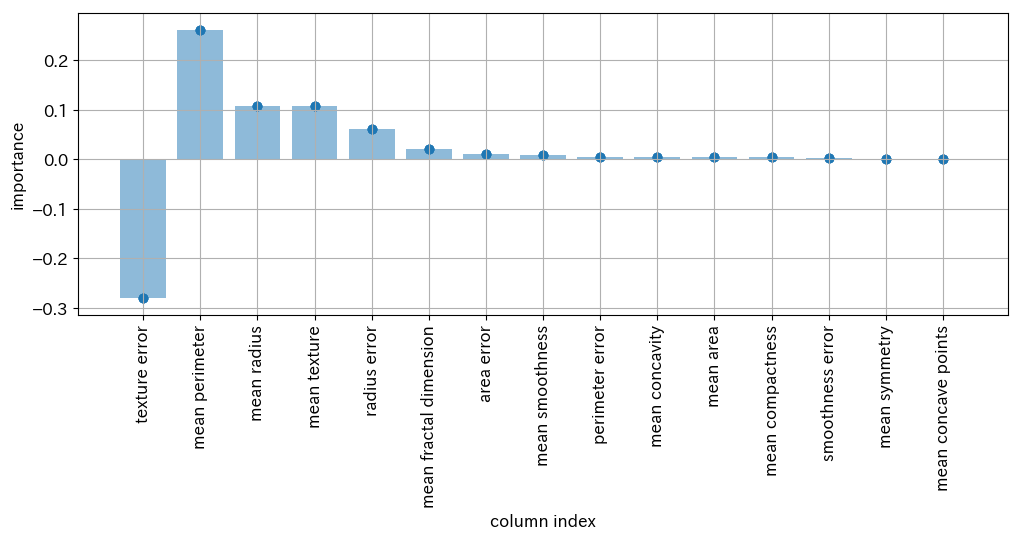

train on cv (model:[m:2,r:3] LogReg_param0_RFE10, feature dim:10) [start time is 2019-07-10 13:34:12.825751]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.87, test = 0.85 [end time is 2019-07-10 13:34:14.316490]




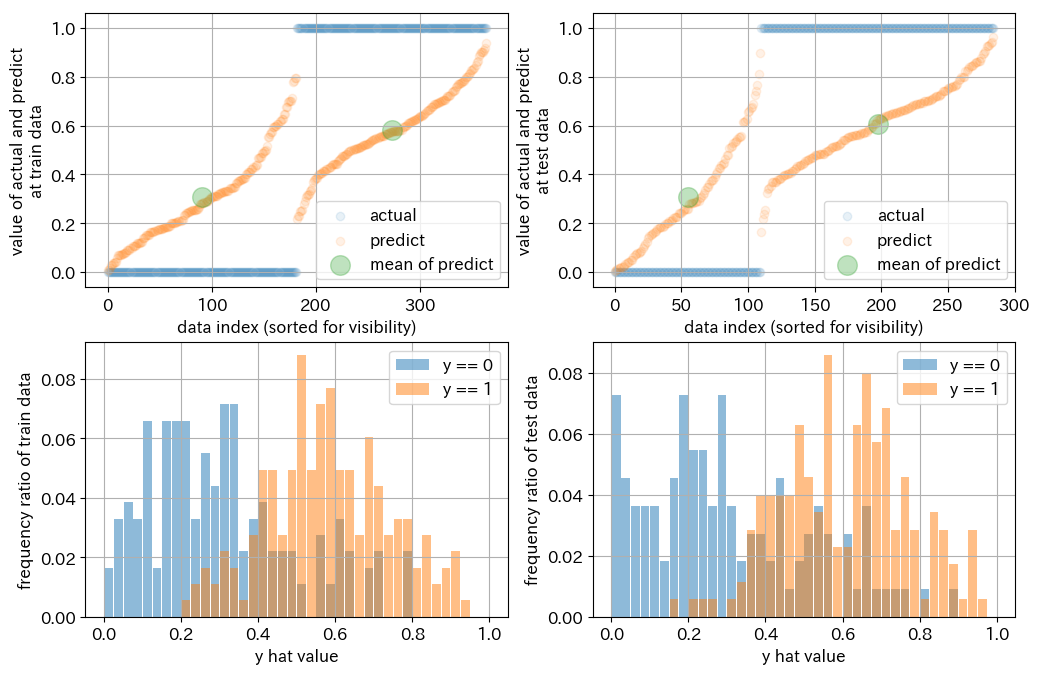

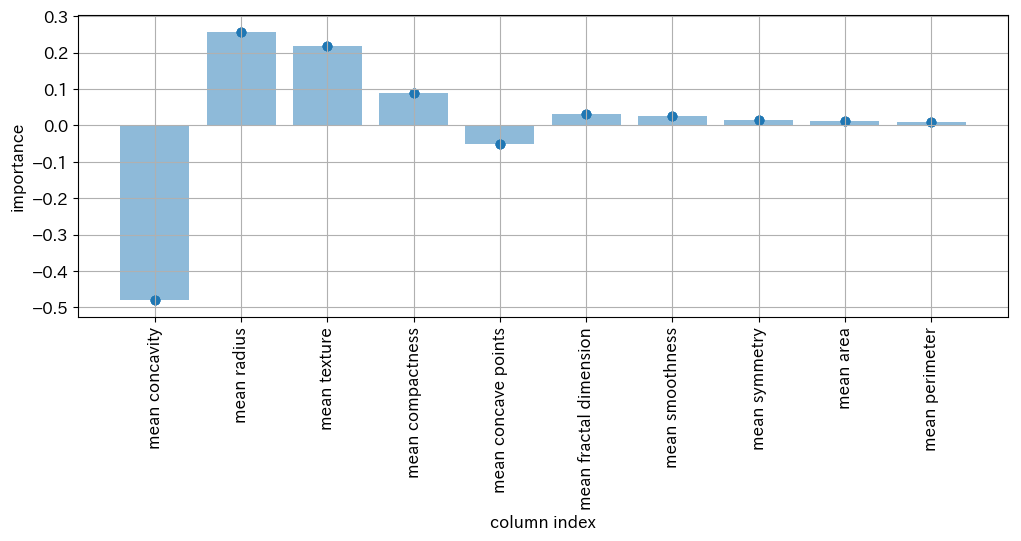

train on cv (model:[m:2,r:4] LogReg_param0_RFE7, feature dim:7) [start time is 2019-07-10 13:34:15.508895]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.78, test = 0.78 [end time is 2019-07-10 13:34:17.116867]




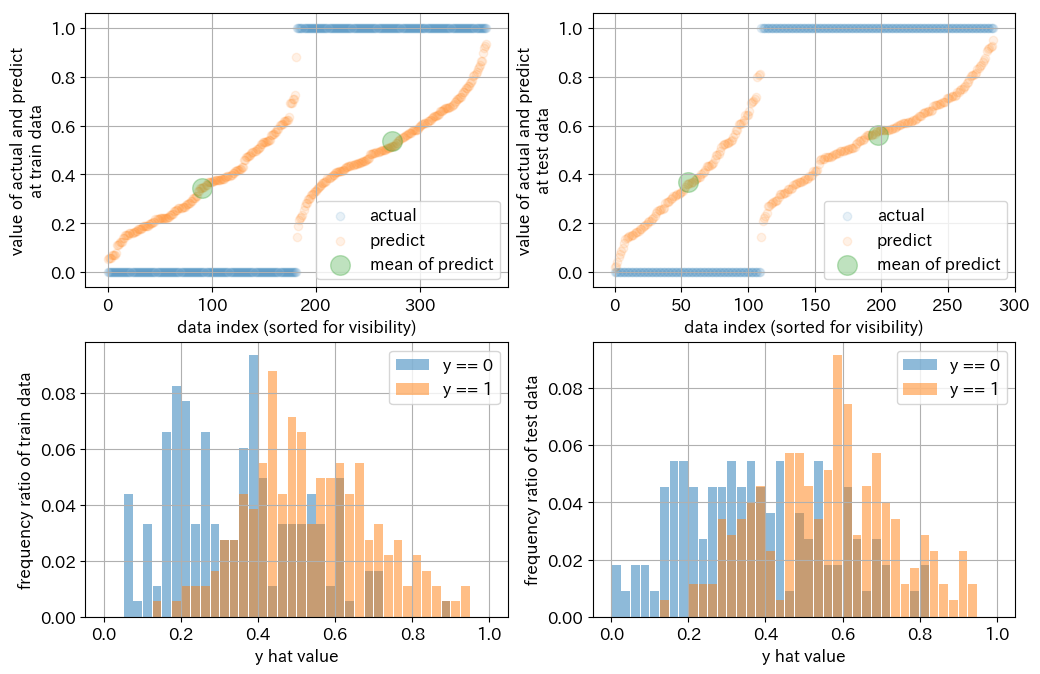

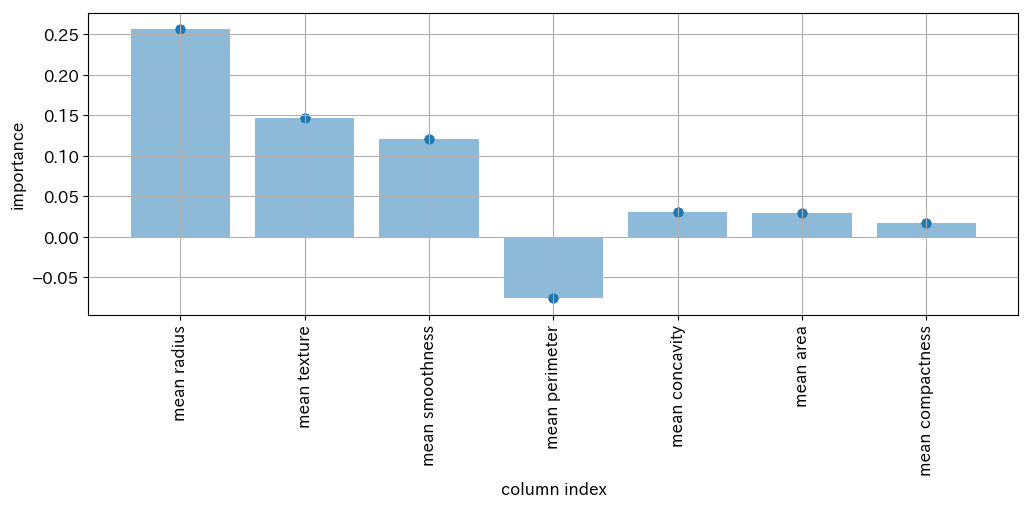

train on cv (model:[m:2,r:5] LogReg_param0_RFE5, feature dim:5) [start time is 2019-07-10 13:34:18.306533]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.92, test = 0.92 [end time is 2019-07-10 13:34:19.710593]




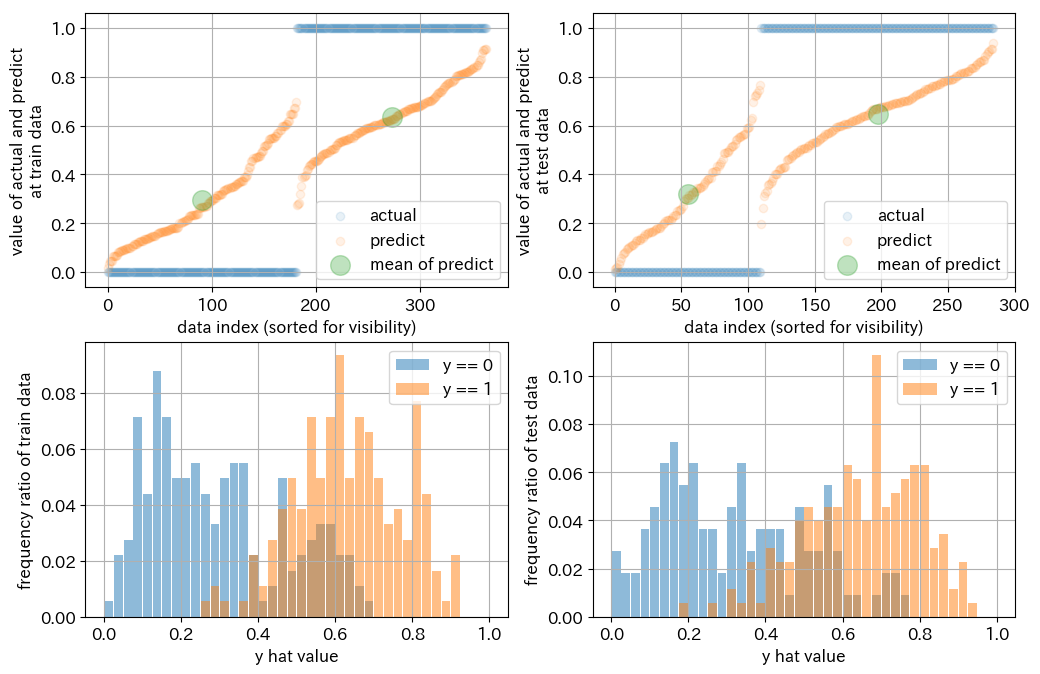

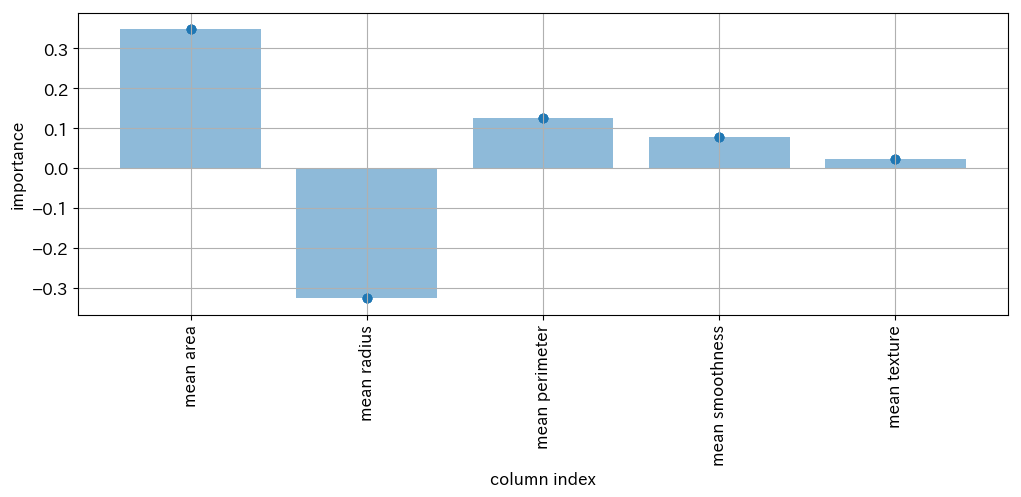

train on cv (model:[m:2,r:6] LogReg_param0_RFE3, feature dim:3) [start time is 2019-07-10 13:34:20.701604]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 0.67, test = 0.64 [end time is 2019-07-10 13:34:22.122118]




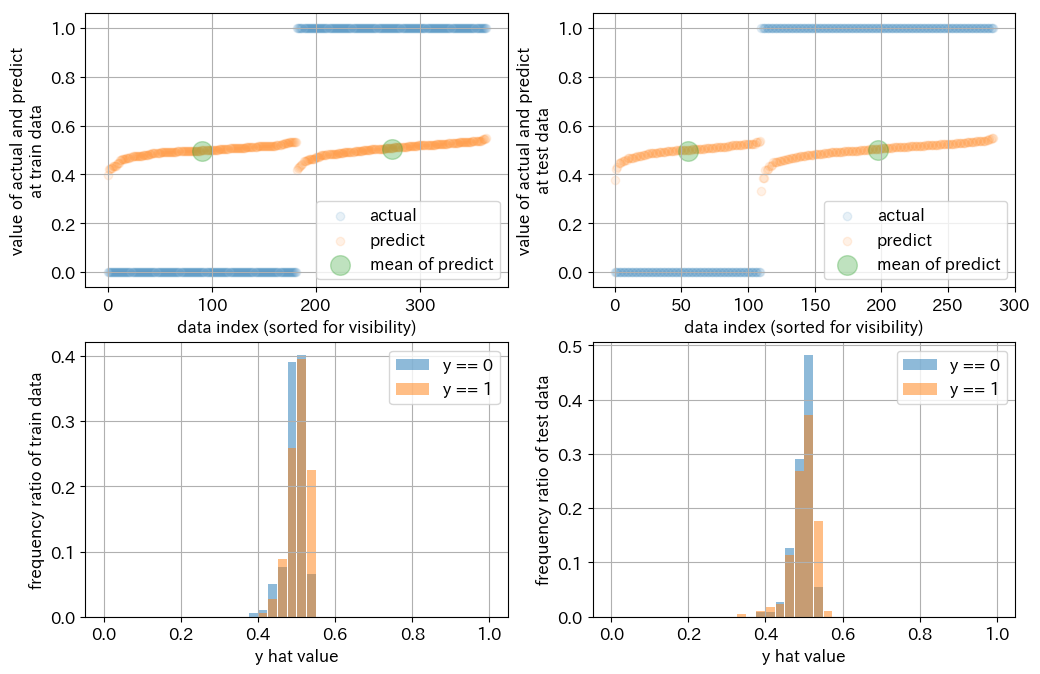

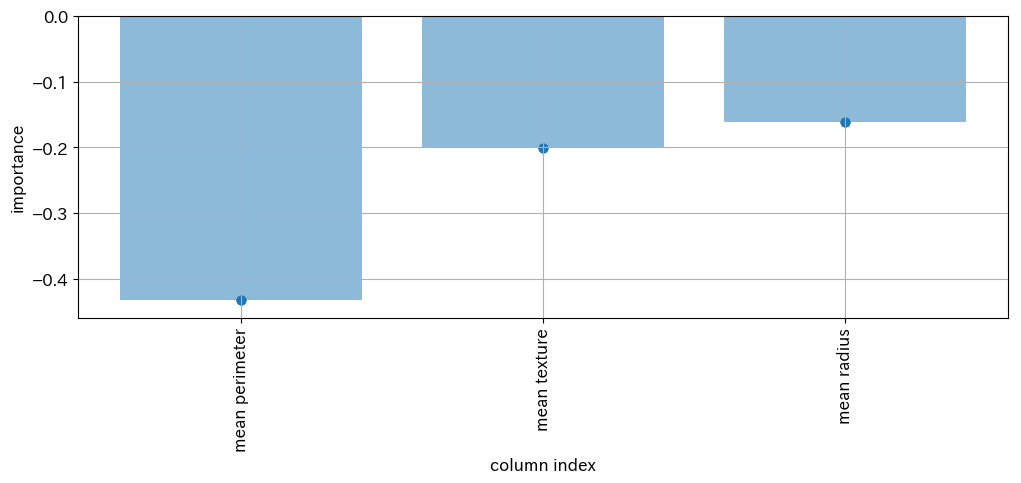



summary result


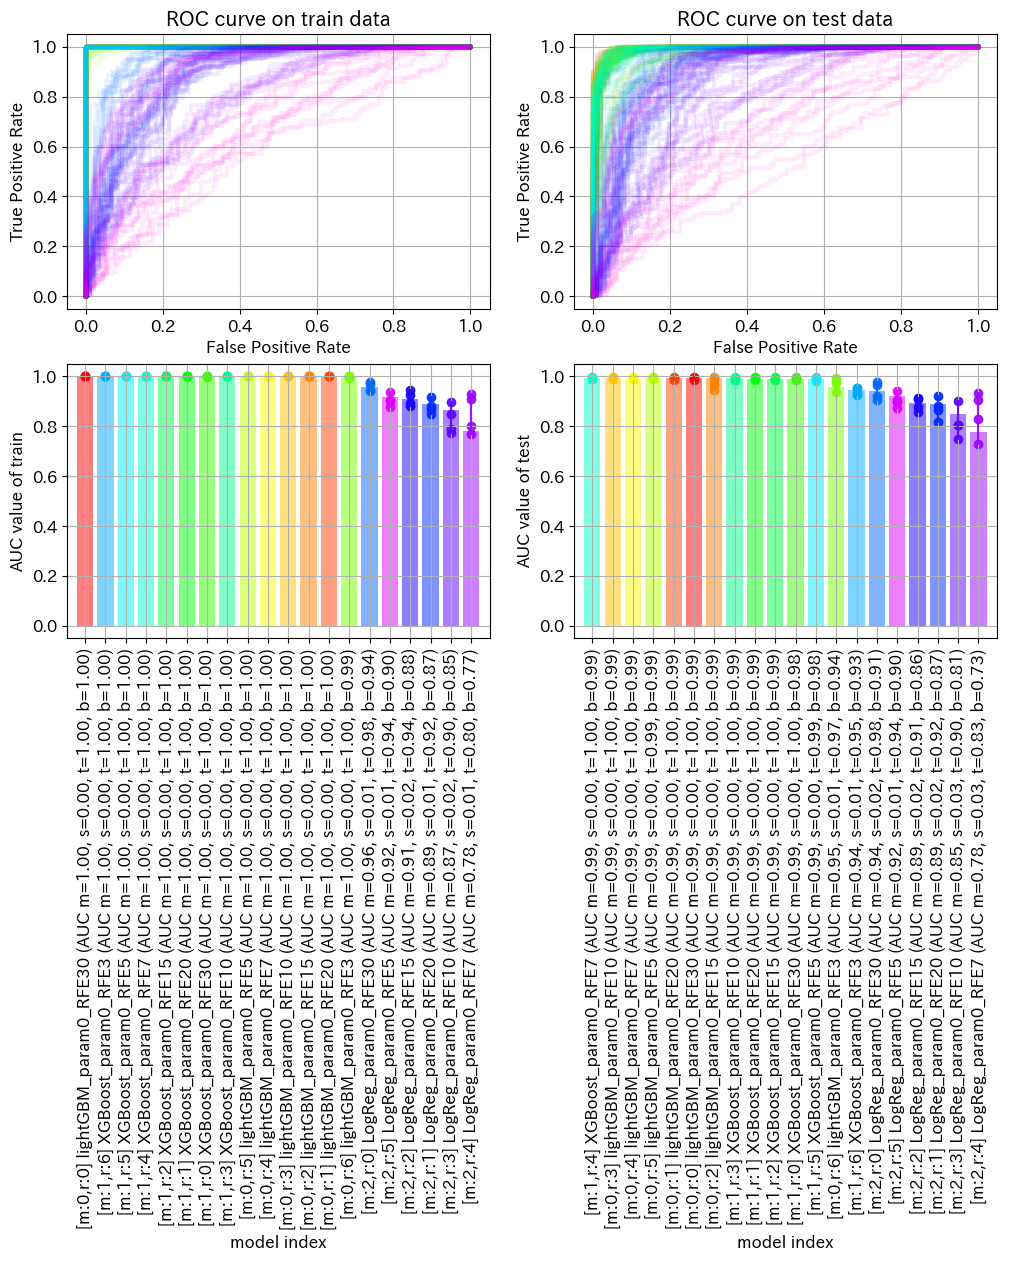

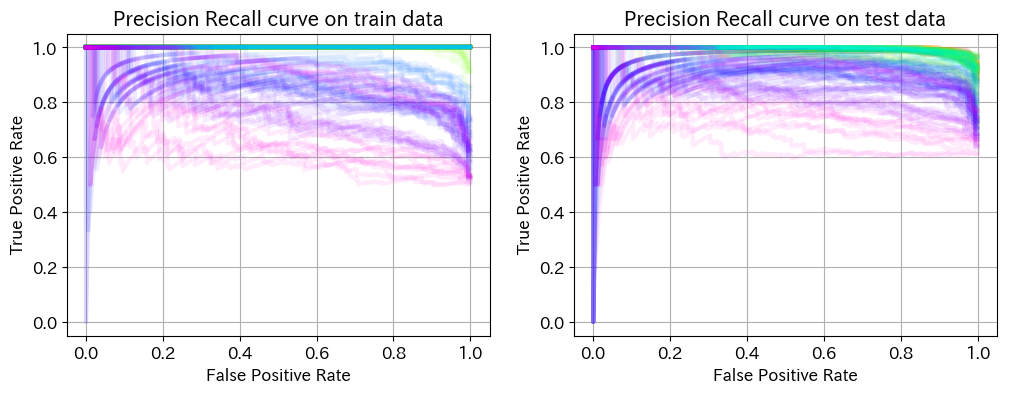

In [23]:
# [STEP 4]
# cross validation by multi model and rfe (with upsampling)
model      = []
model_name = []

# set common param
rfe_step   = [20, 15, 10, 7, 5, 3]

# 1. lightGBM
param = [[0.1, 100, 0.1, 30, 0.5, 0.5]]
for param_i in range(len(param)):
    model_tmp = LGBMClassifier(objective        = 'binary',  
                               learning_rate    = param[param_i][0], 
                               n_estimators     = param[param_i][1], 
                               min_child_weight = param[param_i][2],
                               num_leaves       = param[param_i][3],
                               colsample_bytree = param[param_i][4],
                               reg_lambda       = param[param_i][5],
                               subsample        = 1.0, 
                               random_state     = 0, 
                               n_jobs           = 4) 
    model.append(model_tmp)
    model_name.append('lightGBM_param%d' % (param_i))

# 2. XGBoost
param = [[0.1, 100, 0.1, 5, 0.5, 0.5]]
for param_i in range(len(param)):
    model_tmp = XGBClassifier(learning_rate    = param[param_i][0], 
                              n_estimators     = param[param_i][1], 
                              min_child_weight = param[param_i][2],
                              max_depth        = param[param_i][3],
                              colsample_bytree = param[param_i][4],
                              reg_lambda       = param[param_i][5],
                              subsample     = 1.0, 
                              random_state  = 0, 
                              n_jobs        = 4) 
    model.append(model_tmp)
    model_name.append('XGBoost_param%d' % (param_i))

# 3. LogisticRegression
param = [[0.1]]
for param_i in range(len(param)):
    model_tmp = LogisticRegression(C      = param[param_i][0], 
                                   solver = 'sag', 
                                   n_jobs = 4)
    model.append(model_tmp)
    model_name.append('LogReg_param%d' % (param_i))

# exec
(importance_stock, 
 rfe_step, 
 remain_idx, 
 model_name_stock, 
 idx_sort_auc_test) = ppap_tab_cls.rfe_and_cv(X              = X, 
                                              y              = y, 
                                              model          = model, 
                                              model_name     = model_name, 
                                              column_name    = column_name,
                                              sample_balance = True, 
                                              rfe_step       = rfe_step, 
                                              draw_cv_ratio  = 0.1)

plt.show()


model is ...
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.1, min_split_gain=0.0,
        n_estimators=100, n_jobs=4, num_leaves=30, objective='binary',
        random_state=0, reg_alpha=0.0, reg_lambda=0.5, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

use feature is ...
  - worst concave points : 135.80
  - worst texture : 134.40
  - worst smoothness : 131.80
  - worst area : 118.90
  - area error : 106.90

train on cv (model:lightGBM_param0, feature dim:5) [start time is 2019-07-10 13:34:27.007322]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
AUC mean on train = 1.00, test = 0.99 [end time is 2019-07-10 13:34:28.504610]




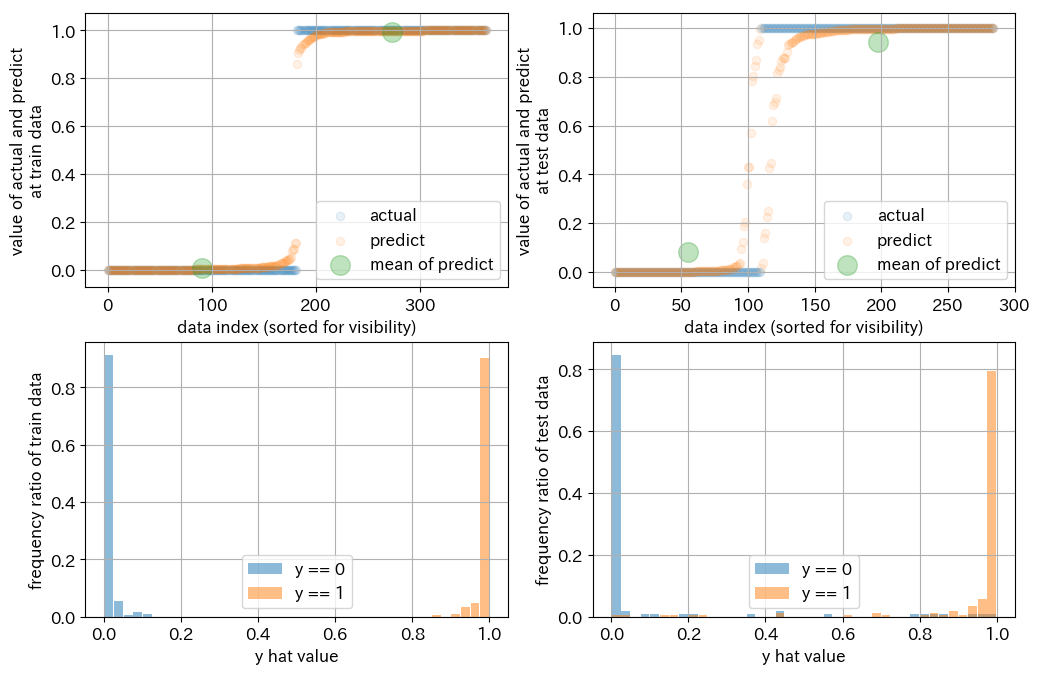

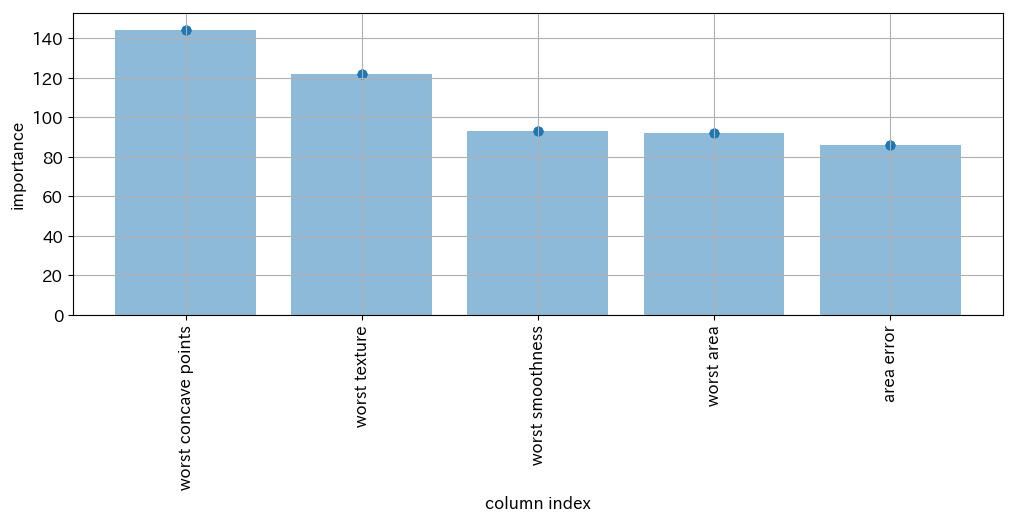



summary result


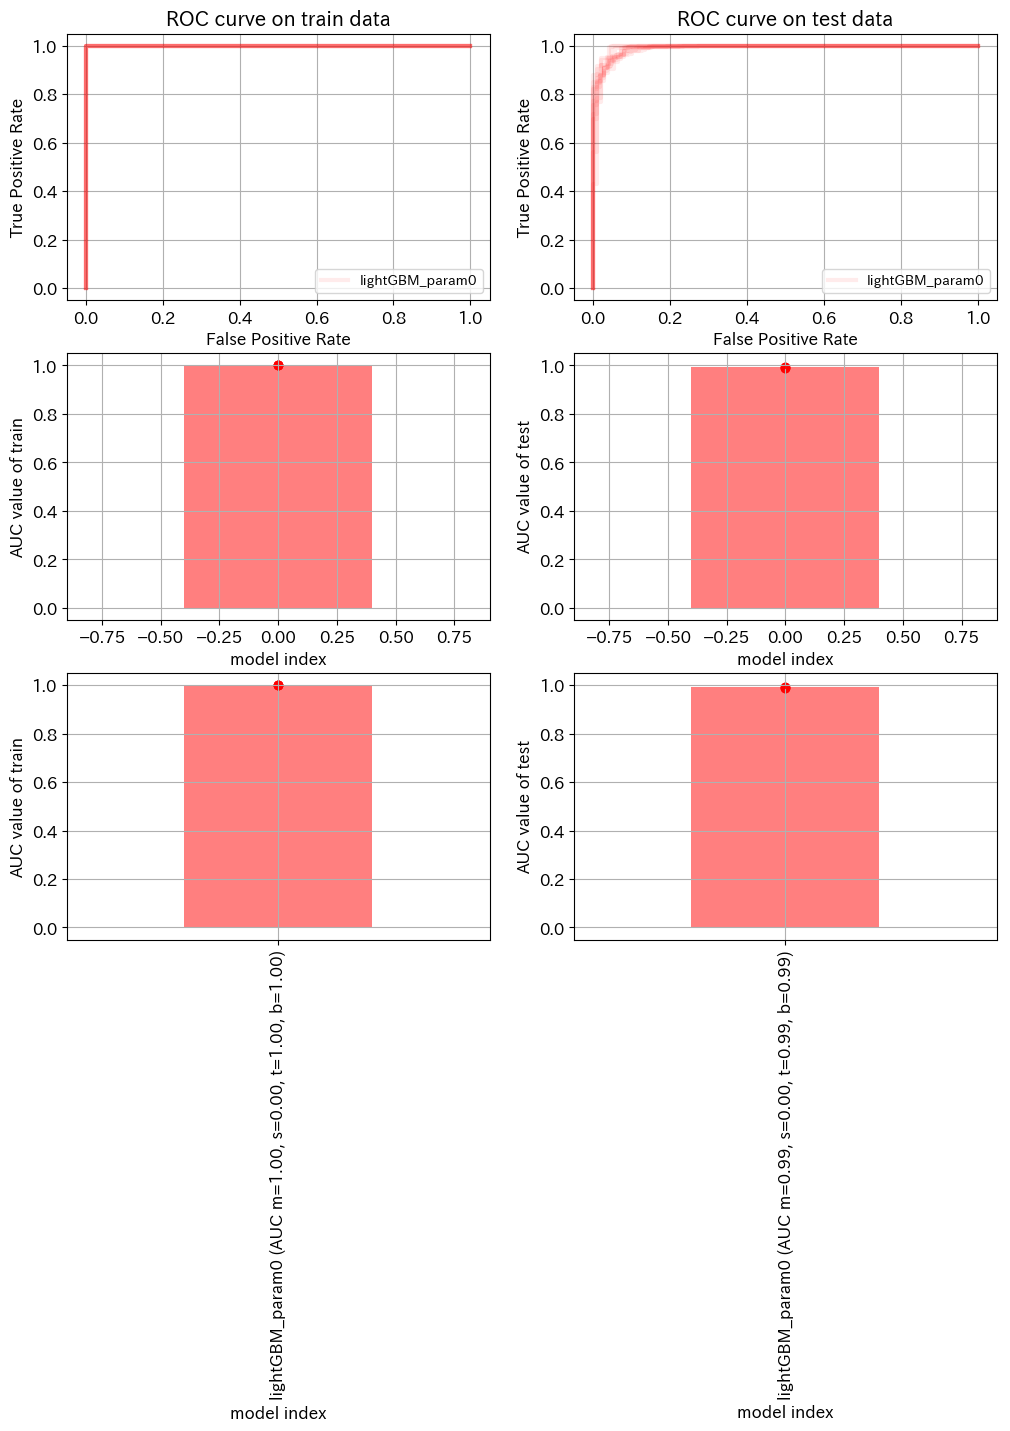

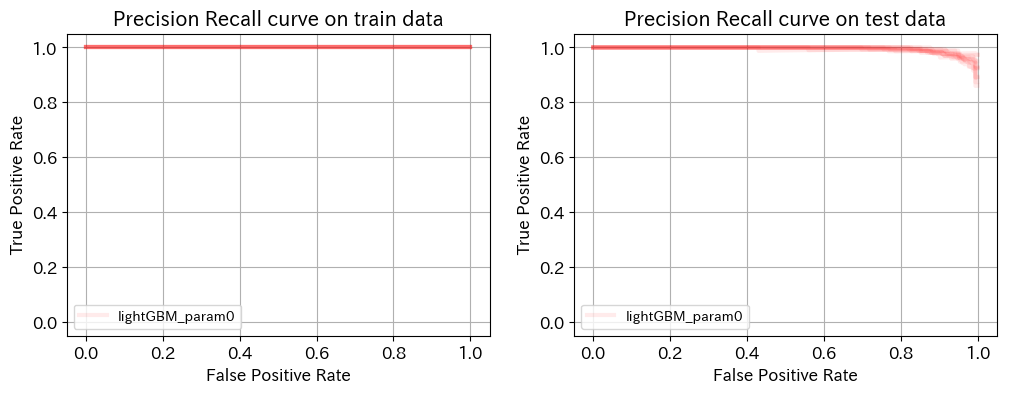

In [24]:
# [STEP ５]
# do the learning by good param setting 
rank_i       = 3 # choise method that column is small 

# 
model_i      = int(np.floor(idx_sort_auc_test[rank_i] / len(rfe_step)))
model_name_i = idx_sort_auc_test[rank_i]
rfe_step_i   = int(idx_sort_auc_test[rank_i] % len(rfe_step))

# 
model_       = model[model_i]
model_name_  = model_name_stock[idx_sort_auc_test[rank_i]]
model_name_  = model_name_[(model_name_.find('] ') + 2):]
model_name_  = model_name_[:model_name_.find('_RFE')]

# 
remain_idx_  = remain_idx[:, model_i, rfe_step_i]
X_slim       = X[:, remain_idx_]
column_name_ = column_name[remain_idx_]

# 
importance_  = np.mean(importance_stock[:, :, model_i, rfe_step_i], axis=1)

# 
print('model is ...')
print(model_)
print('')
print('use feature is ...')
for column_i in np.argsort(-importance_):
    if (remain_idx_[column_i]):
        print('  - %s : %.2f' % (column_name[column_i], importance_[column_i]))
print('')

# exec
(_, _, _, _, _) = ppap_tab_cls.cv_random(X              = X_slim, 
                                         y              = y, 
                                         model          = model_, 
                                         model_name     = model_name_, 
                                         column_name    = column_name_,
                                         sample_balance = True)


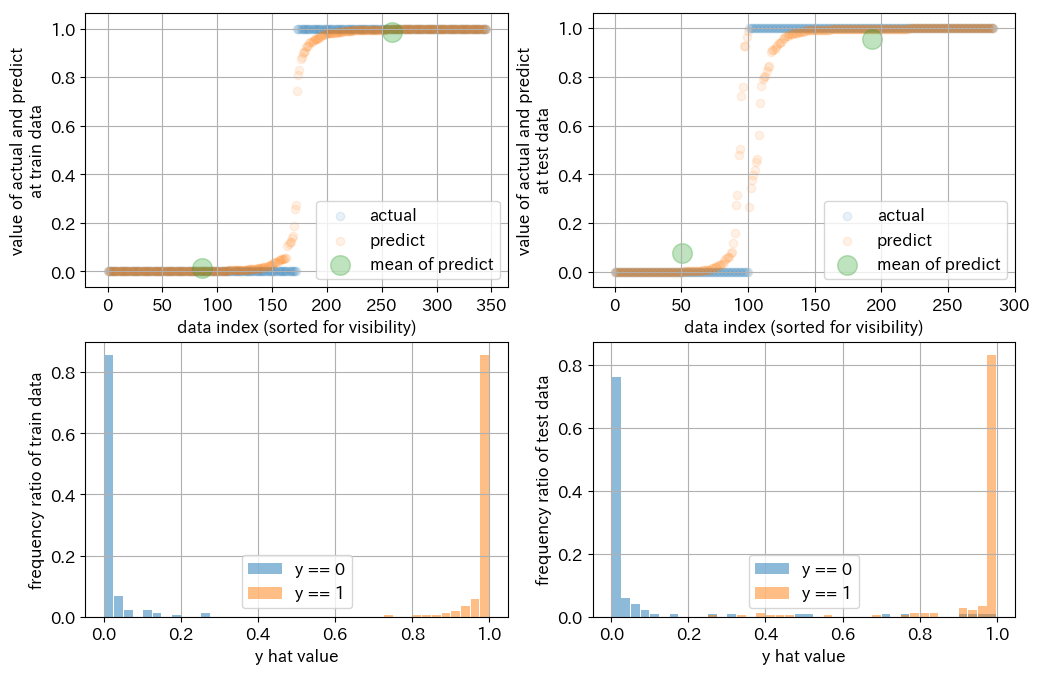

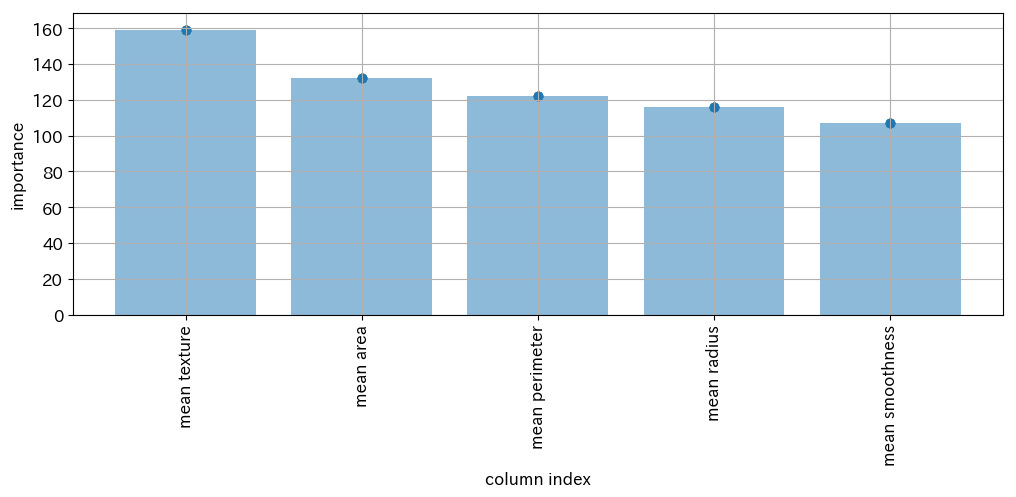

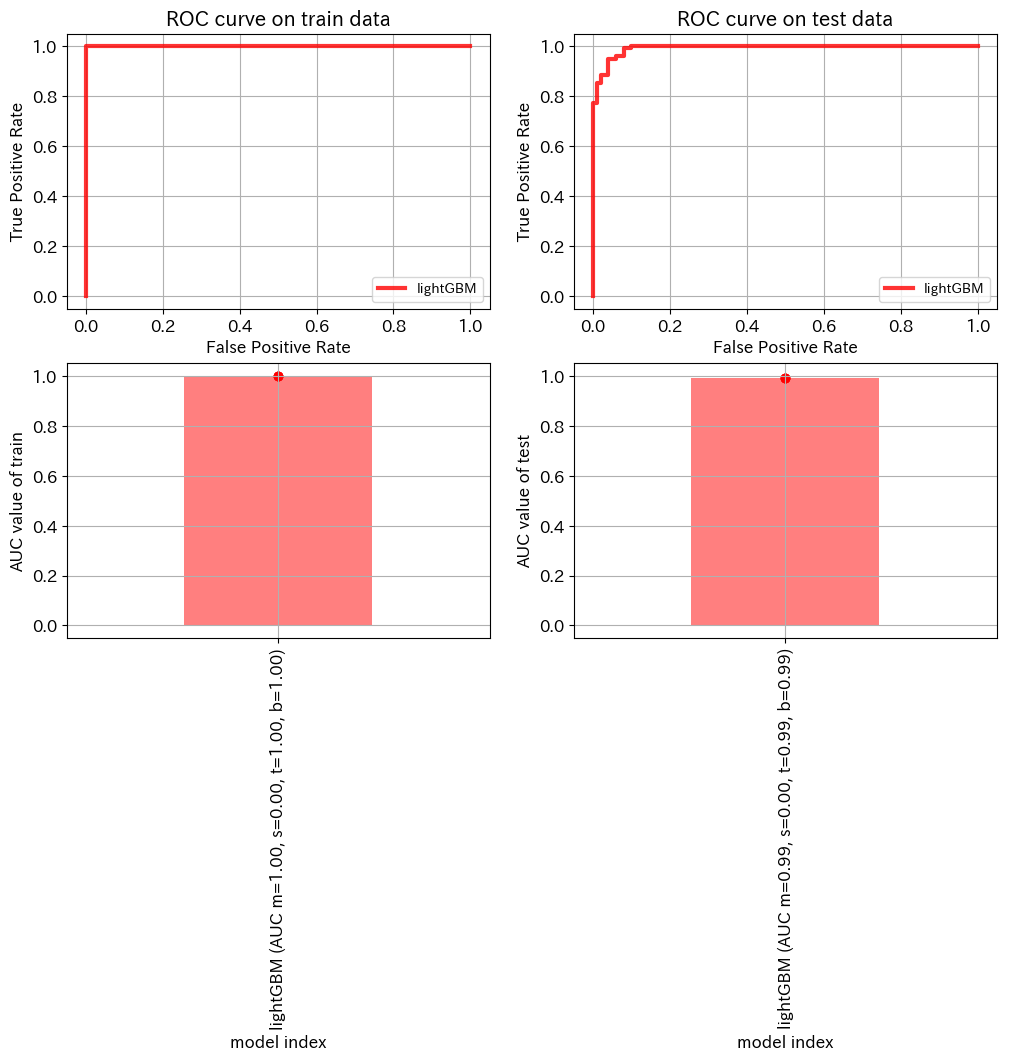

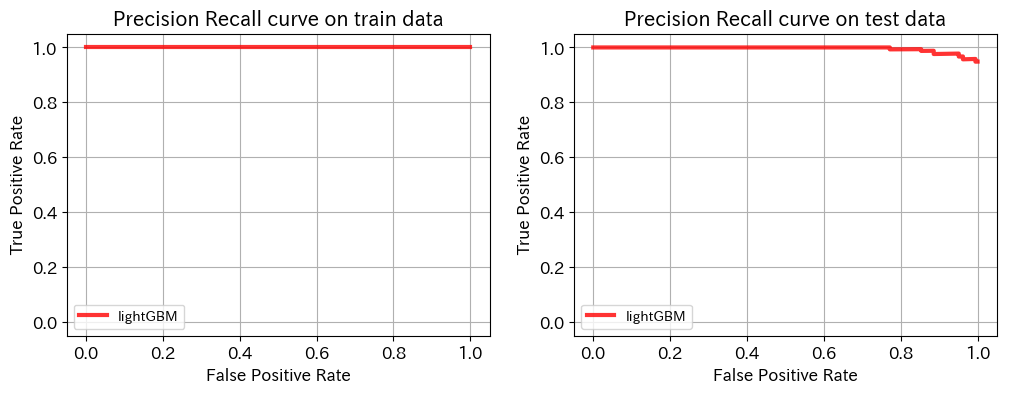

In [25]:
# [Step 6-1]
# 
X_slim           = X[:, remain_idx_]
column_name_slim = column_name[remain_idx_]

# separate train data and test data
(X_train_slim, X_test_slim, 
 y_train, y_test) = train_test_split(X_slim, y, test_size=0.5, random_state=0)

# exec
np.random.seed(0) # need to confirm...
(learned_model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_cls.train_predict_and_measure(X_train        = X_train_slim,
                                                      y_train        = y_train,
                                                      X_test         = X_test_slim,
                                                      y_test         = y_test, 
                                                      model          = model_, 
                                                      column_name    = column_name, 
                                                      sample_balance = True)


In [26]:
# [Step 6-2]
# search large mistake

# knn search
(nearest_info) = ppap_tab_utl.knn_mistake_search(X           = X_test_slim, 
                                                 y           = y_test, 
                                                 y_hat       = y_test_hat, 
                                                 column_name = column_name_slim, 
                                                 k           = 20)

# view
df_nearest_info = nearest_info[0]
df_nearest_info


base          neighbor1          neighbor2  \
data index                          252                281                115   
distance                              0           0.423459           0.479637   
correct label                         0                  1                  1   
prediction            0:0.998, 1:0.002,  0:0.004, 1:0.996,  0:0.001, 1:0.999,   
mistake                        0.988845           0.006397         0.00465848   
area error                        19.87              14.46               20.2   
worst texture                     33.37              34.91              32.04   
worst area                        653.6              357.6              489.5   
worst smoothness                 0.1419             0.1384             0.1303   
worst concave points            0.09331            0.09127            0.07485   

                              neighbor3          neighbor4          neighbor5  \
data index                            1                 47                157   
distance                       0.597428           0.654395           0.671229   
correct label                         1                  1                  0   
prediction            0:0.015, 1:0.985,  0:0.003, 1:0.997,  0:0.001, 1:0.999,   
mistake                      0.00380283         0.00624925          0.0611517   
area error                        17.58              22.07              19.83   
worst texture                     34.23              30.28              35.64   
worst area                        632.9              715.5              848.7   
worst smoothness                 0.1289             0.1287             0.1471   
worst concave points            0.06005            0.07963             0.1329   

                              neighbor6          neighbor7          neighbor8  \
data index                          133                103                251   
distance                       0.673955           0.737178           0.770928   
correct label                         1                  1                  1   
prediction            0:0.011, 1:0.989,  0:0.001, 1:0.999,  0:0.003, 1:0.997,   
mistake                       0.0225419         0.00471165          0.0399276   
area error                        15.09              29.84              27.24   
worst texture                     29.16              33.17              28.36   
worst area                        639.3              706.7              638.4   
worst smoothness                 0.1349             0.1241             0.1429   
worst concave points             0.1126             0.1048              0.108   

                              neighbor9  ...         neighbor11  \
data index                          118  ...                244   
distance                       0.770989  ...           0.971361   
correct label                         1  ...                  1   
prediction            0:0.000, 1:1.000,  ...  0:0.099, 1:0.901,   
mistake                      0.00302992  ...          0.0066578   
area error                        18.04  ...              23.22   
worst texture                     31.99  ...              29.46   
worst area                        622.9  ...              402.8   
worst smoothness                 0.1256  ...             0.1515   
worst concave points            0.06335  ...            0.06736   

                             neighbor12         neighbor13         neighbor14  \
data index                          181                 69                263   
distance                       0.980205           0.982023            1.06408   
correct label                         1                  1                  1   
prediction            0:0.004, 1:0.996,  0:0.538, 1:0.462,  0:0.157, 1:0.843,   
mistake                       0.0168167         0.00556282         0.00228405   
area error                        15.34               14.2              16.83   
worst texture                     28.81              3

In [27]:
# 
pd.DataFrame(X_slim, columns=column_name_slim).describe()


area error  worst texture   worst area  worst smoothness  \
count  569.000000     569.000000   569.000000        569.000000   
mean    40.337079      25.677223   880.583128          0.132369   
std     45.491006       6.146258   569.356993          0.022832   
min      6.802000      12.020000   185.200000          0.071170   
25%     17.850000      21.080000   515.300000          0.116600   
50%     24.530000      25.410000   686.500000          0.131300   
75%     45.190000      29.720000  1084.000000          0.146000   
max    542.200000      49.540000  4254.000000          0.222600   

       worst concave points  
count            569.000000  
mean               0.114606  
std                0.065732  
min                0.000000  
25%                0.064930  
50%                0.099930  
75%                0.161400  
max                0.291000

In [28]:
# [Step 6-3]
# try to make reduce mistake
idx_tmp   = int(df_nearest_info.loc['data index', 'base'])
y_tmp     = y_test[idx_tmp]
X_tmp     = X_test_slim[[idx_tmp], :]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat before = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))

# 
example       = 'neighbor5'
column_change = ['worst area', 'worst concave points']

for column_i in range(len(column_change)):
    X_tmp[:, column_name_slim == column_change[column_i]] = df_nearest_info.loc[column_change[column_i], example]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat after  = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))


y_hat before = 0.988845 (correct = 0)
y_hat after  = 0.072927 (correct = 0)


In [29]:
# [Step 6-4]
# use LIME



1-k conding or discretization [start time is 2019-07-10 13:34:33.015474]
--------------------------------------------------
START                                          END
----+----1----+----2----+----3----+----4----+----5
**************************************************
                              [end time is 2019-07-10 13:34:33.793384]



after quantize size = (569, 50)


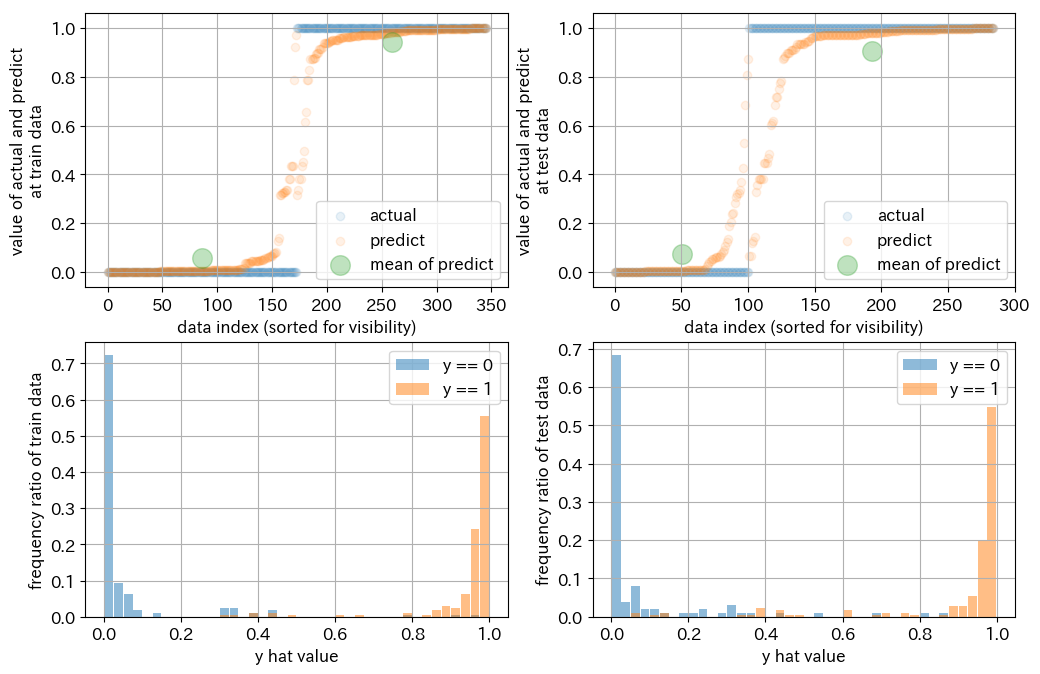

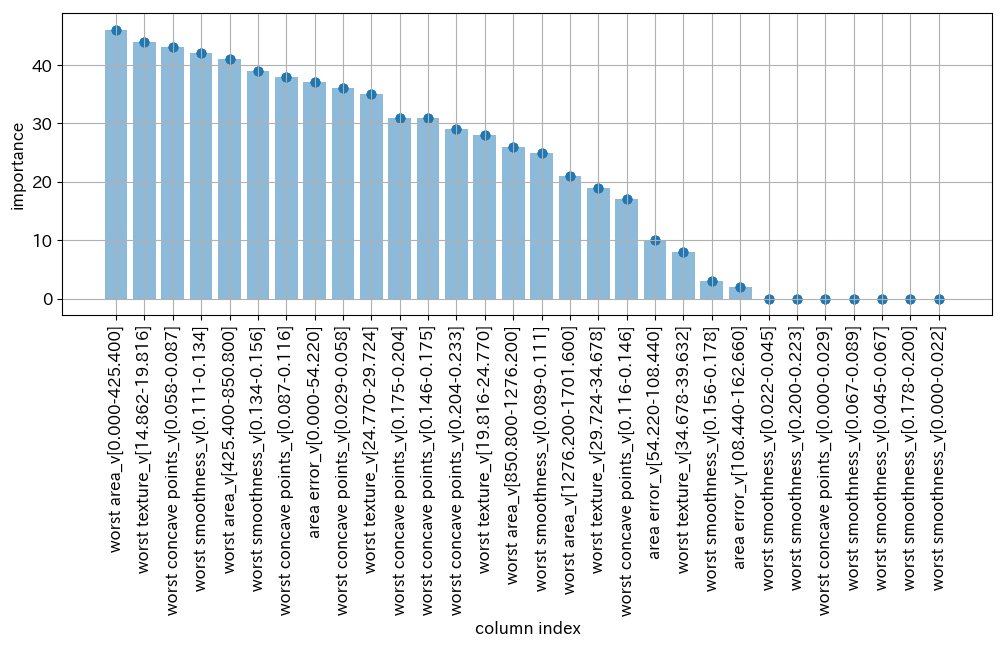

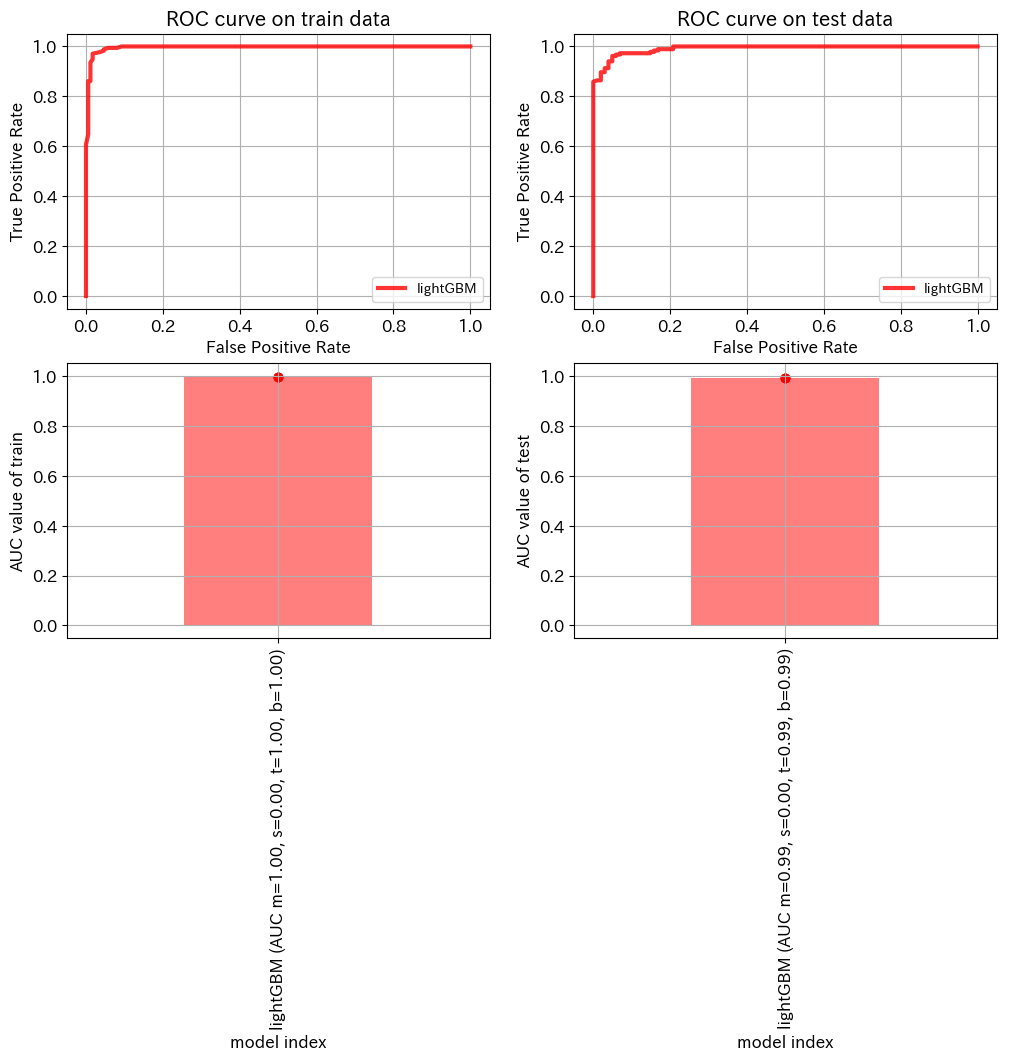

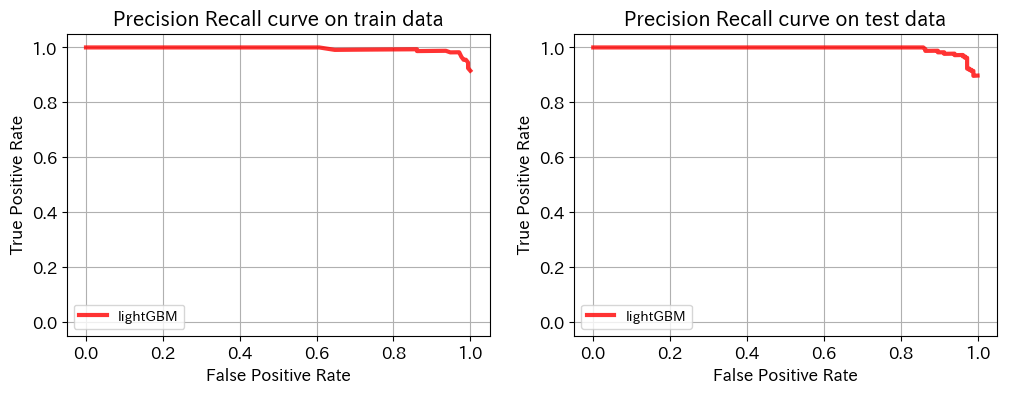

In [30]:
# [Step 7-1]
# try discretization for check wrong data
column_1k   = []               # set code column
column_disc = column_name_slim # set real number column
column_bow  = []               # set text column

# discretization data value
(X_disc, 
 column_name_disc)= ppap_tab_utl.one_k_code_and_disc(X             = X_slim, 
                                                     column_1k     = column_1k, 
                                                     column_disc   = column_disc,
                                                     column_bow    = column_bow, 
                                                     column_name   = column_name_slim, 
                                                     disc_bins_num = 10)

# separate train data and test data
(X_train_disc, X_test_disc, 
 y_train, y_test) = train_test_split(X_disc, y, test_size=0.5, random_state=0)

# exec
(learned_model, 
 y_train_hat, 
 y_test_hat, 
 X_train_up, 
 y_train_up) = ppap_tab_cls.train_predict_and_measure(X_train        = X_train_disc,
                                                      y_train        = y_train,
                                                      X_test         = X_test_disc,
                                                      y_test         = y_test, 
                                                      model          = model_, 
                                                      column_name    = column_name_disc, 
                                                      sample_balance = True)


In [31]:
# [Step 7-2]
# search large mistake

# knn search
(nearest_info) = ppap_tab_utl.knn_mistake_search(X           = X_test_disc, 
                                                 y           = y_test, 
                                                 y_hat       = y_test_hat, 
                                                 column_name = column_name_disc, 
                                                 k           = 20, 
                                                 X_normalize = False)

# view
df_nearest_info = nearest_info[0]
df_nearest_info


base          neighbor1  \
data index                                         162                284   
distance                                             0                  2   
correct label                                        1                  1   
prediction                           0:0.945, 1:0.055,  0:0.027, 1:0.973,   
mistake                                       0.935853          0.0281216   
area error_v[0.000-54.220]                           1                  1   
area error_v[54.220-108.440]                         0                  0   
area error_v[108.440-162.660]                        0                  0   
area error_v[162.660-216.880]                        0                  0   
area error_v[216.880-271.100]                        0                  0   
area error_v[271.100-325.320]                        0                  0   
area error_v[325.320-379.540]                        0                  0   
area error_v[379.540-433.760]                        0                  0   
area error_v[433.760-487.980]                        0                  0   
area error_v[487.980-542.200]                        0                  0   
worst texture_v[0.000-4.954]                         0                  0   
worst texture_v[4.954-9.908]                         0                  0   
worst texture_v[9.908-14.862]                        0                  0   
worst texture_v[14.862-19.816]                       0                  0   
worst texture_v[19.816-24.770]                       0                  0   
worst texture_v[24.770-29.724]                       1                  1   
worst texture_v[29.724-34.678]                       0                  0   
worst texture_v[34.678-39.632]                       0                  0   
worst texture_v[39.632-44.586]                       0                  0   
worst texture_v[44.586-49.540]                       0                  0   
worst area_v[0.000-425.400]                          0                  0   
worst area_v[425.400-850.800]                        1                  1   
worst area_v[850.800-1276.200]                       0                  0   
worst area_v[1276.200-1701.600]                      0                  0   
worst area_v[1701.600-2127.000]                      0                  0   
worst area_v[2127.000-2552.400]                      0                  0   
worst area_v[2552.400-2977.800]                      0                  0   
worst area_v[2977.800-3403.200]                      0                  0   
worst area_v[3403.200-3828.600]                      0                  0   
worst area_v[3828.600-4254.000]                      0                  0   
worst smoothness_v[0.000-0.022]                      0                  0   
worst smoothness_v[0.022-0.045]                      0                  0   
worst smoothness_v[0.045-0.067]                      0                  0   
worst smoothness_v[0.067-0.089]                      0                  0   
worst smoothness_v[0.089-0.111]                      0                  0   
worst smoothness_v[0.111-0.134]                      0                  0   
worst smoothness_v[0.134-0.156]                      1                  1   
worst smoothness_v[0.156-0.178]                      0                  0   
worst smoothness_v[0.178-0.200]                      0                  0   
worst smoothness_v[0.200-0.223]                      0                  0   
worst concave points_v[0.000-0.029]                  0                  0   
worst concave points_v[0.029-0.058]                  0                  0   
worst concave points_v[0.058-0.087]                  0                  1   
worst concave points_v[0.087-0.116]                  0                  0   
worst concave points_v[0.116-0.146]                  0                  0   
worst concave points_v[0.146-0.175]                  1                  0   
worst concave points_v[0.175-0.204]           

In [32]:
# [Step 7-3]
# try to make reduce mistake
idx_tmp   = int(df_nearest_info.loc['data index', 'base'])
y_tmp     = y_test[idx_tmp]
X_tmp     = X_test_disc[[idx_tmp], :]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat before = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))

# 
example       = 'neighbor1'
column_change = ['worst concave points_v[0.058-0.087]', 'worst concave points_v[0.146-0.175]']

for column_i in range(len(column_change)):
    X_tmp[:, column_name_disc == column_change[column_i]] = df_nearest_info.loc[column_change[column_i], example]
y_hat_tmp = learned_model.predict_proba(X_tmp).T[1]
print('y_hat after  = %.6f (correct = %d)' % (y_hat_tmp, y_tmp))


y_hat before = 0.064147 (correct = 1)
y_hat after  = 0.971878 (correct = 1)


In [33]:
# [Step 7-4]
# use LIME
